Code to analyse the boundary search done in the HMS O2 computing cluster.

In [1]:
import sys,os
path_to_eigen="/Users/rosamartinezcorral/Documents/eigenlibrary/eigen-eigen-323c052e1731/" #for backward compatibility, no longer required
path_to_polynomials="\"/Users/rosamartinezcorral/Dropbox (HMS)/work2/shared_fromothers/polynomials_multiprecision/polynomials/include/polynomial/\""
path_to_utilsGRF="\"/Users/rosamartinezcorral/Dropbox (HMS)/work2/shared/utilsGRF\"" #GeneRegulatoryFunctions repo
path_to_utilsGRF_="/Users/rosamartinezcorral/Dropbox (HMS)/work2/shared/utilsGRF" #GeneRegulatoryFunctions repo
sys.path.append(path_to_utilsGRF_)

import AnalyseBoundarysearch
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import BoundaryFinder as BF
import alphashape
import time

In [4]:
datafolder='/Users/rosamartinezcorral/Dropbox (HMS)/data/2021_12_boundaries'
subfolder="2022_02_04_N4Pol_anybasalP1000"
subfolder_unf="2022_02_04_N4Pol_anybasalP1000_scratch"
folder1=os.path.join(datafolder,subfolder)
unfinishedfolder=os.path.join(datafolder,subfolder_unf)
ashapesfolder="./ashapes"
jid="48184236"
njobs=64
basename="N4Pb1" #I forgot to change the name when launching, but I have doublechecked that it was run with P=1000

name_ashape="ashape_%s"%basename
extremespars=[[1e-1,1e1],[1e-2,1e2],[1e-3,1e3],[1e-4,1e4]] #copy-paste from the boundary search
absder="True" 


In [6]:
#check convergence
for i in range(1,njobs+1):
    fout=os.path.join(folder1,"%s_%d.out"%(jid,i))
    #print("##########",fout)
    lines=open(fout,"r").readlines()
    if len(lines)>1:
        line=lines[1]
        splitted=line.strip().split(",")
        #print(line)
        new=[]
        for k in range(1,len(splitted)-1,2):
            iter_=splitted[k]
            #print(iter_, iter_.split(" "))
            niter,nnew=[float(x.strip(".")) for x in iter_.split(" ")]
            new.append(nnew)
        #plt.figure(figsize=(4,3))
        #plt.scatter(range(len(new)),new)
        #plt.show()
        if len(new)<1500:
            print(i,"!!!not long enough", len(new), np.sum(new[-100:]),np.sum(new[-500:]))
        else:
            if np.sum(new[-1500:])==0:
                print(i,"ok")
            else:
                print(i,np.sum(new[-1500:]))
    else:
        print(i,"!!!not enough lines")

1 !!!not enough lines
2 !!!not enough lines
3 ok
4 ok
5 !!!not enough lines
6 !!!not enough lines
7 ok
8 ok
9 !!!not enough lines
10 !!!not enough lines
11 ok
12 ok
13 !!!not enough lines
14 !!!not enough lines
15 ok
16 ok
17 !!!not enough lines
18 !!!not enough lines
19 ok
20 ok
21 !!!not enough lines
22 !!!not enough lines
23 ok
24 ok
25 !!!not enough lines
26 !!!not enough lines
27 ok
28 ok
29 !!!not enough lines
30 !!!not enough lines
31 ok
32 ok
33 !!!not enough lines
34 !!!not enough lines
35 ok
36 ok
37 !!!not enough lines
38 !!!not enough lines
39 ok
40 ok
41 !!!not enough lines
42 !!!not enough lines
43 ok
44 ok
45 !!!not enough lines
46 !!!not enough lines
47 ok
48 ok
49 !!!not enough lines
50 !!!not enough lines
51 ok
52 ok
53 !!!not enough lines
54 !!!not enough lines
55 ok
56 ok
57 !!!not enough lines
58 !!!not enough lines
59 ok
60 ok
61 !!!not enough lines
62 !!!not enough lines
63 ok
64 ok


For parameter range 3 and 4 it is ok. This matches with my previous results that otherwise the ranges are too small. Look only at these:

folder to check /Users/rosamartinezcorral/Dropbox (HMS)/data/2021_12_boundaries/2022_02_04_N4Pol_anybasalP1000/tocheck_N4Pb1
folders are
['/Users/rosamartinezcorral/Dropbox (HMS)/data/2021_12_boundaries/2022_02_04_N4Pol_anybasalP1000/final_results/mat_N4Pb1_11', '/Users/rosamartinezcorral/Dropbox (HMS)/data/2021_12_boundaries/2022_02_04_N4Pol_anybasalP1000/final_results/mat_N4Pb1_10', '/Users/rosamartinezcorral/Dropbox (HMS)/data/2021_12_boundaries/2022_02_04_N4Pol_anybasalP1000/final_results/mat_N4Pb1_58', '/Users/rosamartinezcorral/Dropbox (HMS)/data/2021_12_boundaries/2022_02_04_N4Pol_anybasalP1000/final_results/mat_N4Pb1_59', '/Users/rosamartinezcorral/Dropbox (HMS)/data/2021_12_boundaries/2022_02_04_N4Pol_anybasalP1000/final_results/mat_N4Pb1_38', '/Users/rosamartinezcorral/Dropbox (HMS)/data/2021_12_boundaries/2022_02_04_N4Pol_anybasalP1000/final_results/mat_N4Pb1_39', '/Users/rosamartinezcorral/Dropbox (HMS)/data/2021_12_boundaries/2022_02_04_N4Pol_anybasalP1000/final_results/ma

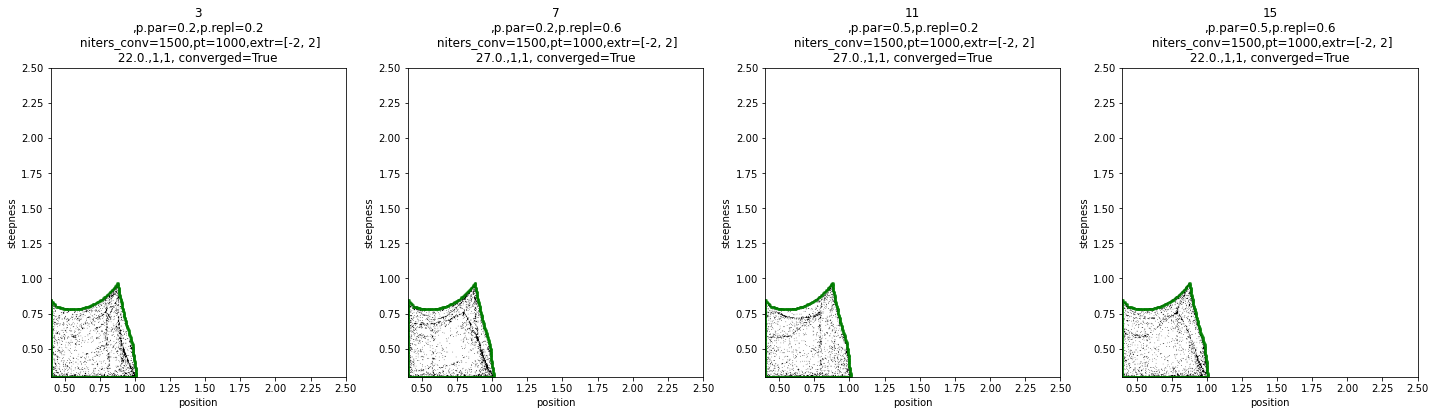

writing file to check in mat_N4Pb1_19.in
jid is 23
/Users/rosamartinezcorral/Dropbox (HMS)/data/2021_12_boundaries/2022_02_04_N4Pol_anybasalP1000/final_results/mat_N4Pb1_23_last.npy
writing file to check in mat_N4Pb1_23.in
jid is 27
/Users/rosamartinezcorral/Dropbox (HMS)/data/2021_12_boundaries/2022_02_04_N4Pol_anybasalP1000/final_results/mat_N4Pb1_27_last.npy
writing file to check in mat_N4Pb1_27.in
jid is 31
/Users/rosamartinezcorral/Dropbox (HMS)/data/2021_12_boundaries/2022_02_04_N4Pol_anybasalP1000/final_results/mat_N4Pb1_31_last.npy
writing file to check in mat_N4Pb1_31.in
jid is 35
/Users/rosamartinezcorral/Dropbox (HMS)/data/2021_12_boundaries/2022_02_04_N4Pol_anybasalP1000/final_results/mat_N4Pb1_35_last.npy


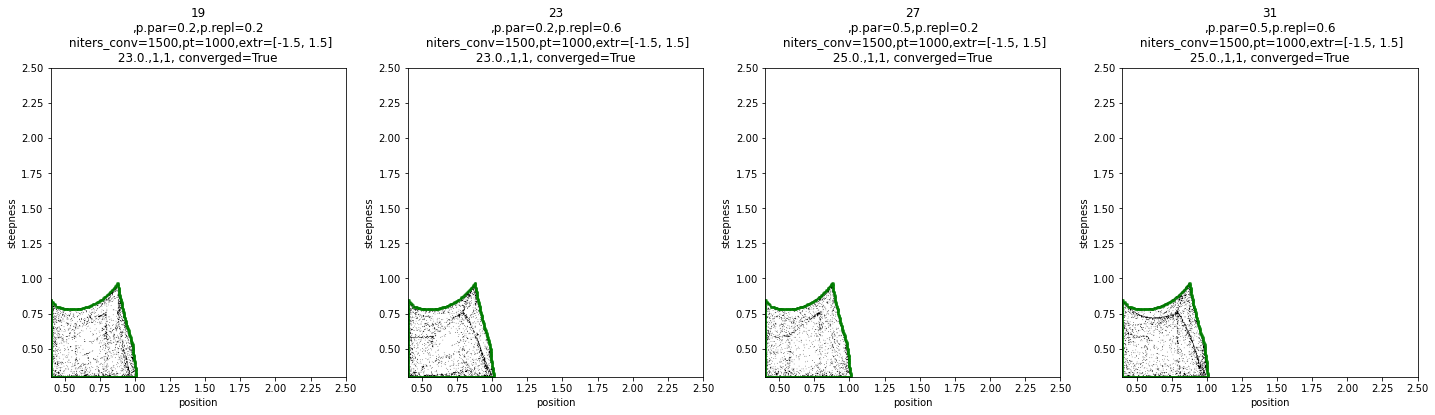

writing file to check in mat_N4Pb1_35.in
jid is 39
/Users/rosamartinezcorral/Dropbox (HMS)/data/2021_12_boundaries/2022_02_04_N4Pol_anybasalP1000/final_results/mat_N4Pb1_39_last.npy
writing file to check in mat_N4Pb1_39.in
jid is 43
/Users/rosamartinezcorral/Dropbox (HMS)/data/2021_12_boundaries/2022_02_04_N4Pol_anybasalP1000/final_results/mat_N4Pb1_43_last.npy
writing file to check in mat_N4Pb1_43.in
jid is 47
/Users/rosamartinezcorral/Dropbox (HMS)/data/2021_12_boundaries/2022_02_04_N4Pol_anybasalP1000/final_results/mat_N4Pb1_47_last.npy
writing file to check in mat_N4Pb1_47.in
jid is 51
/Users/rosamartinezcorral/Dropbox (HMS)/data/2021_12_boundaries/2022_02_04_N4Pol_anybasalP1000/final_results/mat_N4Pb1_51_last.npy


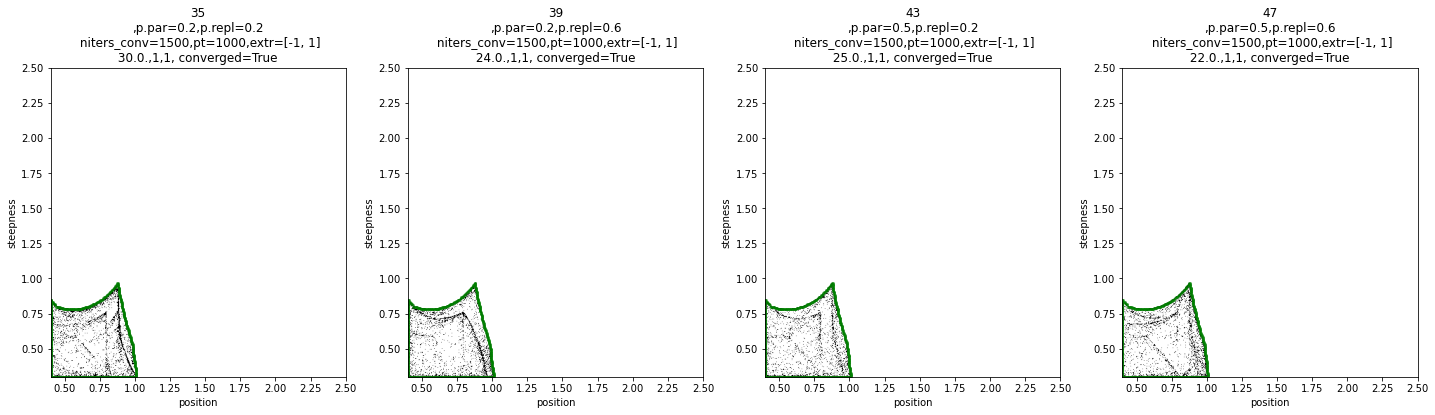

writing file to check in mat_N4Pb1_51.in
jid is 55
/Users/rosamartinezcorral/Dropbox (HMS)/data/2021_12_boundaries/2022_02_04_N4Pol_anybasalP1000/final_results/mat_N4Pb1_55_last.npy
writing file to check in mat_N4Pb1_55.in
jid is 59
/Users/rosamartinezcorral/Dropbox (HMS)/data/2021_12_boundaries/2022_02_04_N4Pol_anybasalP1000/final_results/mat_N4Pb1_59_last.npy
writing file to check in mat_N4Pb1_59.in
jid is 63
/Users/rosamartinezcorral/Dropbox (HMS)/data/2021_12_boundaries/2022_02_04_N4Pol_anybasalP1000/final_results/mat_N4Pb1_63_last.npy
writing file to check in mat_N4Pb1_63.in


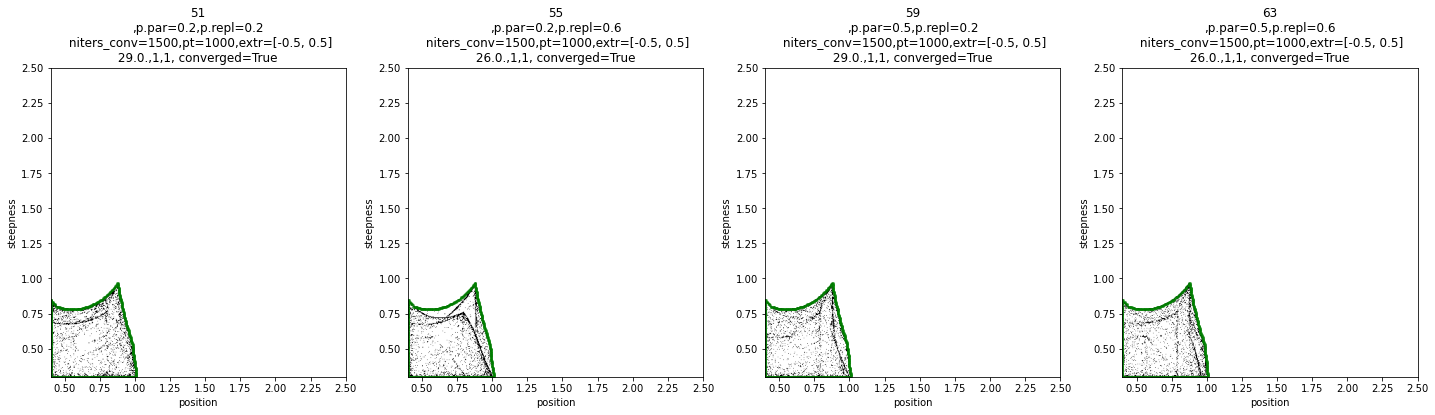

folder to check with mathematica is /Users/rosamartinezcorral/Dropbox (HMS)/data/2021_12_boundaries/2022_02_04_N4Pol_anybasalP1000/tocheck_N4Pb1
(441, 421)
Processing [2, 6, 10, 14, 18, 22, 26, 30, 34, 38, 42, 46, 50, 54, 58, 62]
jid is 2
/Users/rosamartinezcorral/Dropbox (HMS)/data/2021_12_boundaries/2022_02_04_N4Pol_anybasalP1000/final_results/mat_N4Pb1_2_last.npy
writing file to check in mat_N4Pb1_2.in
jid is 6
/Users/rosamartinezcorral/Dropbox (HMS)/data/2021_12_boundaries/2022_02_04_N4Pol_anybasalP1000/final_results/mat_N4Pb1_6_last.npy
writing file to check in mat_N4Pb1_6.in
jid is 10
/Users/rosamartinezcorral/Dropbox (HMS)/data/2021_12_boundaries/2022_02_04_N4Pol_anybasalP1000/final_results/mat_N4Pb1_10_last.npy
writing file to check in mat_N4Pb1_10.in
jid is 14
/Users/rosamartinezcorral/Dropbox (HMS)/data/2021_12_boundaries/2022_02_04_N4Pol_anybasalP1000/final_results/mat_N4Pb1_14_last.npy
writing file to check in mat_N4Pb1_14.in
jid is 18
/Users/rosamartinezcorral/Dropbox (HMS

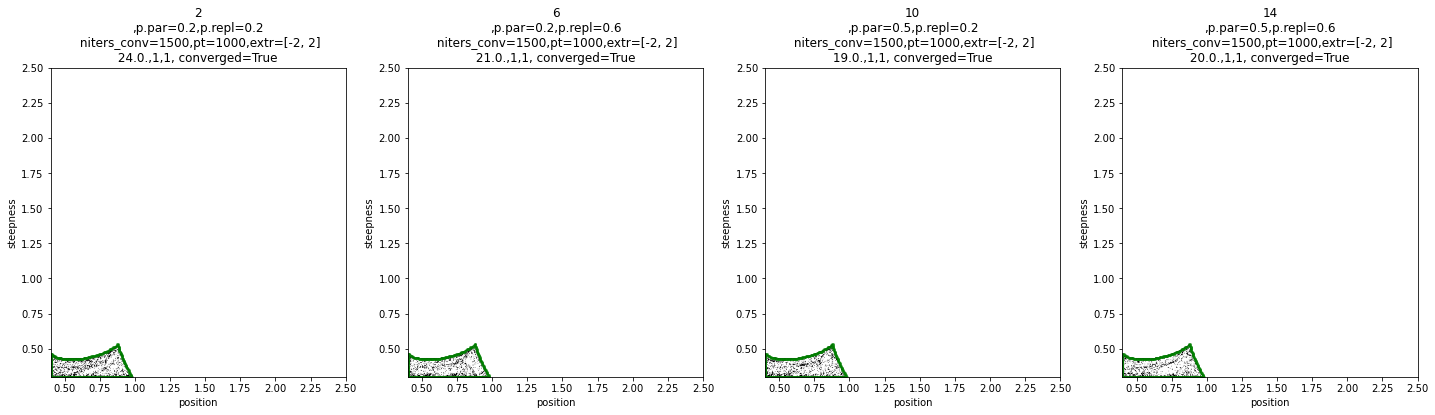

writing file to check in mat_N4Pb1_18.in
jid is 22
/Users/rosamartinezcorral/Dropbox (HMS)/data/2021_12_boundaries/2022_02_04_N4Pol_anybasalP1000/final_results/mat_N4Pb1_22_last.npy
writing file to check in mat_N4Pb1_22.in
jid is 26
/Users/rosamartinezcorral/Dropbox (HMS)/data/2021_12_boundaries/2022_02_04_N4Pol_anybasalP1000/final_results/mat_N4Pb1_26_last.npy
writing file to check in mat_N4Pb1_26.in
jid is 30
/Users/rosamartinezcorral/Dropbox (HMS)/data/2021_12_boundaries/2022_02_04_N4Pol_anybasalP1000/final_results/mat_N4Pb1_30_last.npy
writing file to check in mat_N4Pb1_30.in
jid is 34
/Users/rosamartinezcorral/Dropbox (HMS)/data/2021_12_boundaries/2022_02_04_N4Pol_anybasalP1000/final_results/mat_N4Pb1_34_last.npy


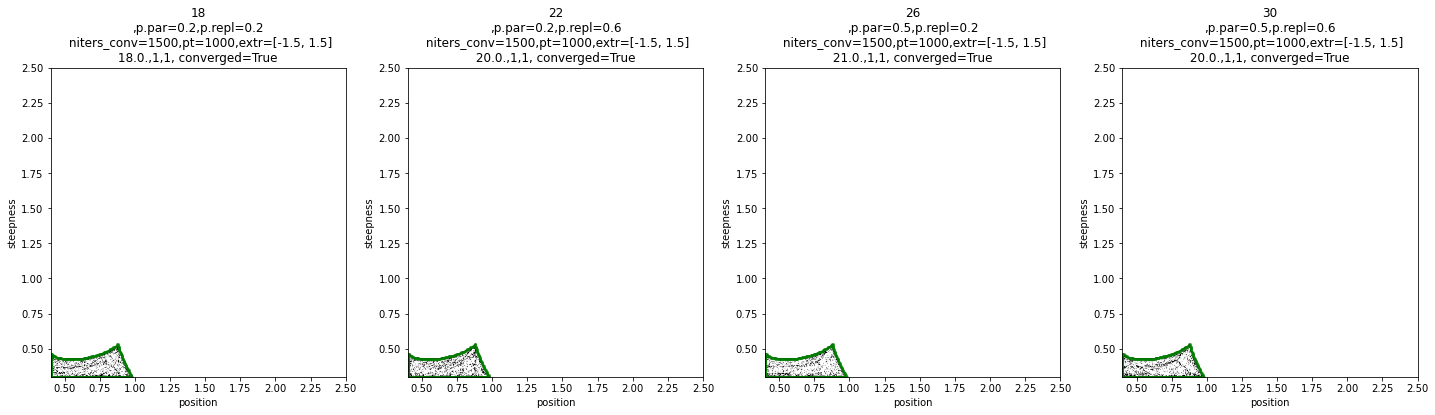

writing file to check in mat_N4Pb1_34.in
jid is 38
/Users/rosamartinezcorral/Dropbox (HMS)/data/2021_12_boundaries/2022_02_04_N4Pol_anybasalP1000/final_results/mat_N4Pb1_38_last.npy
writing file to check in mat_N4Pb1_38.in
jid is 42
/Users/rosamartinezcorral/Dropbox (HMS)/data/2021_12_boundaries/2022_02_04_N4Pol_anybasalP1000/final_results/mat_N4Pb1_42_last.npy
writing file to check in mat_N4Pb1_42.in
jid is 46
/Users/rosamartinezcorral/Dropbox (HMS)/data/2021_12_boundaries/2022_02_04_N4Pol_anybasalP1000/final_results/mat_N4Pb1_46_last.npy
writing file to check in mat_N4Pb1_46.in
jid is 50
/Users/rosamartinezcorral/Dropbox (HMS)/data/2021_12_boundaries/2022_02_04_N4Pol_anybasalP1000/final_results/mat_N4Pb1_50_last.npy


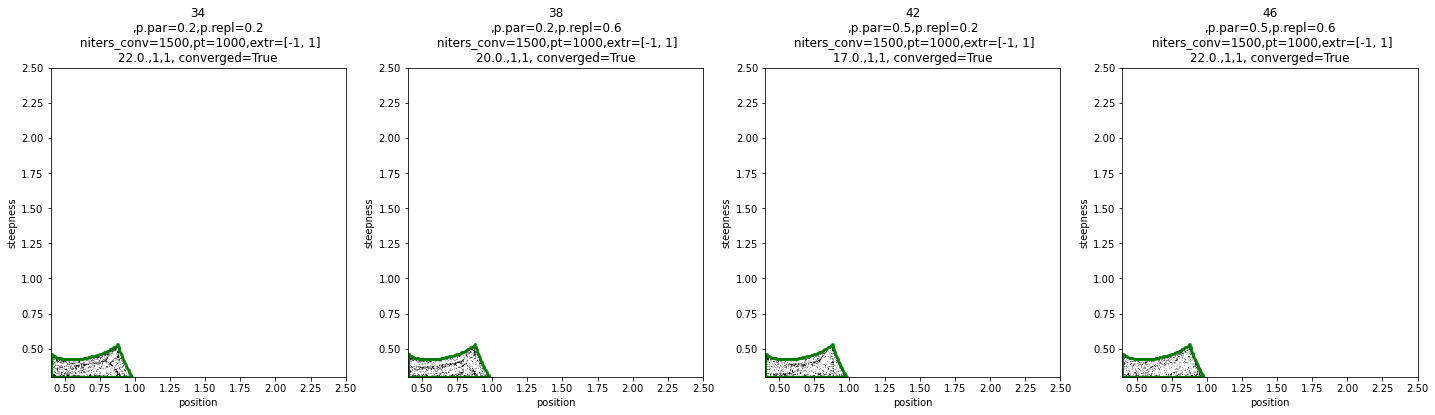

writing file to check in mat_N4Pb1_50.in
jid is 54
/Users/rosamartinezcorral/Dropbox (HMS)/data/2021_12_boundaries/2022_02_04_N4Pol_anybasalP1000/final_results/mat_N4Pb1_54_last.npy
writing file to check in mat_N4Pb1_54.in
jid is 58
/Users/rosamartinezcorral/Dropbox (HMS)/data/2021_12_boundaries/2022_02_04_N4Pol_anybasalP1000/final_results/mat_N4Pb1_58_last.npy
writing file to check in mat_N4Pb1_58.in
jid is 62
/Users/rosamartinezcorral/Dropbox (HMS)/data/2021_12_boundaries/2022_02_04_N4Pol_anybasalP1000/final_results/mat_N4Pb1_62_last.npy
writing file to check in mat_N4Pb1_62.in


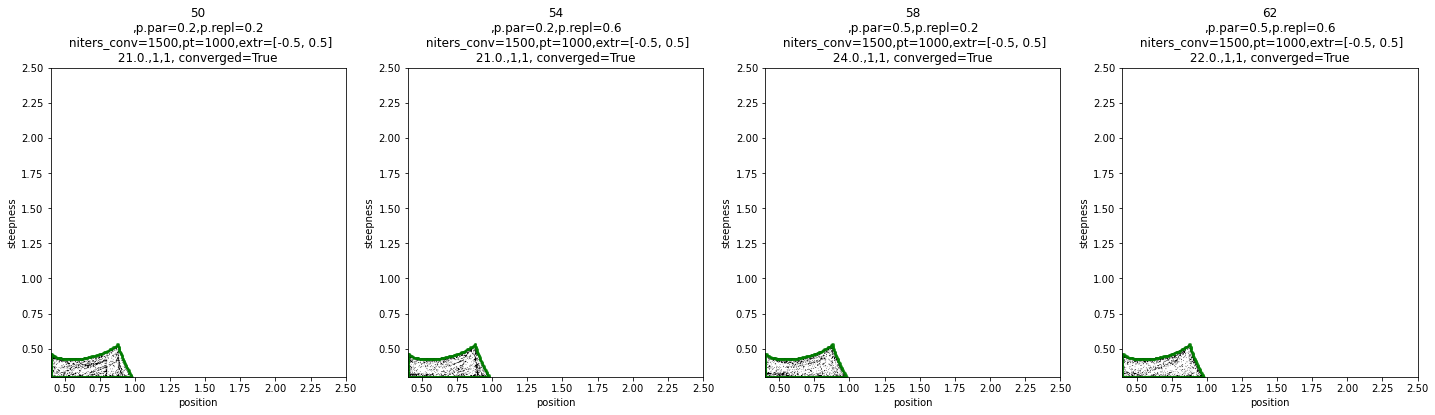

folder to check with mathematica is /Users/rosamartinezcorral/Dropbox (HMS)/data/2021_12_boundaries/2022_02_04_N4Pol_anybasalP1000/tocheck_N4Pb1
(441, 421)


In [8]:
processrawdata=True

#if processrawdata:
allbs=dict()
allchecks=dict()



args={'njobs':None, #in case any of the searches failed, otherwise indicate number of jobs 
      'final':True, #jobs converged (False if the jobs were killed due to e.g. time constraints)
      'printtocheck':True,#print results to check with an alternative method or software e.g. mathematica
      'fldr':folder1,
      'basename':basename,
    'joinmats':True,
      'jid_num':jid, 
      'reference':None, 
      'xlabel':'position', 'ylabel':'steepness',
      'getallpoints':True,
     'septime':" ",
     'difparslimit':True,#True if the search was launched for different parameter ranges
     'unfinishedfolder':None} #indicate folder where intermediate results are saved, if final=False
results=AnalyseBoundarysearch.plot_boundaries_search(**args)
   
    


It seems that all are good. Let's doublecheck with mathematica:

In [9]:
checkf=results[0][1] 
#tolerance manually modified to 0.0075
print(checkf)
P=1000 
command="wolframscript -file ../bin/N4Pol_basal.wl '%s' '%s' '%s'"%(checkf,absder,P)  
! $command

/Users/rosamartinezcorral/Dropbox (HMS)/data/2021_12_boundaries/2022_02_04_N4Pol_anybasalP1000/tocheck_N4Pb1
mat_N4Pb1_10.in
mat_N4Pb1_10_checked.out
First line
absder True
starting at
/Users/rosamartinezcorral/Dropbox (HMS)/data/2021_12_boundaries/2022_02_04_N4Pol_anybasalP1000/tocheck_N4Pb1
P value is 1000
Defined GRF

Solve::ratnz: Solve was unable to solve the system with inexact coefficients. The answer was obtained by solving a corresponding exact system and numericizing the result.
1,
Solve::ratnz: Solve was unable to solve the system with inexact coefficients. The answer was obtained by solving a corresponding exact system and numericizing the result.

Solve::ratnz: Solve was unable to solve the system with inexact coefficients. The answer was obtained by solving a corresponding exact system and numericizing the result.

General::stop: Further output of Solve::ratnz will be suppressed during this calculation.
2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27

1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,

1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,

1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,

limits of parameters:,0.001 1000.0;0.001 1000.0;0.001 1000.0;0.001 1000.0;0.001 1000.0;0.001 1000.0;0.001 1000.0;0.001 1000.0;0.001 1000.0;0.001 1000.0;0.001 1000.0;0.001 1000.0;0.001 1000.0;0.001 1000.0;0.001 1000.0;0.001 1000.0;

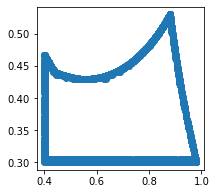

limits of parameters:,0.0001 10000.0;0.0001 10000.0;0.0001 10000.0;0.0001 10000.0;0.0001 10000.0;0.0001 10000.0;0.0001 10000.0;0.0001 10000.0;0.0001 10000.0;0.0001 10000.0;0.0001 10000.0;0.0001 10000.0;0.0001 10000.0;0.0001 10000.0;0.0001 10000.0;0.0001 10000.0;

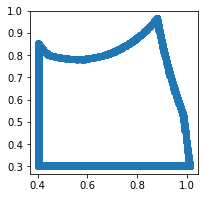

In [10]:
checkedfiles1=[x for x in os.listdir(checkf) if ".out" in x and "checked" in x]#all parameter sets tested with max derivative not at 0 and coincident result with mathematica

parlims_nums=[[2, 6, 10, 14, 18, 22, 26, 30, 34, 38, 42, 46, 50, 54, 58, 62],
              [3, 7, 11, 15, 19, 23, 27, 31, 35, 39, 43, 47, 51, 55, 59, 63]] #copy-paste from what is printed above
             
              
              
              
checked_pos_stp=[[] for x in range(len(parlims_nums))]
for plim in range(len(parlims_nums)):
    allpos=[]
    allrhos=[]
    print("limits of parameters:", end=",")
    for f in checkedfiles1:
        #print(f)
        num=int(f.split("_")[2])
        #print(f,num)
        if num in parlims_nums[plim]:
            data=pd.read_csv(os.path.join(checkf,f),sep=",|;",engine="python") #sep and engine are used to indicate that there are 2 separators
            pos=data["pos"].values
            stp=data["rho"].values
            print(data.values[:,2:].min(),data.values[:,2:].max(),end=";")
            allpos.extend(pos)
            allrhos.extend(stp)
    fig,ax=plt.subplots(1,1,figsize=(3,3))
    ax.scatter(allpos,allrhos)
    plt.show()
    checked_pos_stp[plim]=[allpos,allrhos]
    
    

In [11]:
folder1

'/Users/rosamartinezcorral/Dropbox (HMS)/data/2021_12_boundaries/2022_02_04_N4Pol_anybasalP1000'

2022_3_3
[3.0, 4.0]


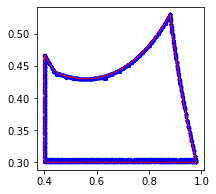

./ashapes/ashape_N4Pb1000_3_2022_3_3.npy


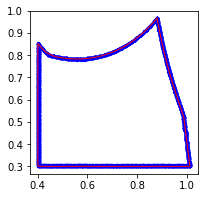

./ashapes/ashape_N4Pb1000_4_2022_3_3.npy


In [15]:

localt=time.localtime()
string="%d_%d_%d"%(localt[0],localt[1],localt[2])
print(string)


plims=[np.log10(x[1]) for x in extremespars[-2:]]
print(plims)
name_ashape="ashape_N4Pb1000"
for i in range(len(plims)):
    data=checked_pos_stp[i]
    allpoints=results[i][2]
    
    

    l_p=[(data[0][j],data[1][j]) for j in range(len(data[0]))] 
    alpha=15
    plt.figure(figsize=(3,3))
    plt.scatter(data[0],data[1],color="b",s=5)

    a=alphashape.alphashape(l_p,alpha=alpha)   #tweak alpha until it adapts well to the points
    plt.plot(a.exterior.xy[0],a.exterior.xy[1],color="r",linewidth=1)
    plt.show()
    namesave=os.path.join(ashapesfolder,"%s_%d_%s.npy"%(name_ashape,plims[i],string))
    print(namesave)
    np.save(namesave,(a.exterior.xy))


In [18]:
#compare the p=4 to the previous alphashape
current=np.load(os.path.join(ashapesfolder,"%s_%d_2022_3_3.npy"%(name_ashape,4)))
past=np.load("../../../work2/universalb/alphashapes2021/ashape_N4Pol_anycoop_absder_basal_P1000_4_2021_6_14.npy")


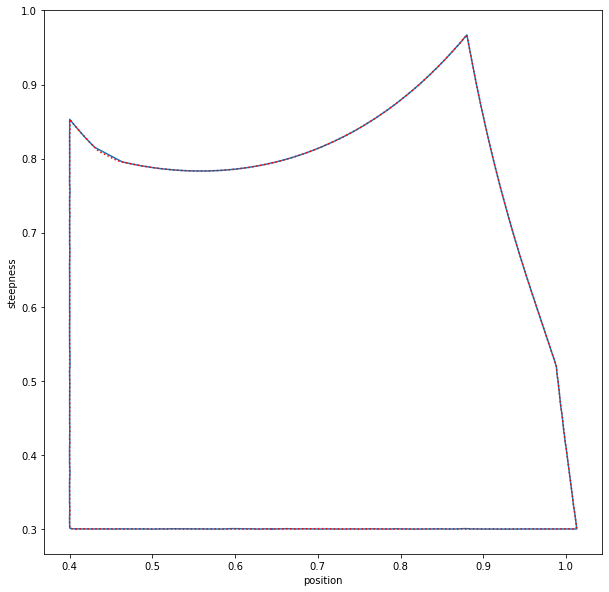

In [21]:
fig,ax=plt.subplots(1,1,figsize=(10,10))

ax.plot(current[0],current[1])
ax.plot(past[0],past[1],linestyle=":",color="r")
ax.set_xlabel("position")
ax.set_ylabel("steepness")
plt.show()


In [22]:
def plot_hillline(ax,nmax=1):
    nrange=np.arange(1.8,nmax+0.2,0.1)
    hillline=np.vstack([BF.position_steepness_hill(n) for n in nrange])
    #fig,ax=plt.subplots(1,1,figsize=(5,5))
    ax.plot(hillline[:,0],hillline[:,1],color='gray',linestyle='--',label='Hill line')
    for n in range(2,nmax):
        ph,sh=BF.position_steepness_hill(n)
        ax.scatter(ph,sh,color='gray')
        ax.text(ph*1.01,sh*0.98,'n=%d'%n,color='gray')
    ax.legend()
    #ax.set_xlim(0.499,1.2)
    ax.set_xlabel('position')
    ax.set_ylabel('steepness')
    return ax

3.0
4.0


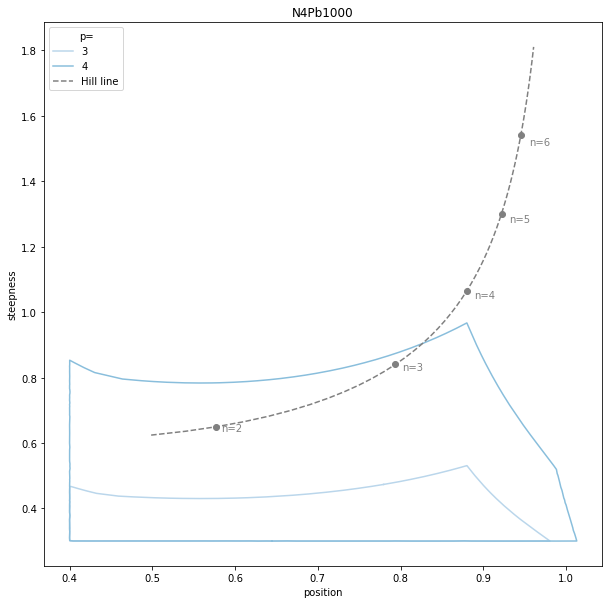

In [24]:
colors=plt.cm.Blues(np.linspace(0,1,8)[2:])
fig,ax=plt.subplots(1,1,figsize=(10,10))
ax.set_title("N4Pb1000")
linestyles=["-","-","-",":"]
for i in range(len(plims)):
    print(plims[i])
    date=string
    ashape=np.load(os.path.join(ashapesfolder,"%s_%d_%s.npy"%(name_ashape,plims[i],date)))
    ax.plot(ashape[0],ashape[1],color=colors[i],label="%g"%plims[i],linestyle=linestyles[i])
    ax.set_xlabel("position")
    ax.set_ylabel("steepness")
ax=plot_hillline(ax,nmax=7)
ax.legend(title="p=")
plt.show()


In [25]:
#plot functions with p>1:

In [26]:
sys.path.append("../bin")

import N4Pol_basal

In [27]:
instance=N4Pol_basal.GRFCalculations_50_50_15()
checkf="/Users/rosamartinezcorral/Dropbox (HMS)/data/2021_12_boundaries/2022_01_22_N4Pol_anybasalP1/tocheck_N4Pb1"


74


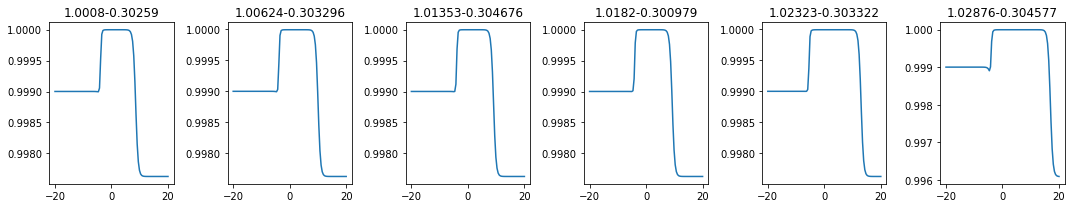

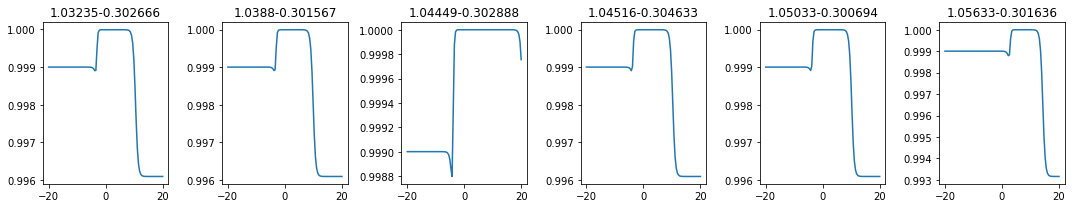

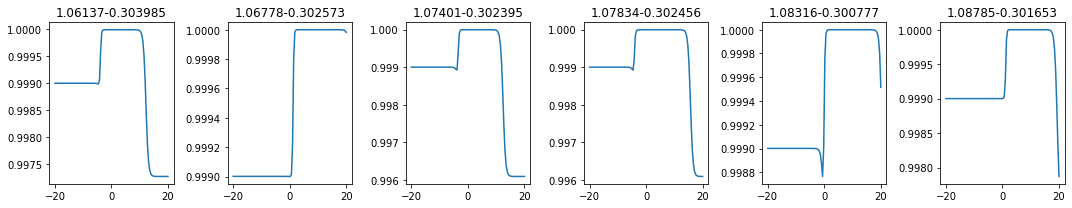

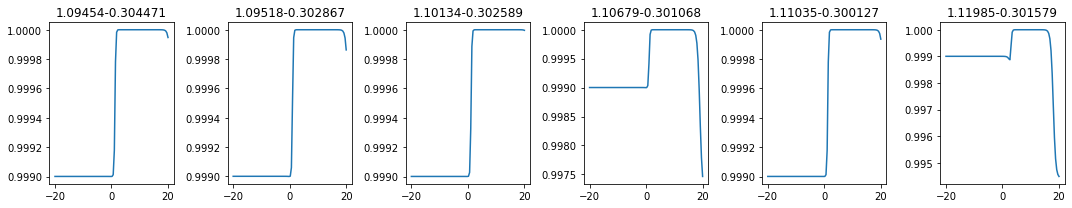

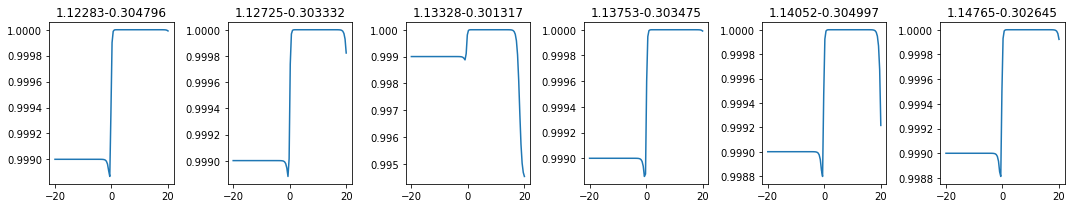

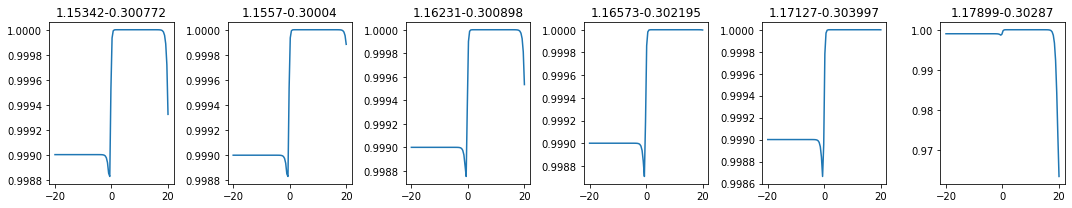

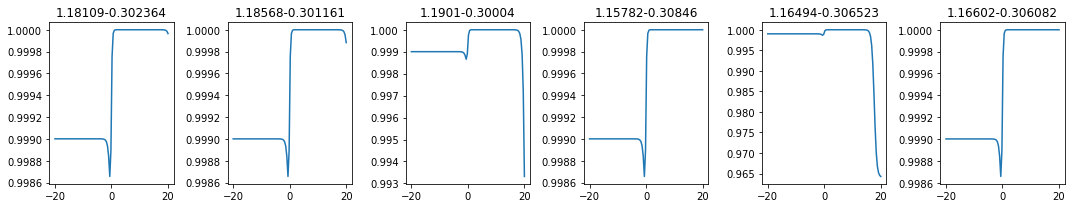

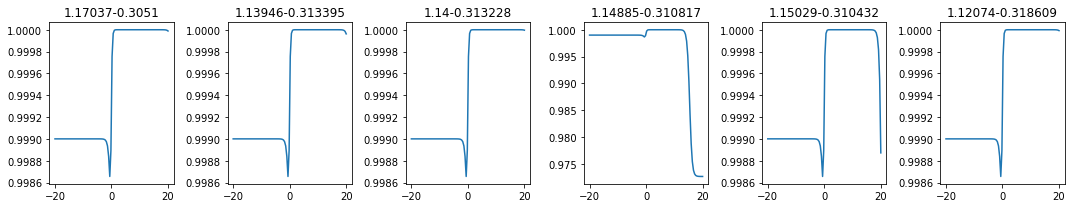

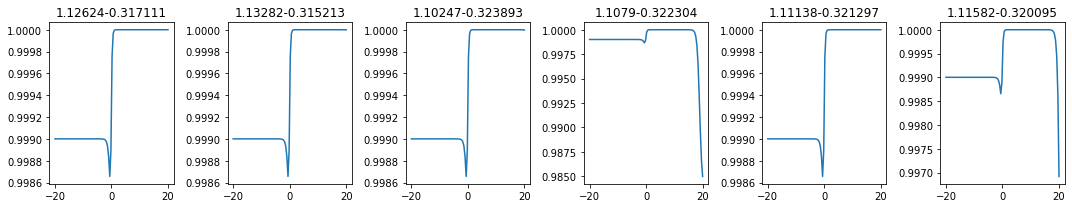

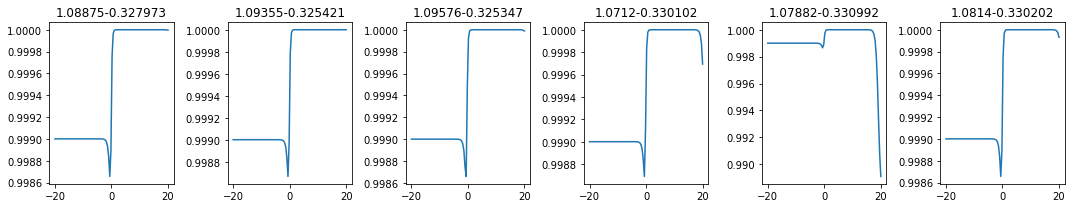

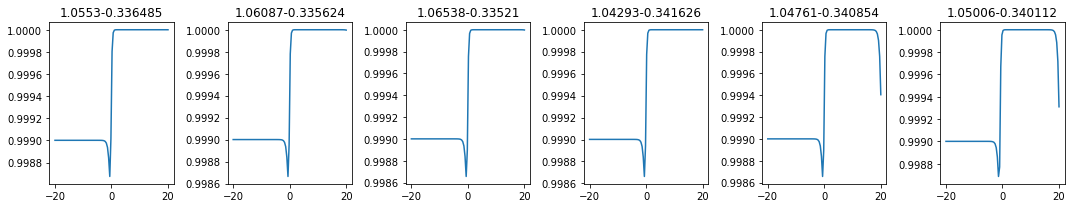

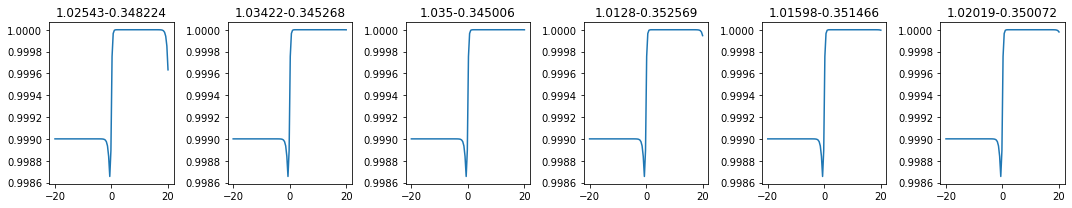

74


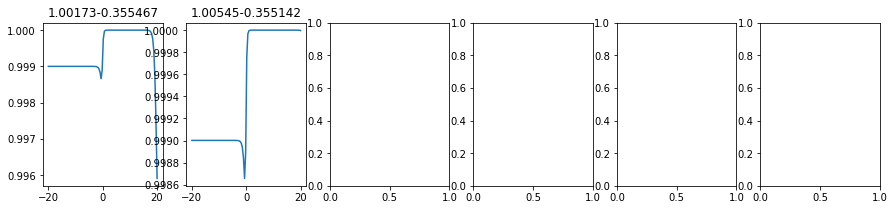

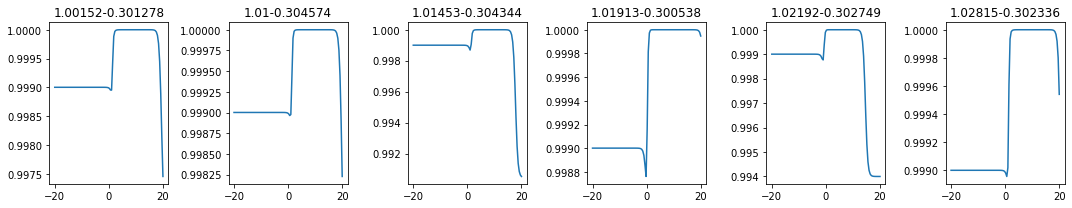

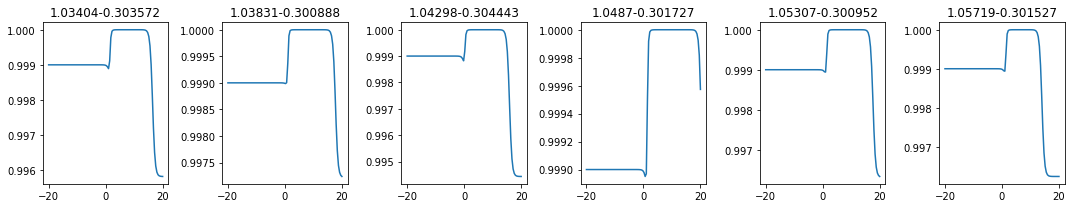

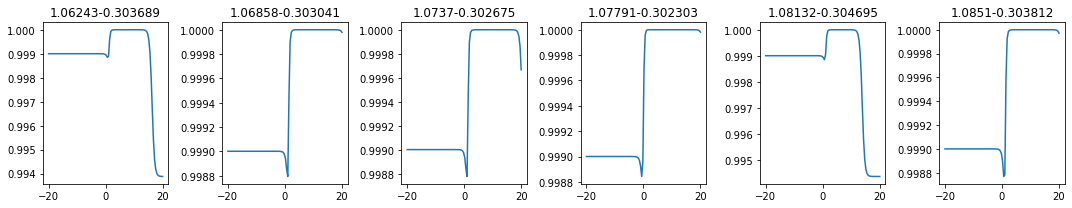

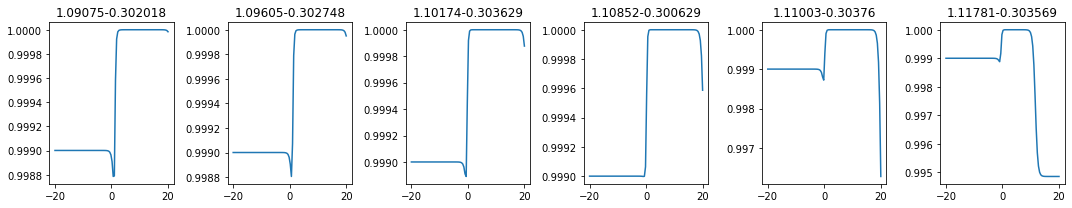

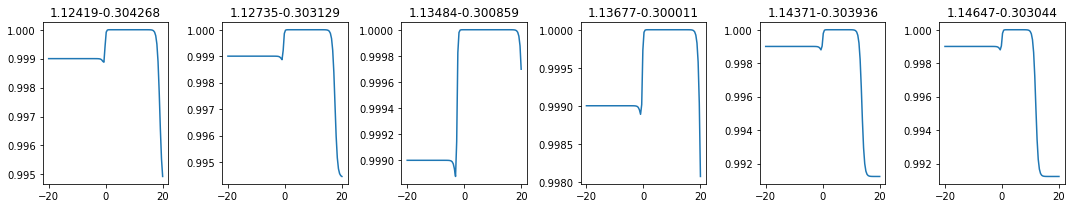

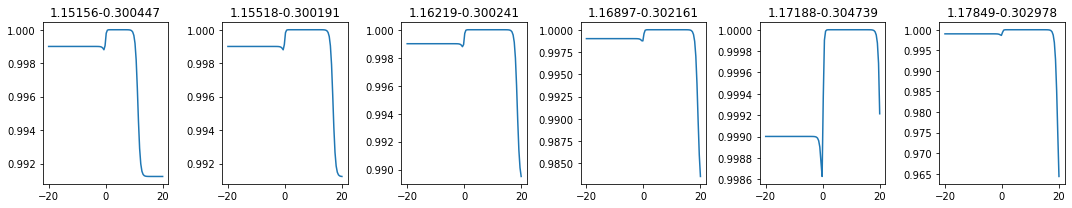

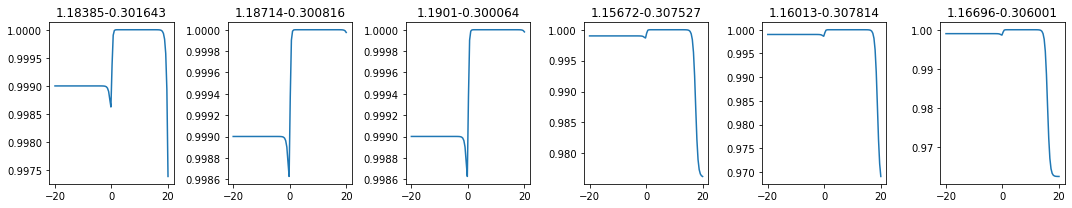

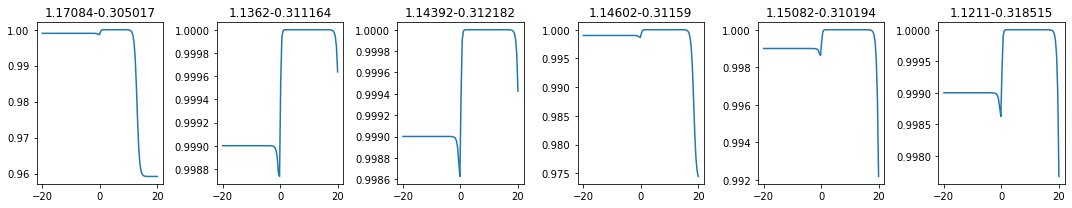

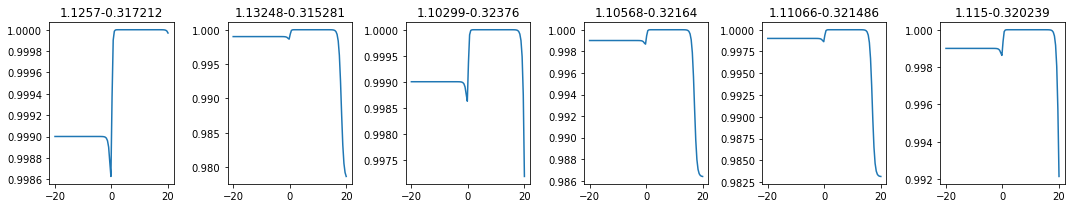

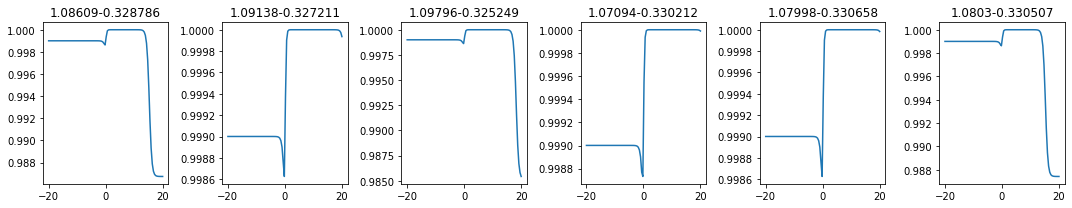

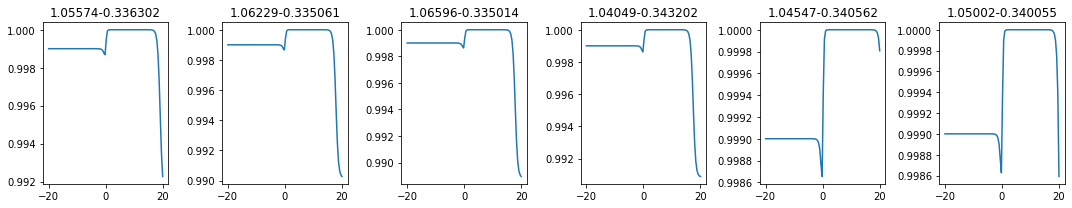

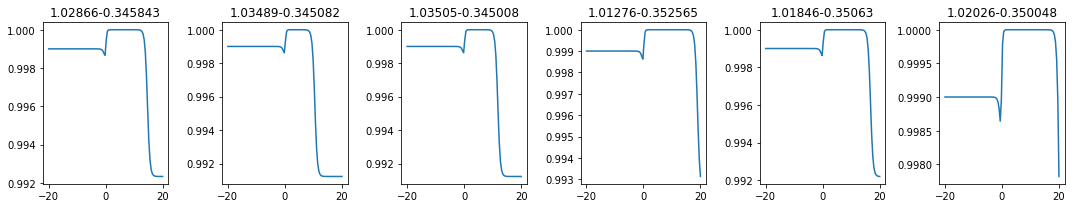

74


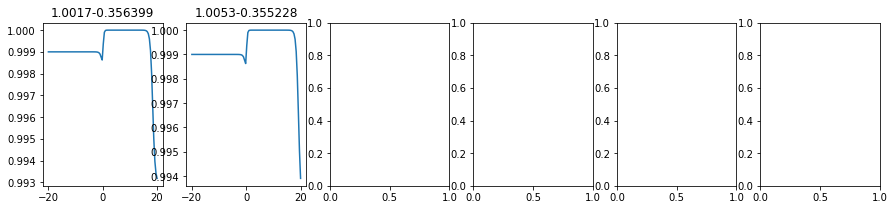

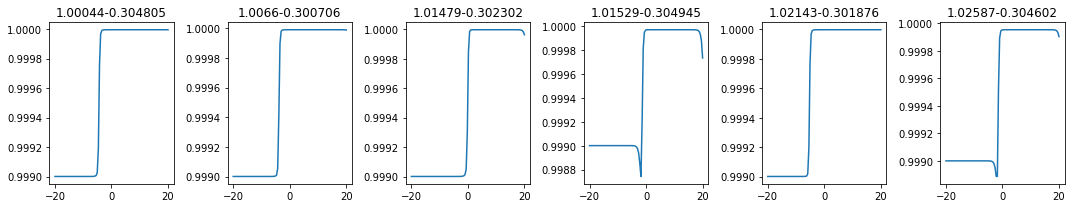

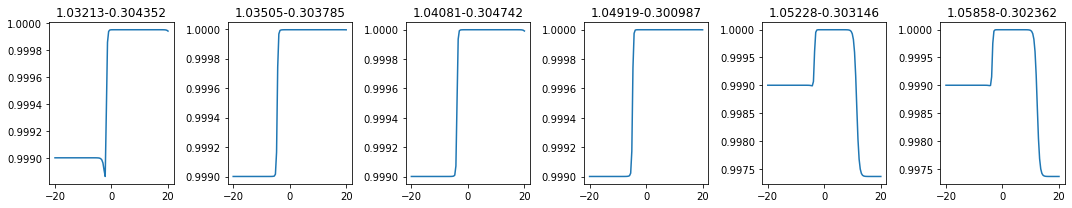

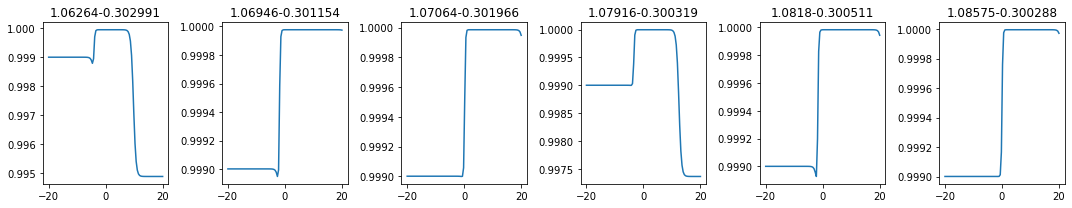

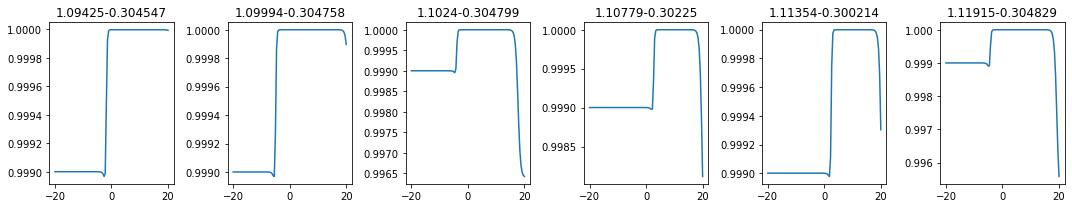

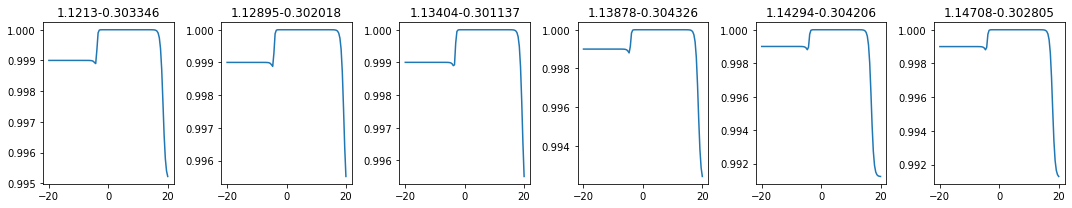

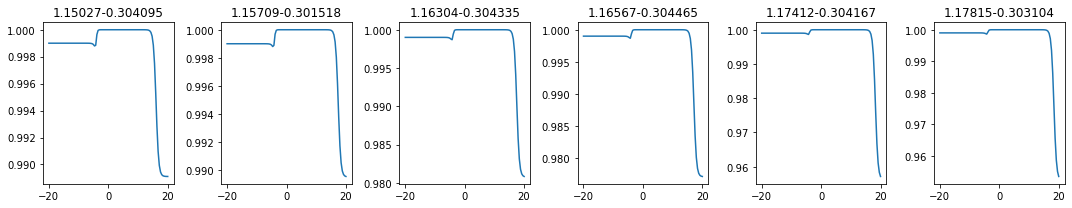

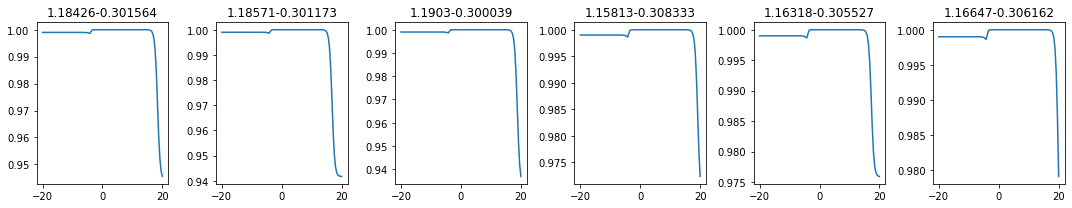

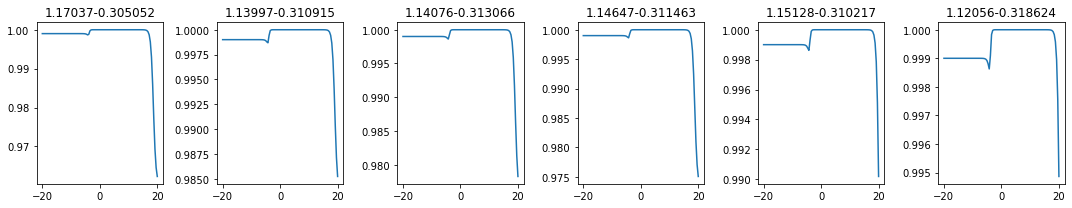

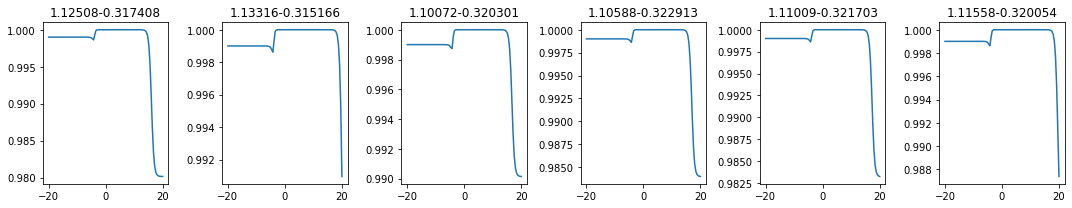

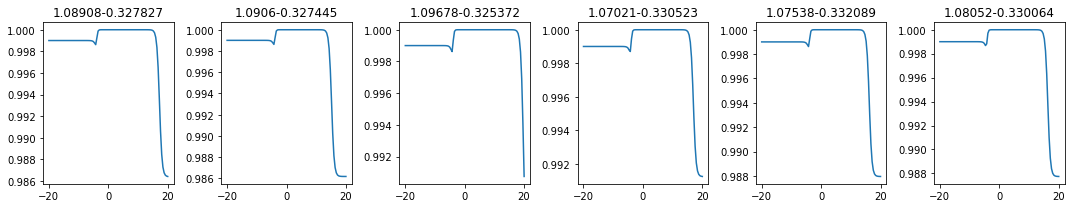

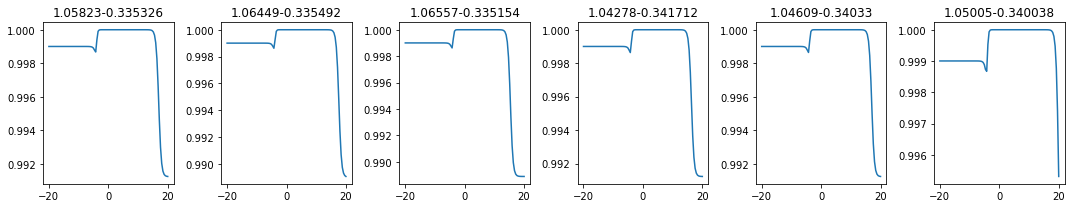

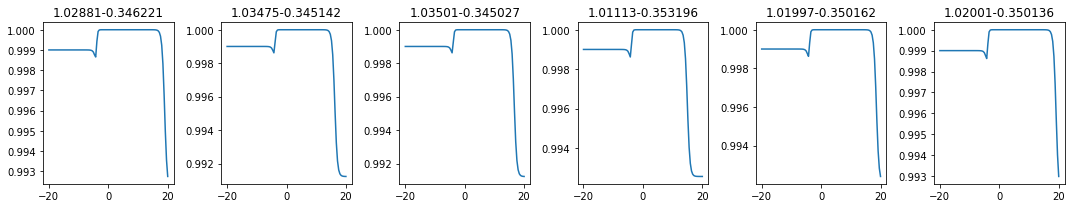

74


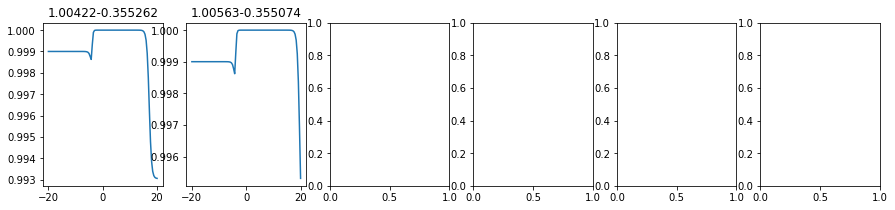

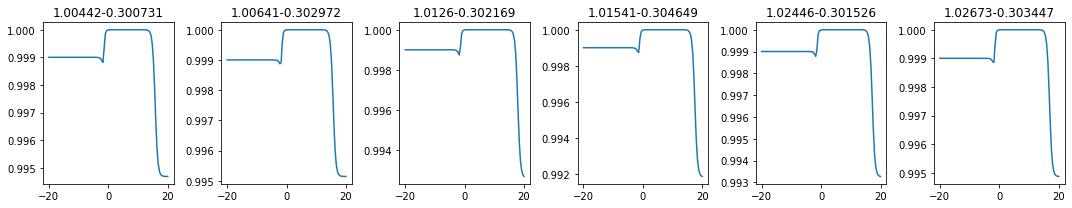

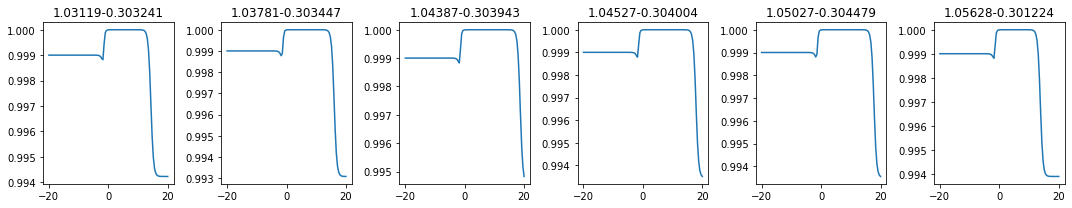

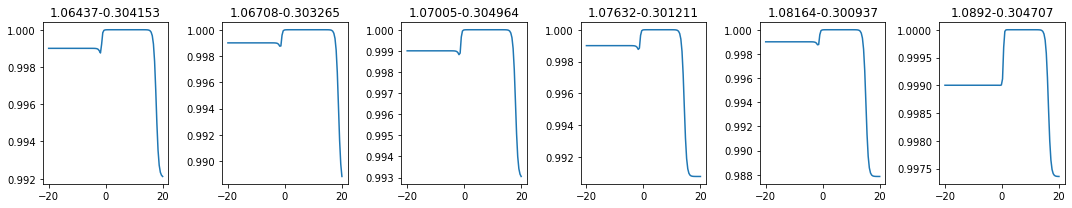

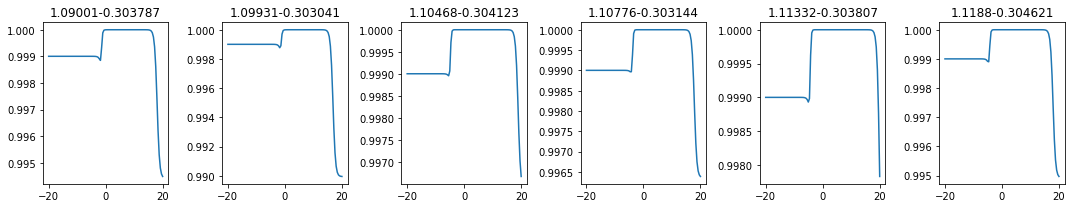

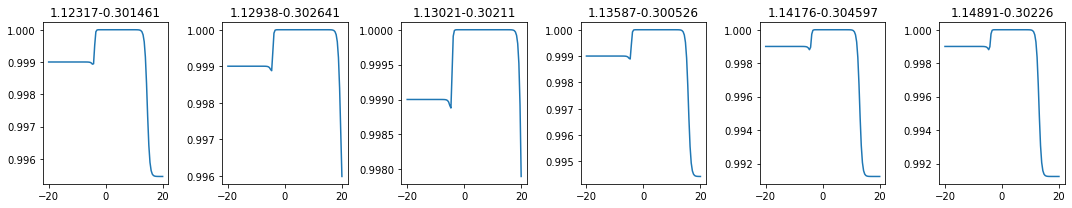

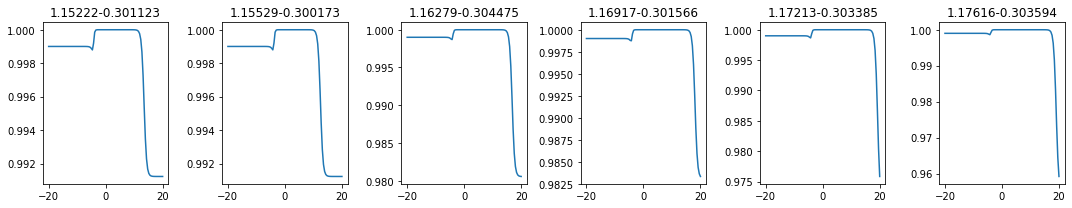

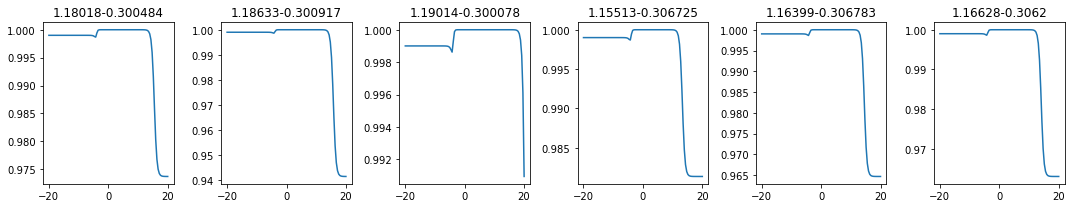

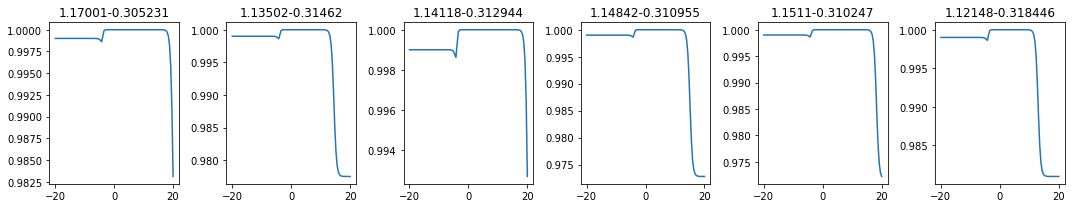

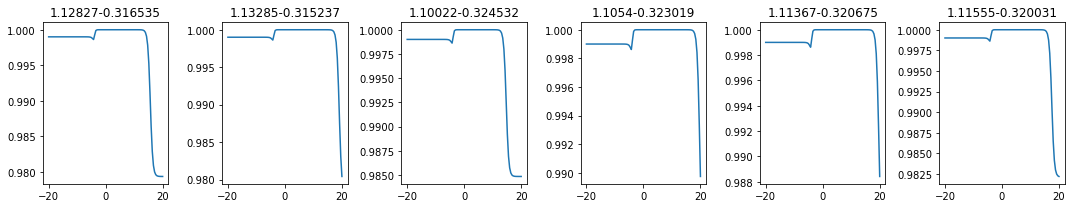

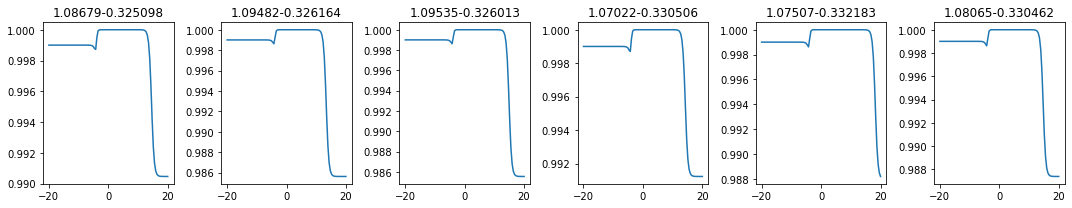

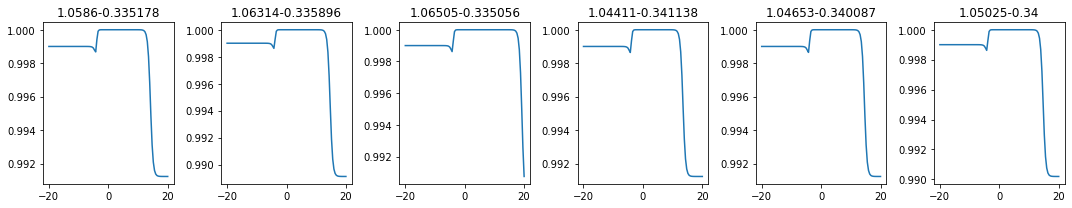

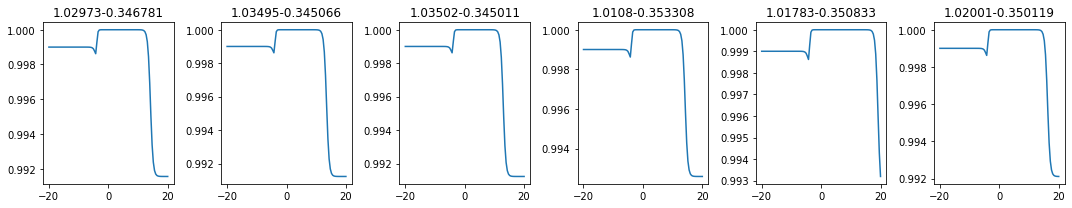

74


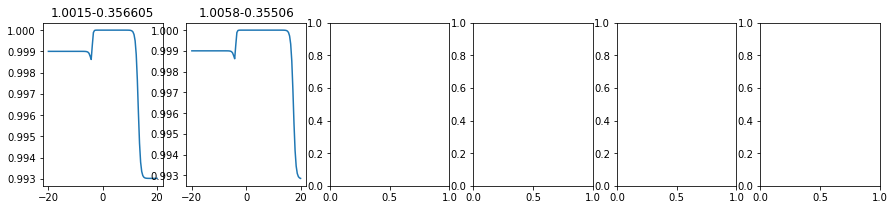

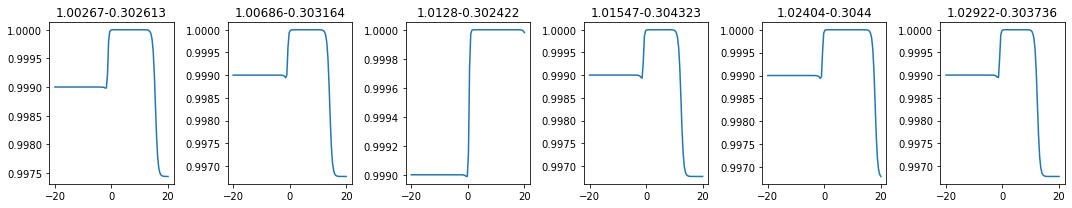

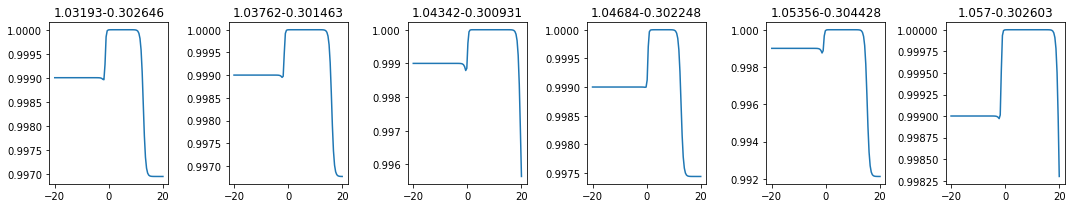

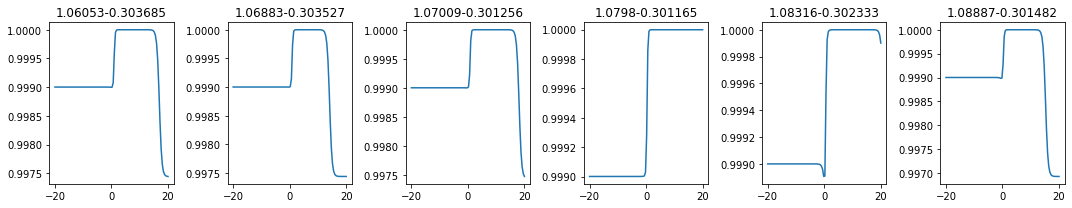

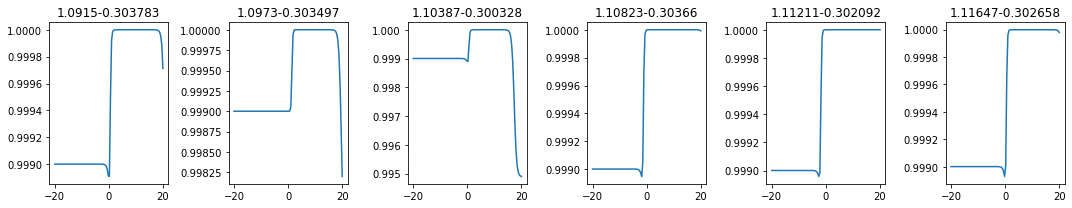

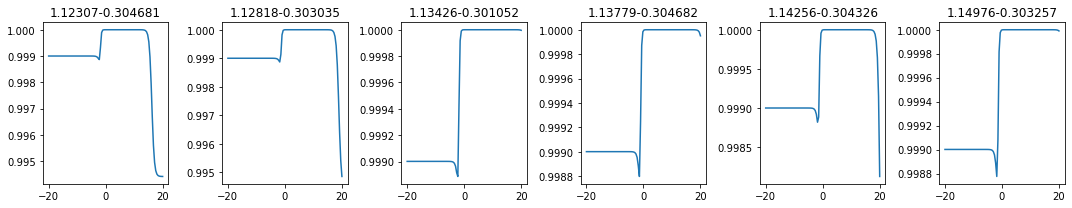

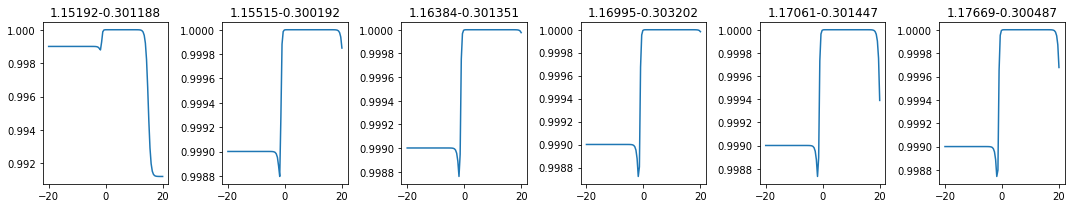

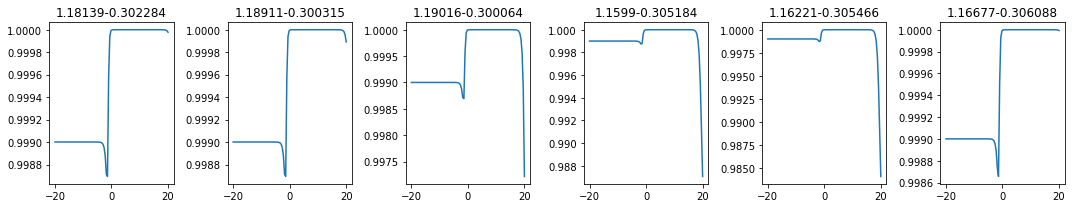

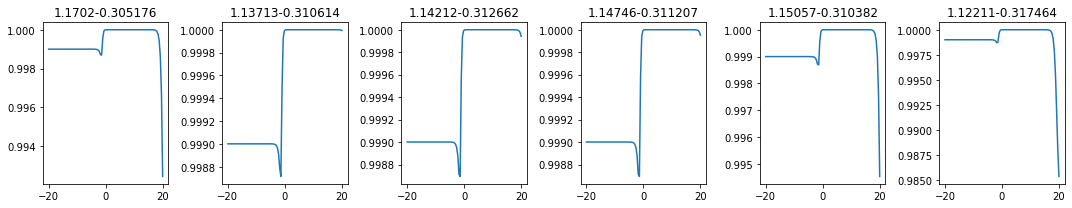

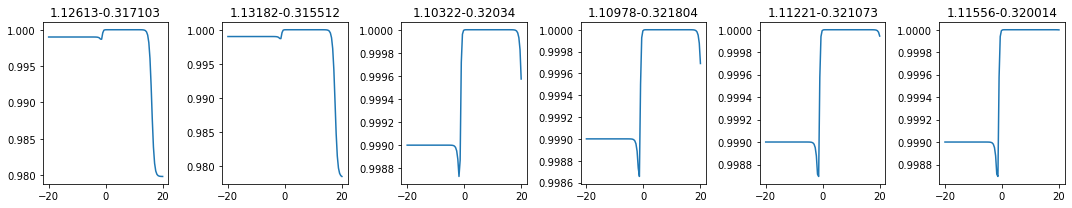

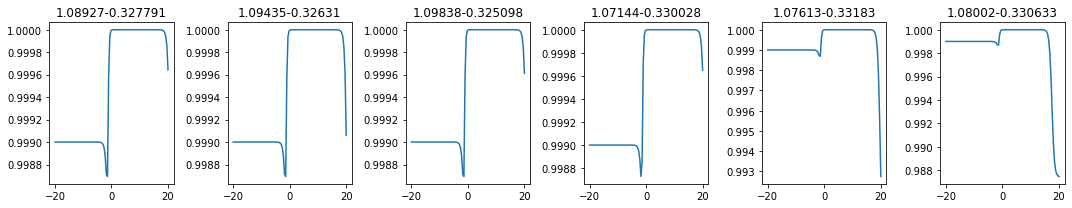

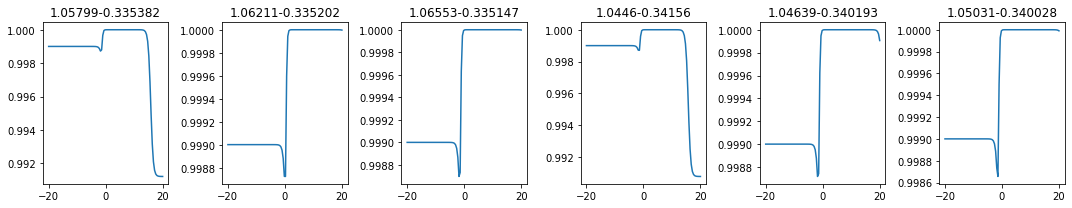

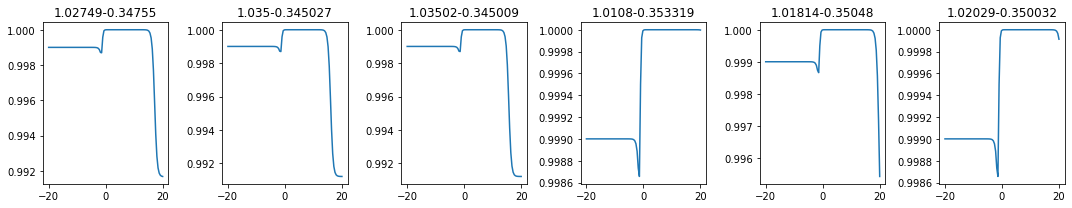

74


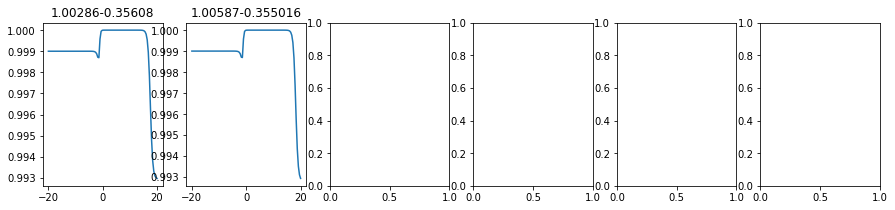

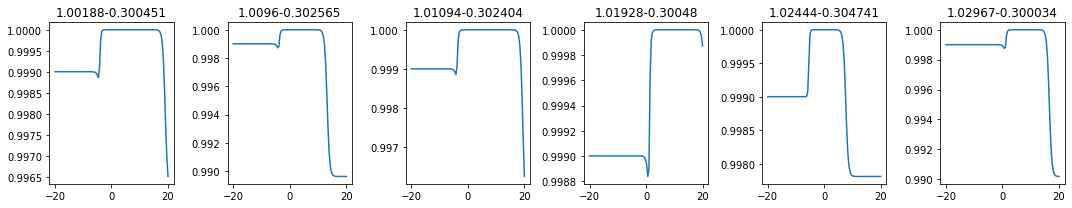

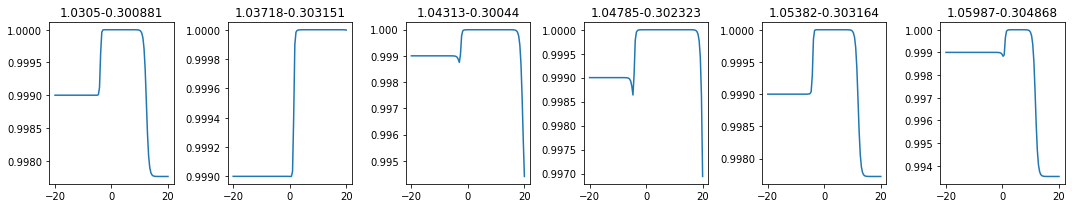

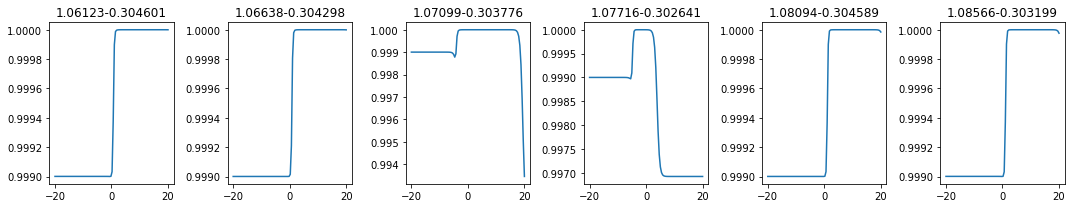

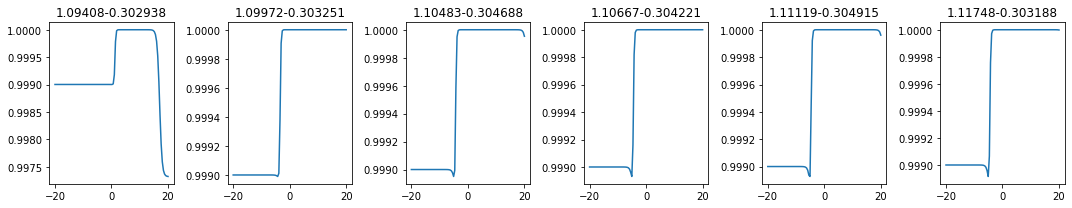

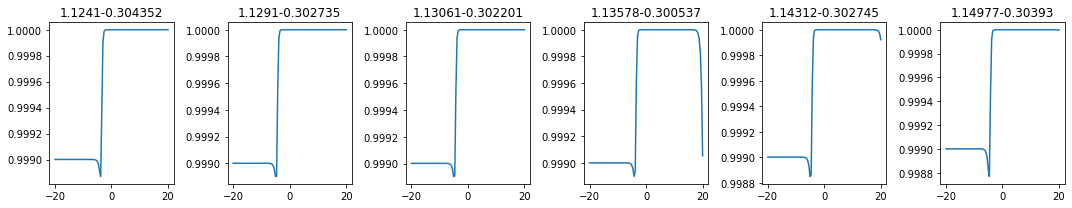

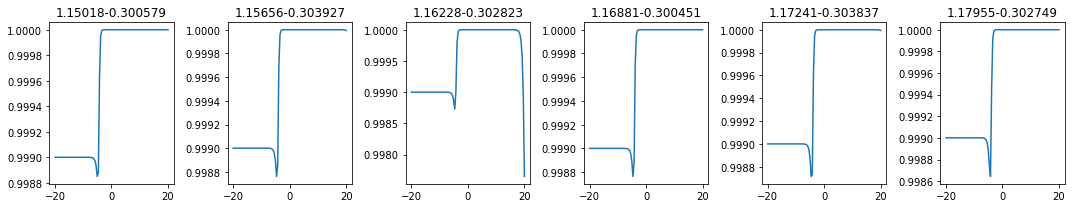

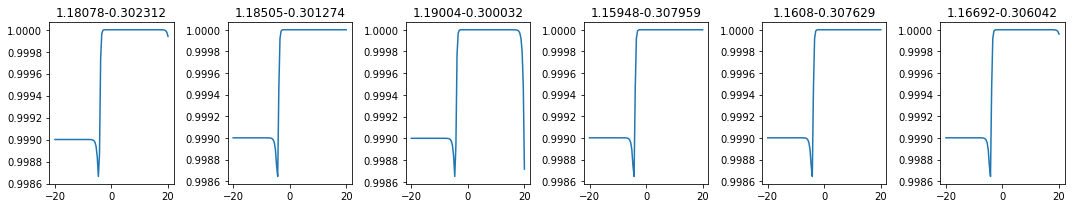

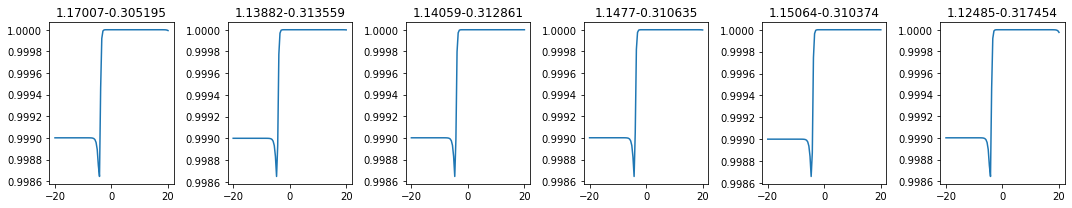

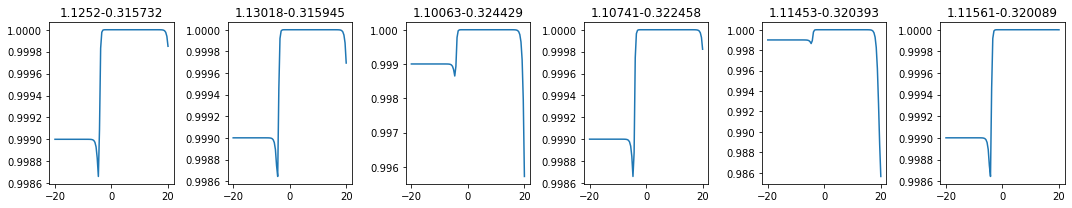

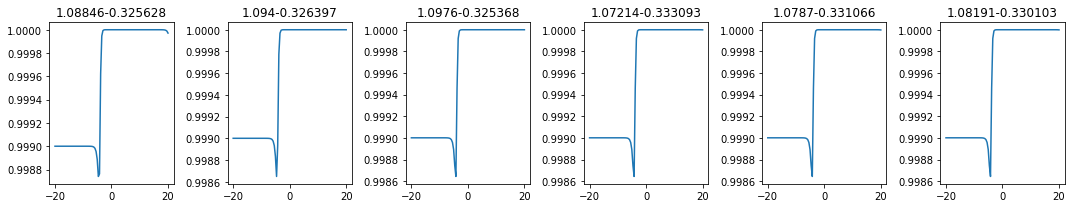

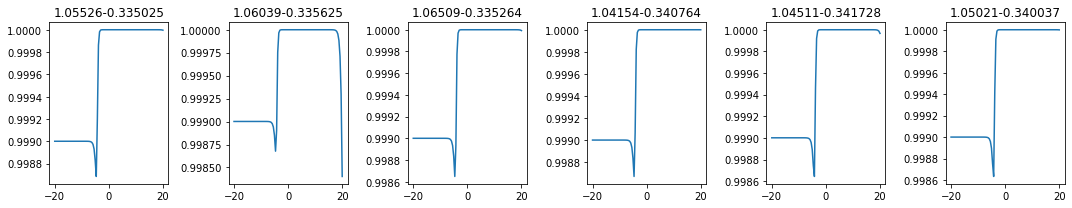

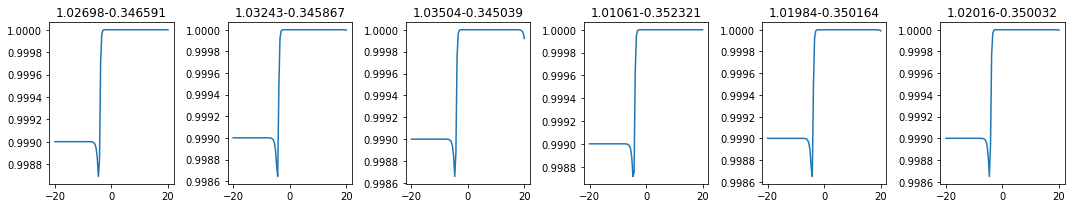

70


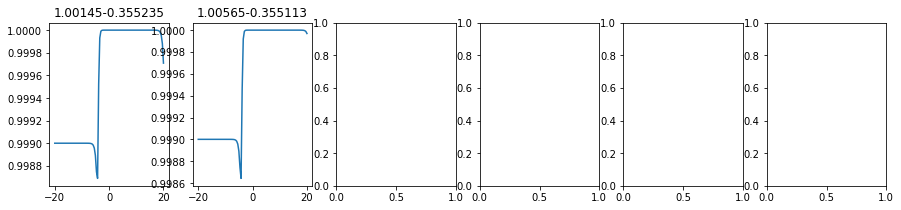

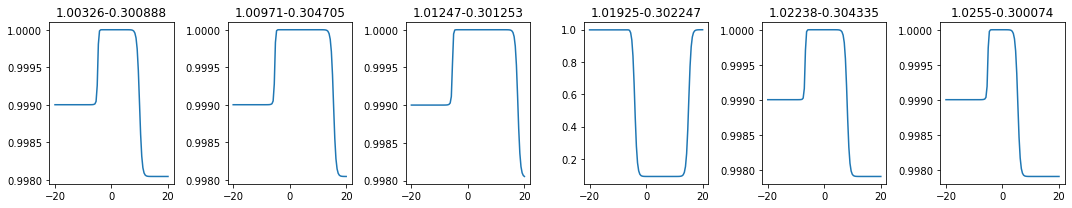

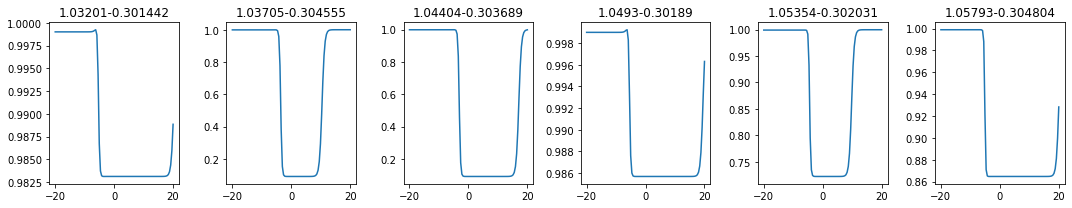

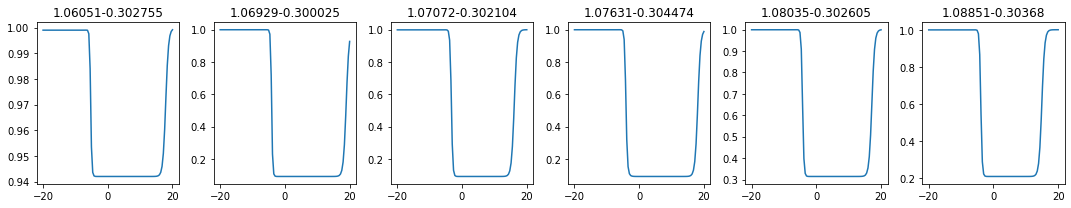

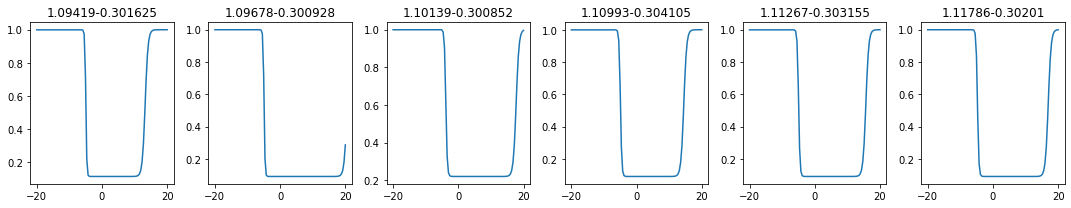

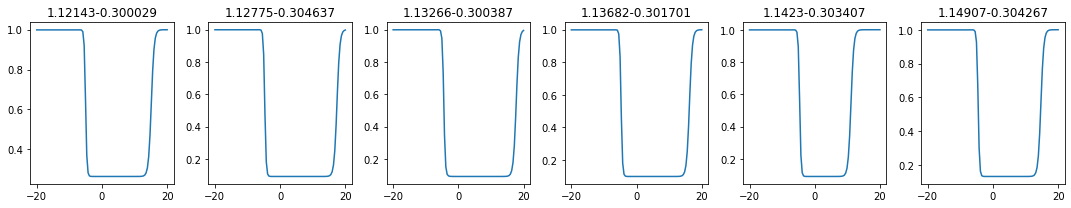

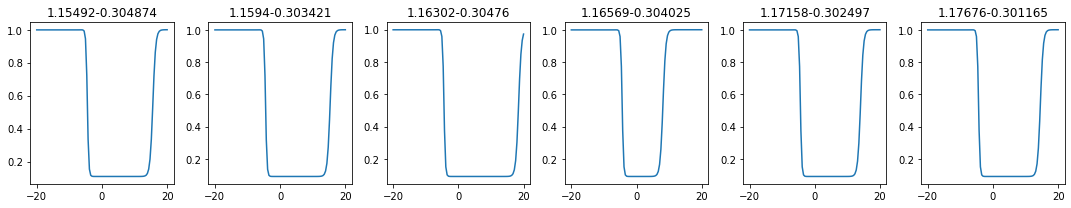

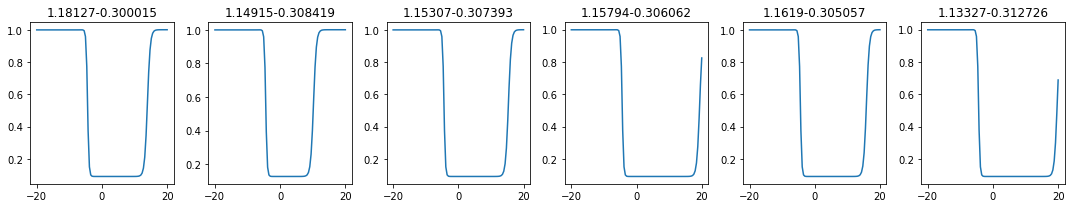

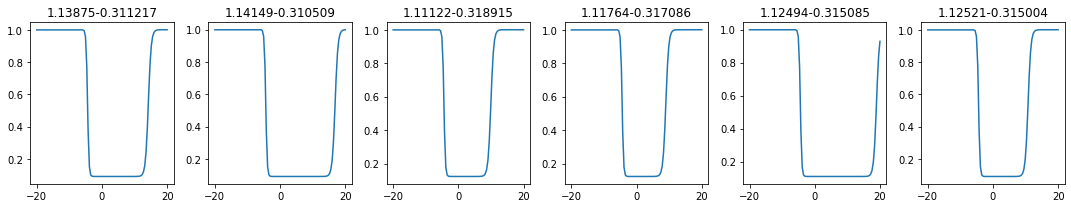

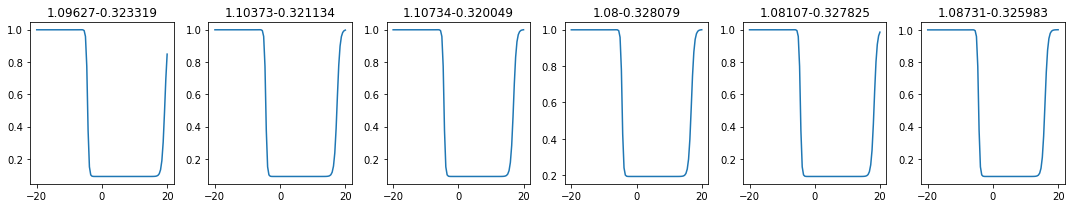

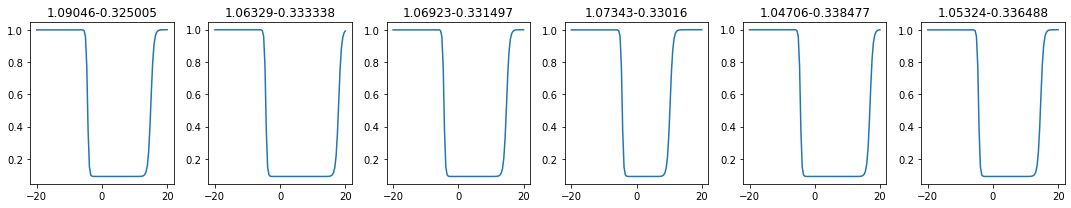

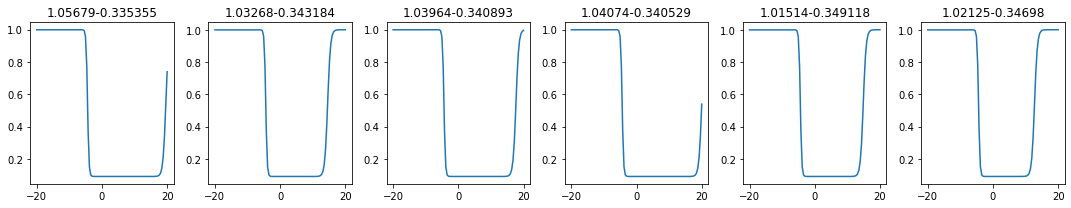

74


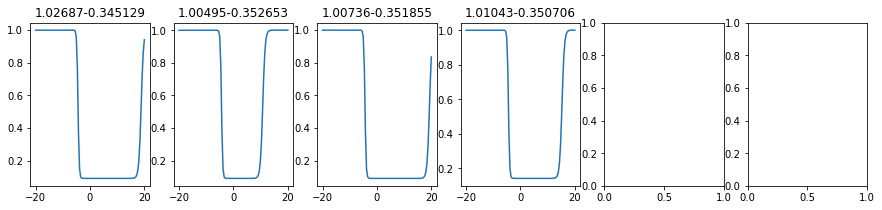

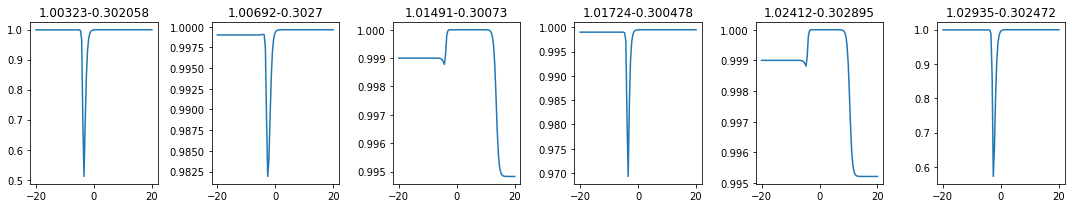

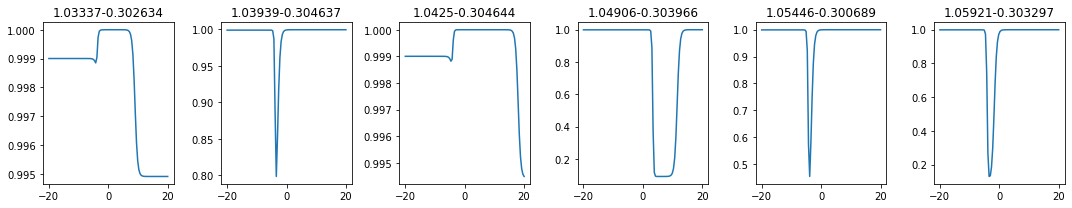

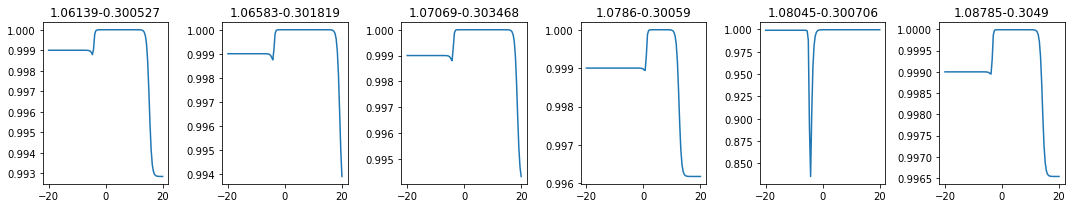

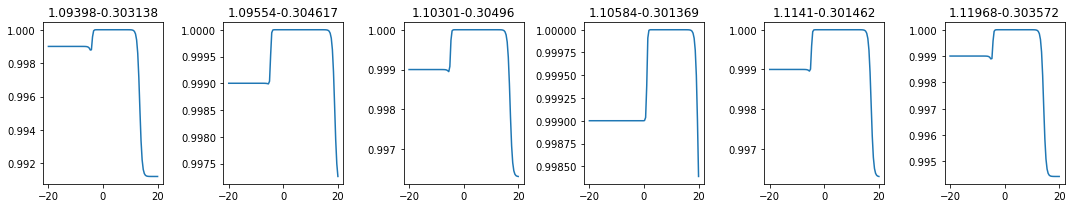

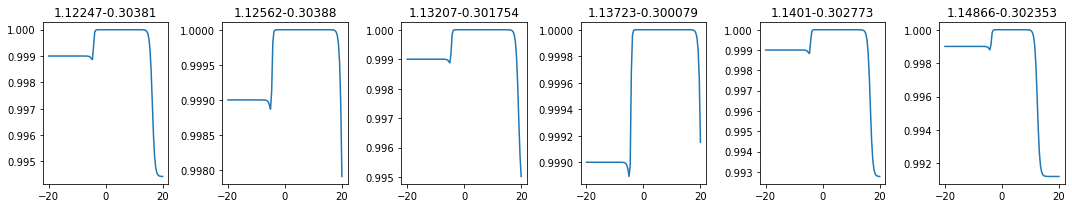

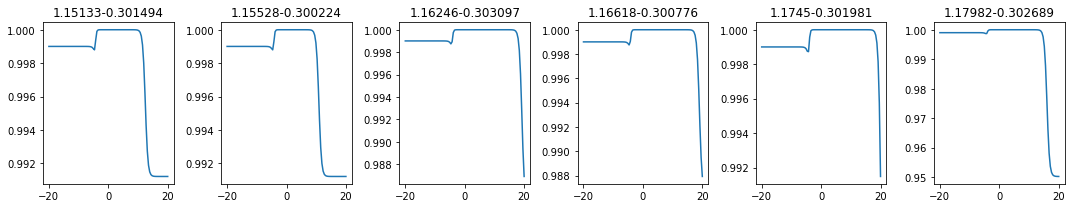

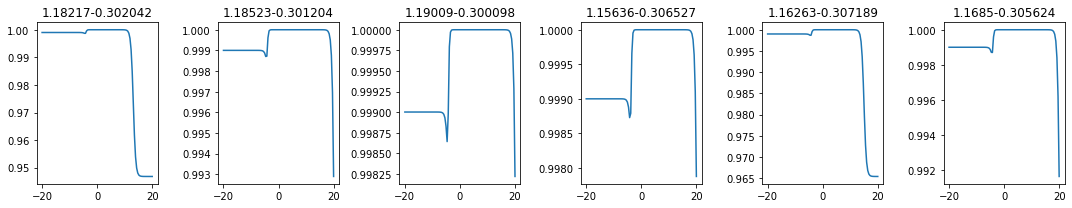

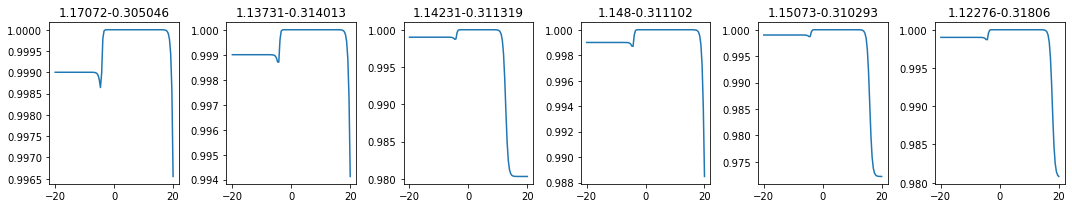

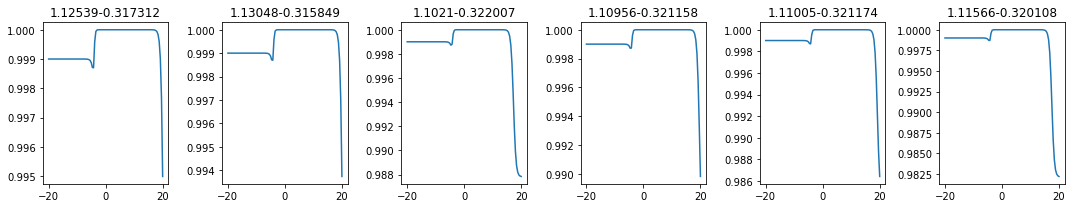

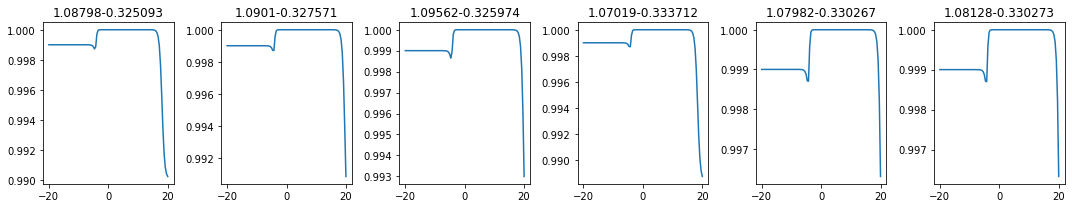

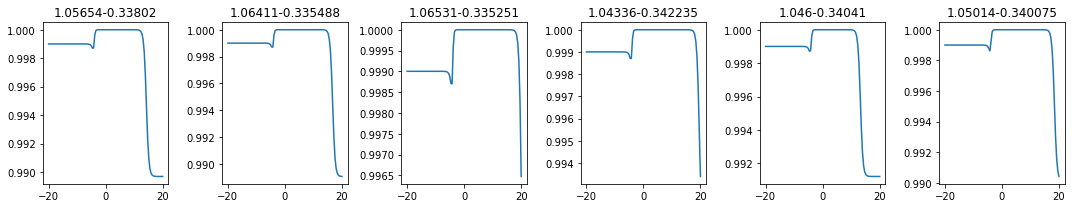

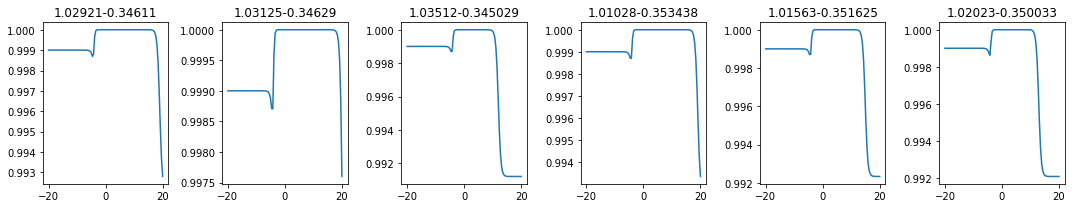

70


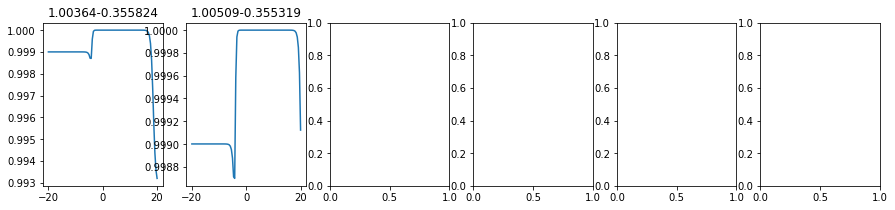

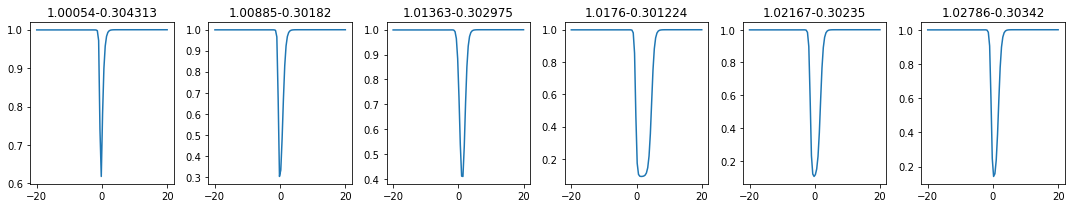

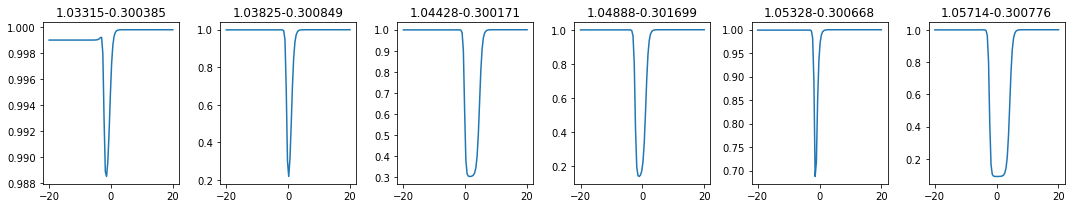

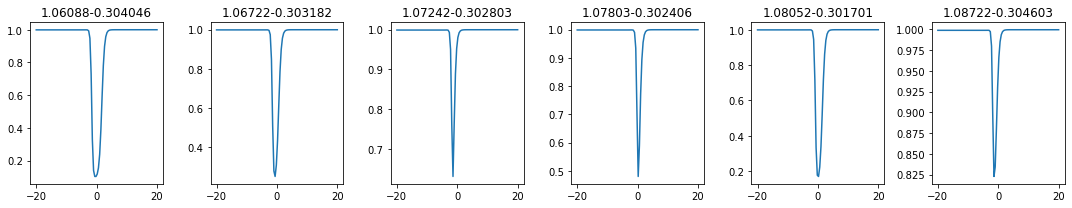

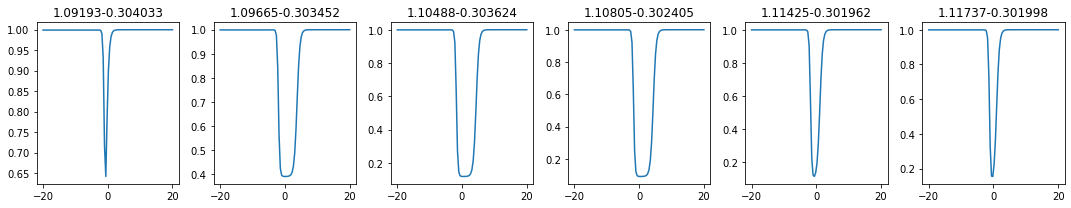

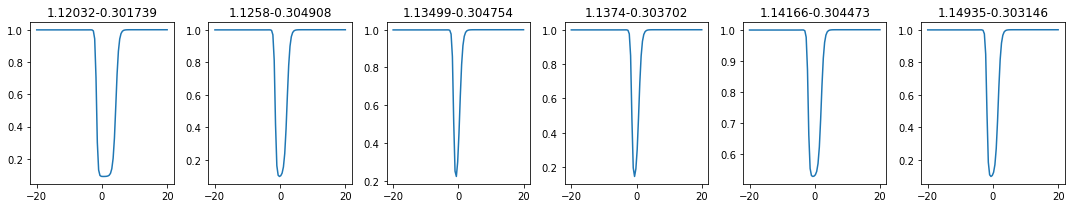

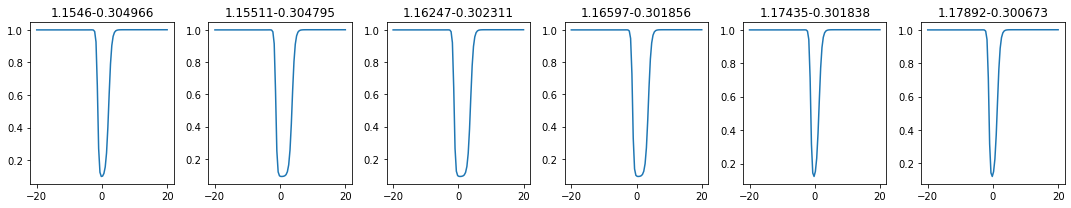

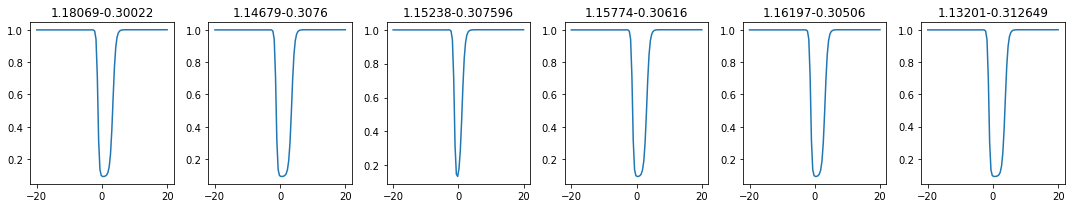

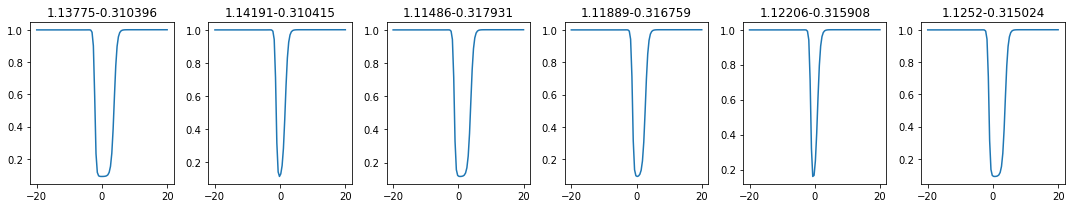

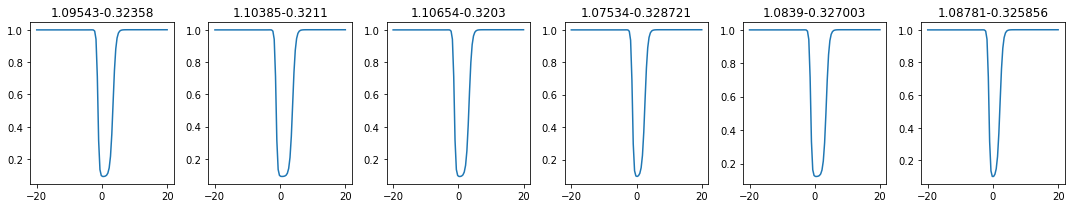

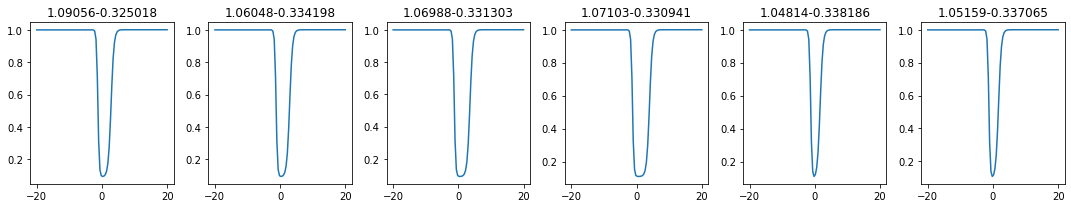

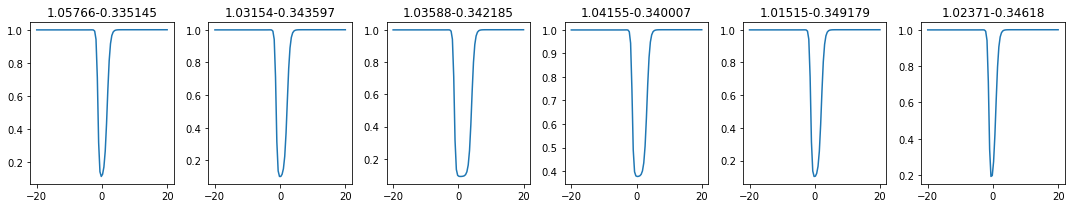

70


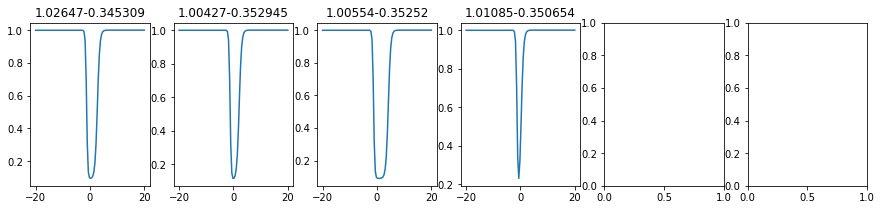

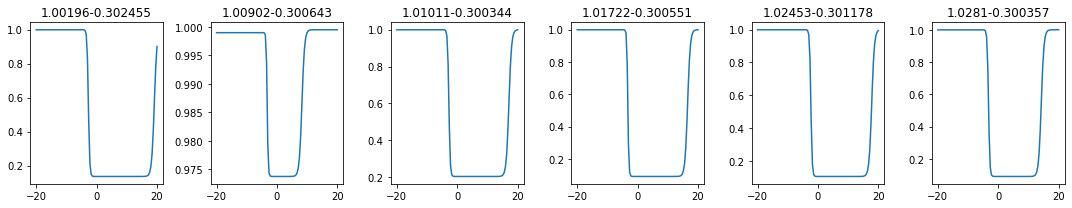

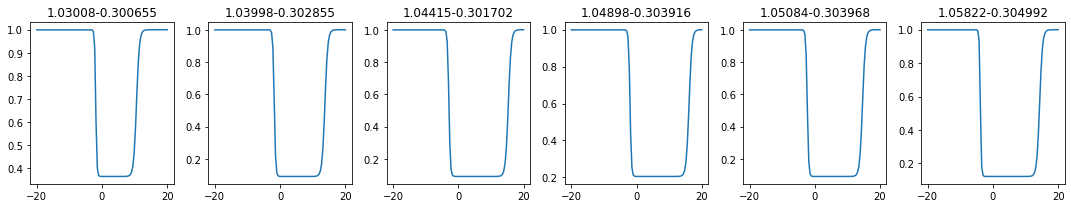

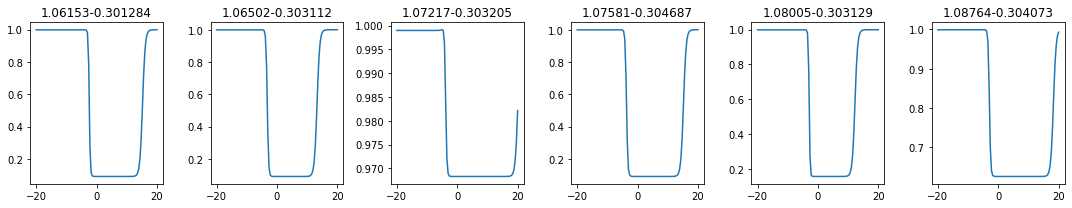

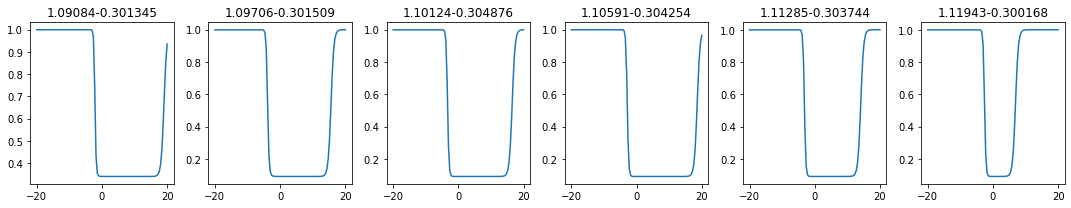

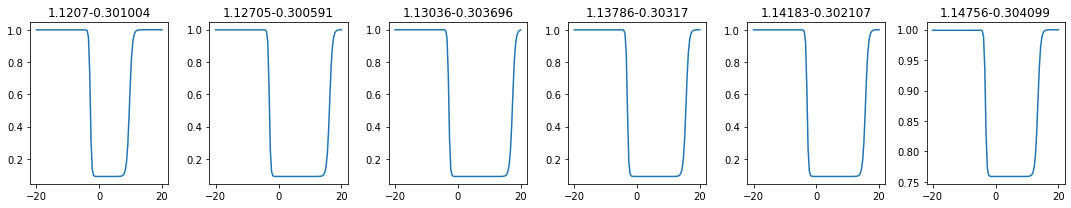

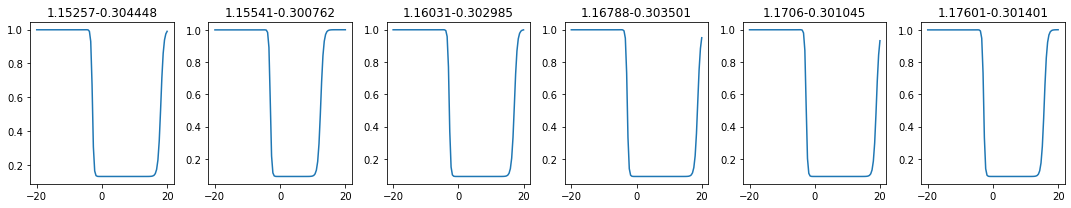

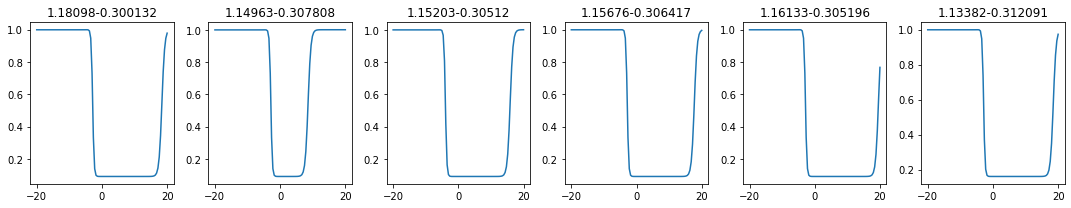

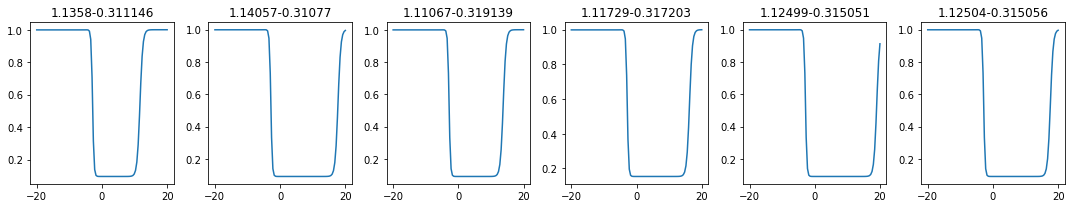

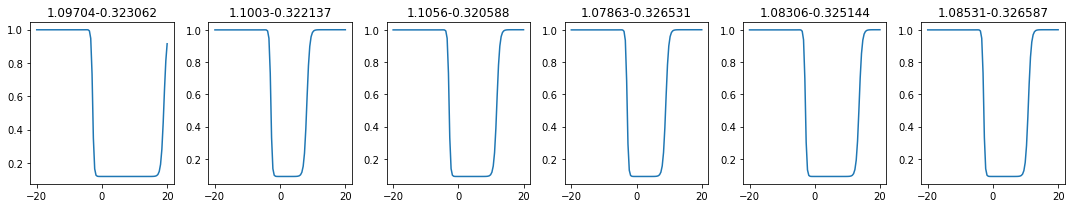

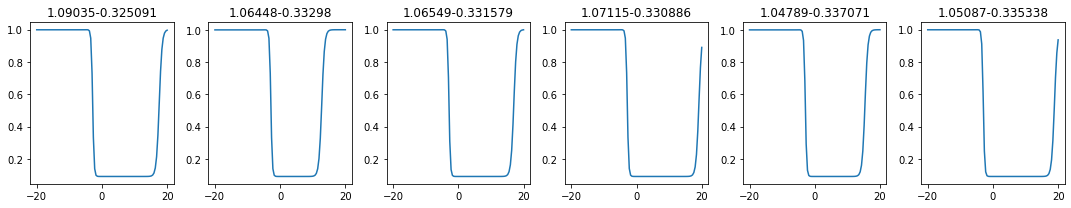

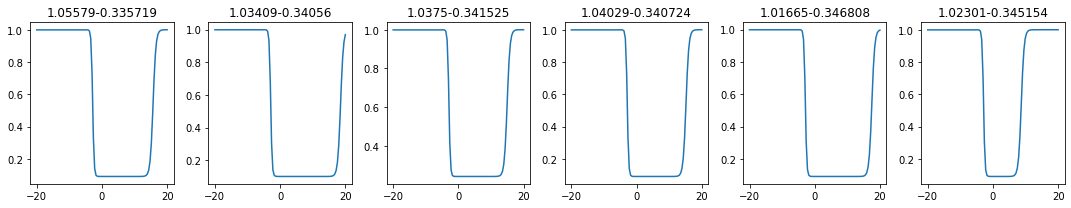

74


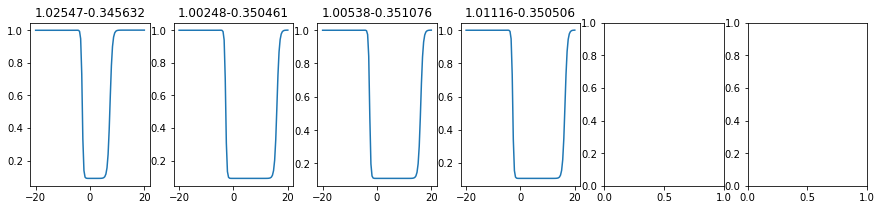

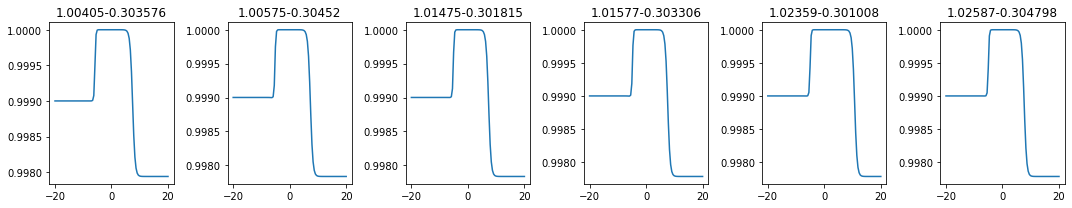

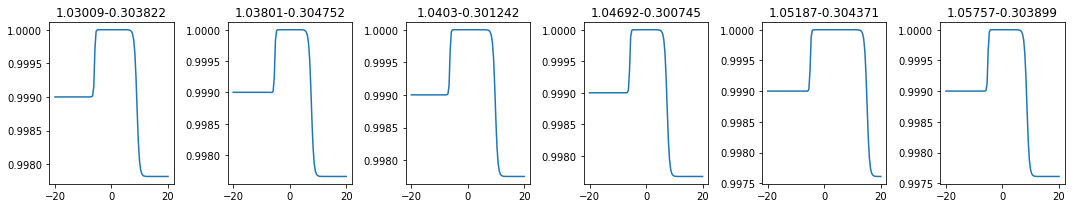

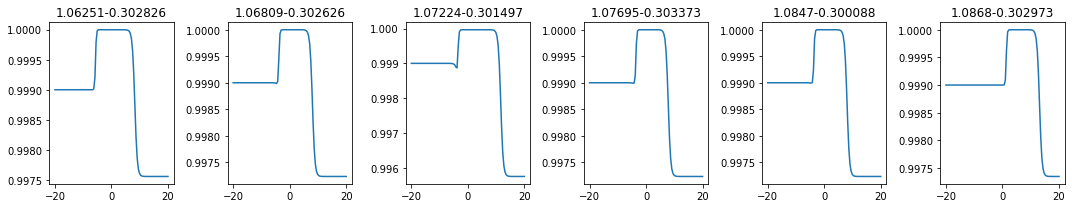

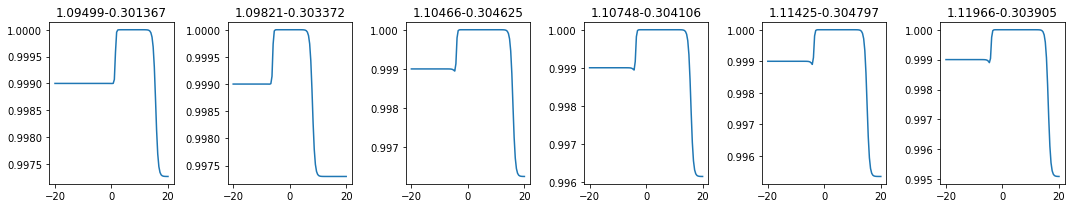

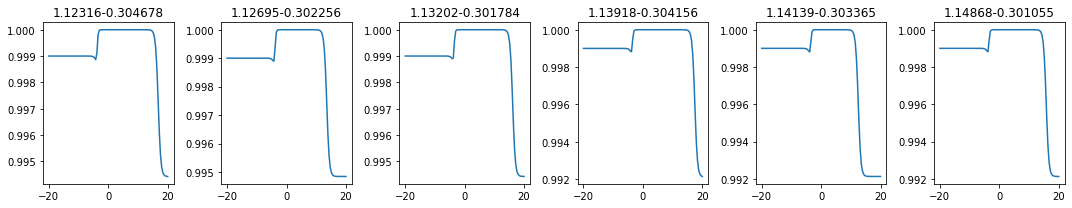

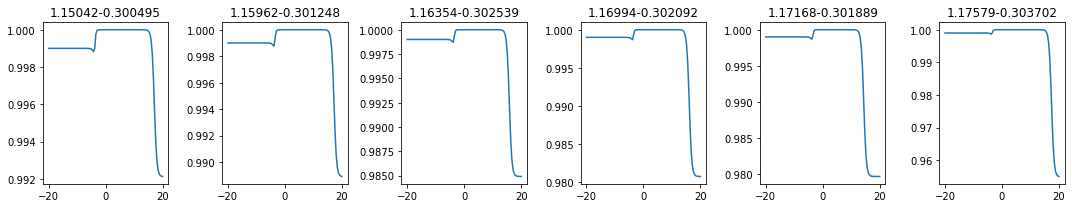

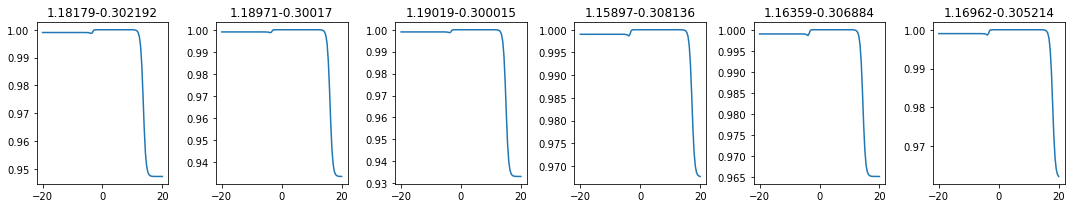

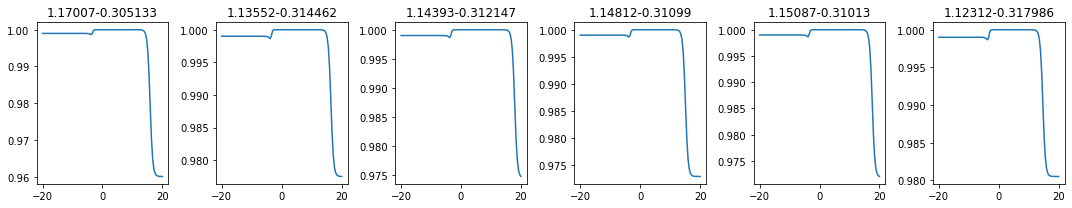

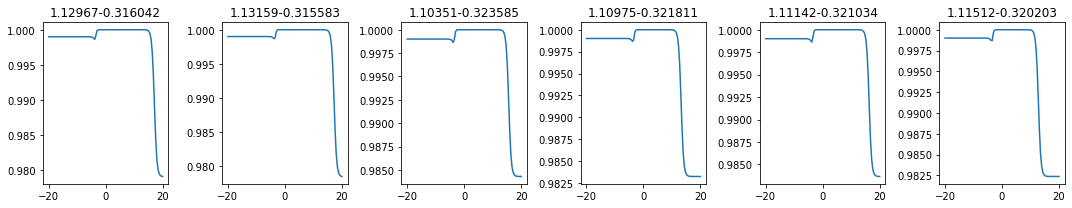

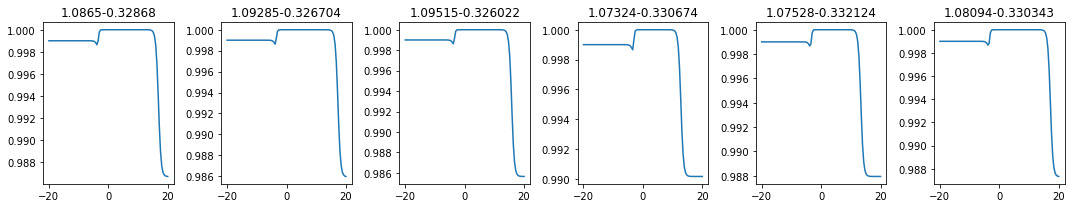

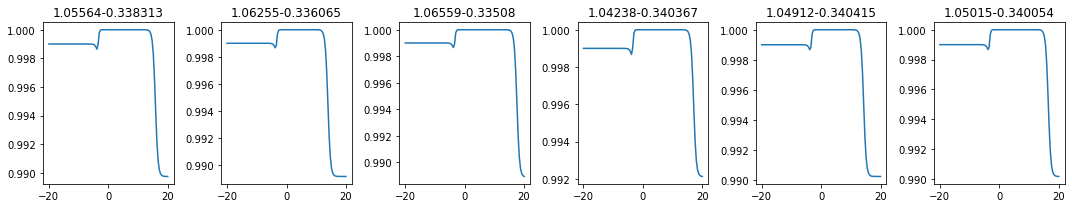

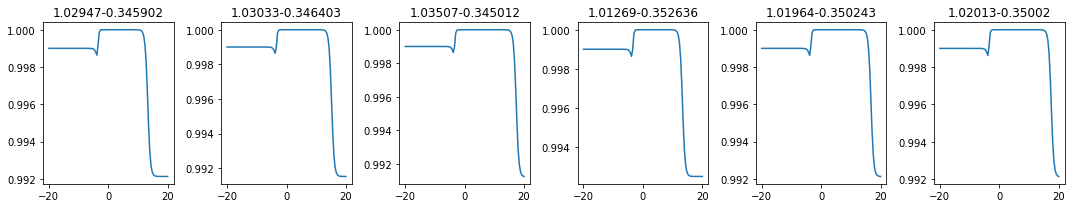

70


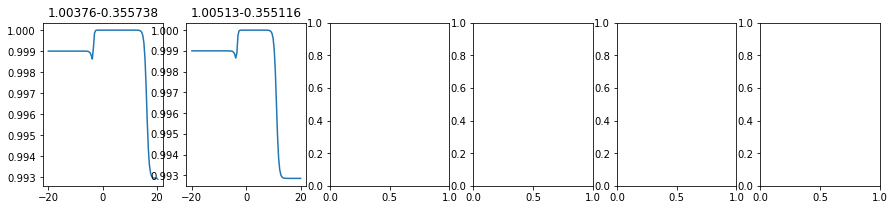

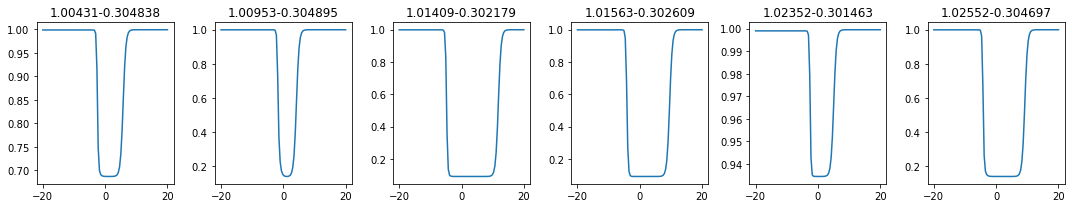

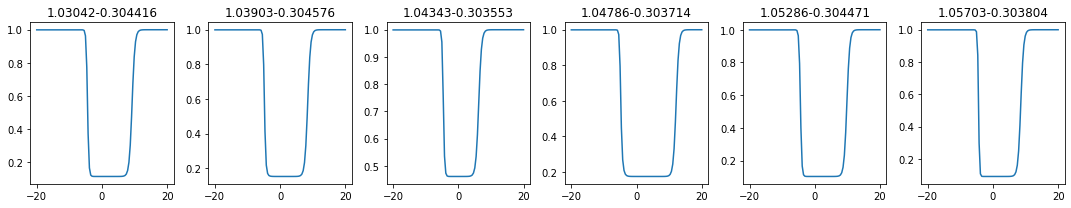

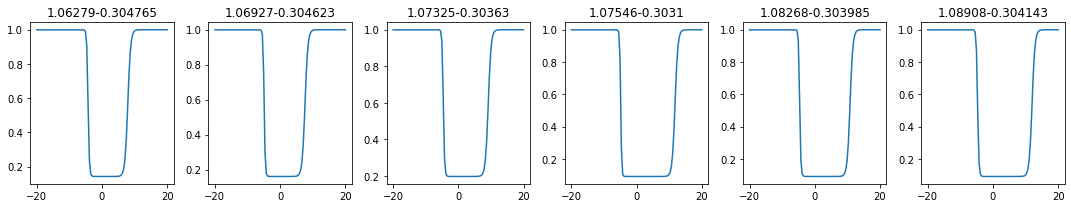

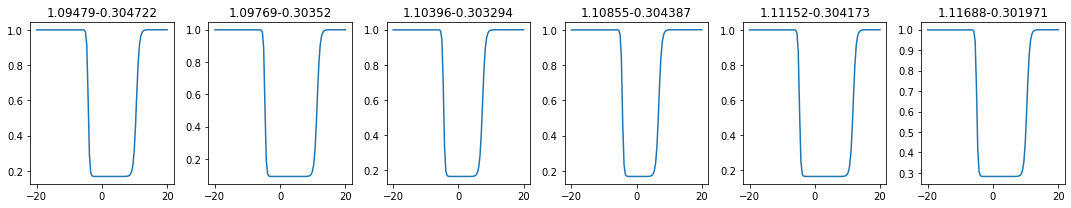

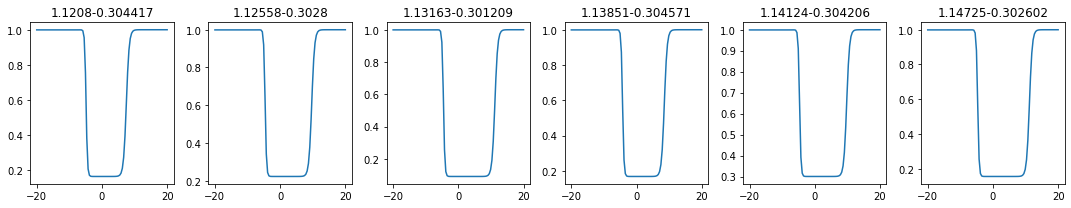

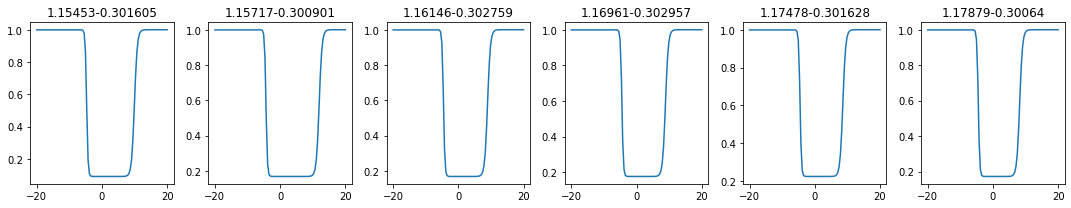

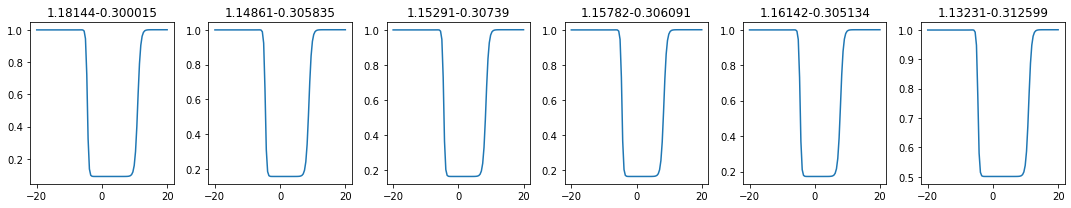

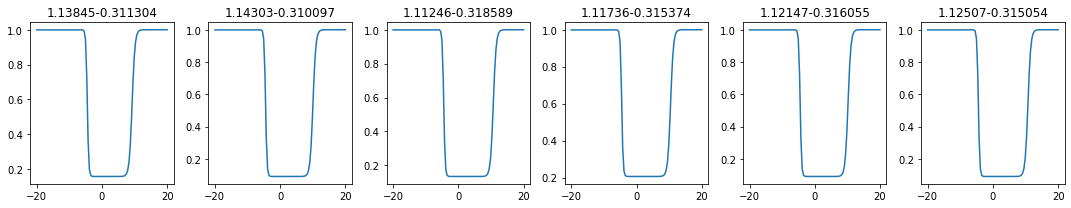

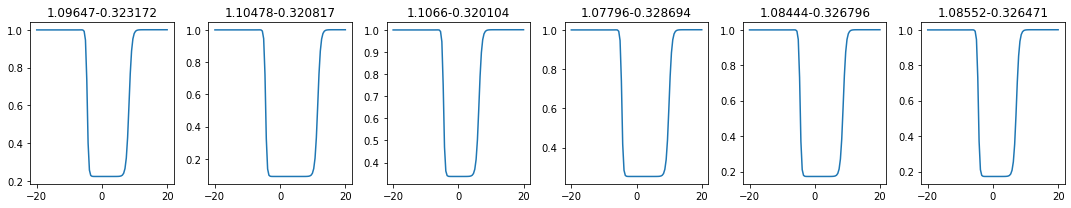

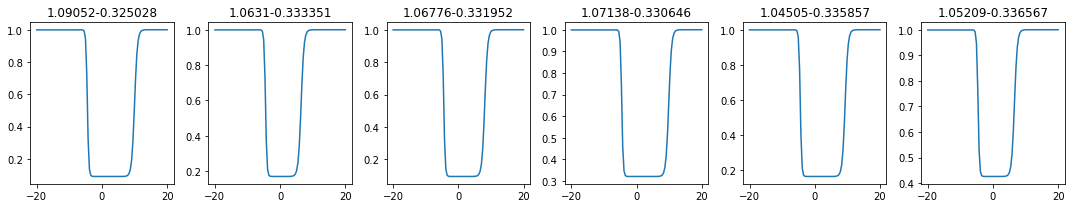

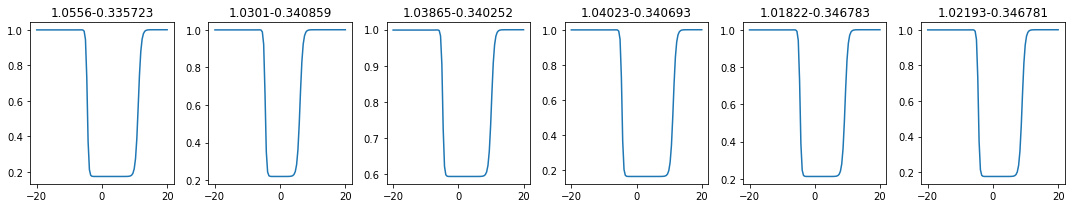

70


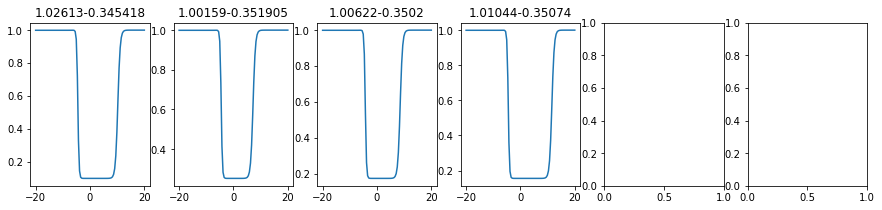

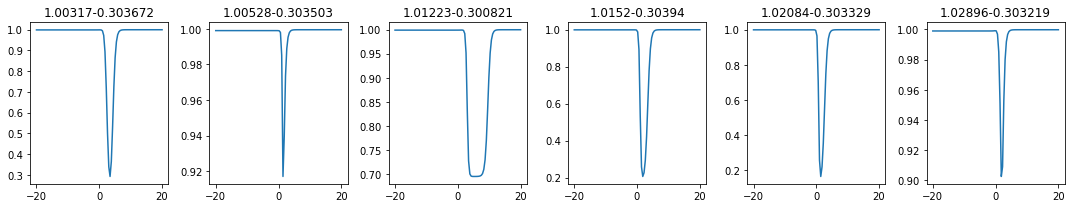

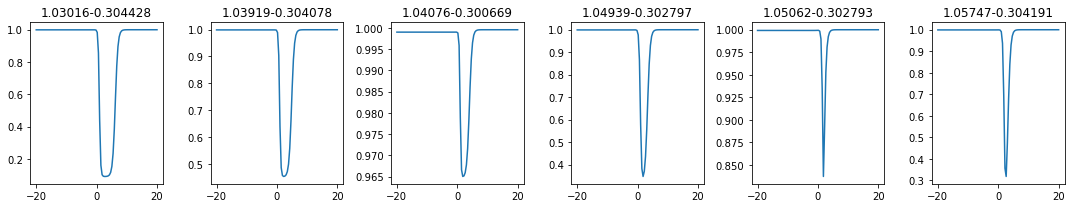

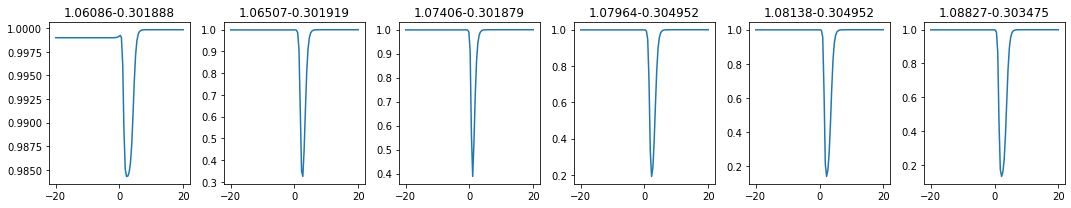

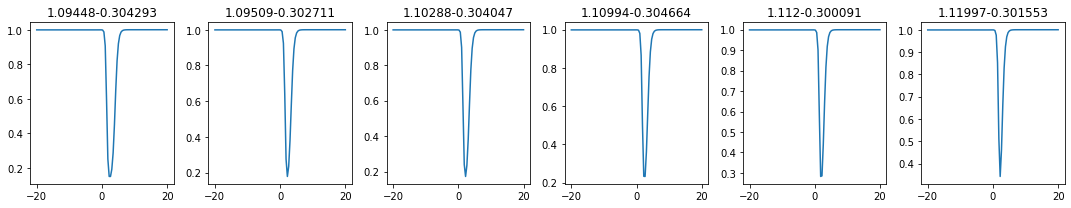

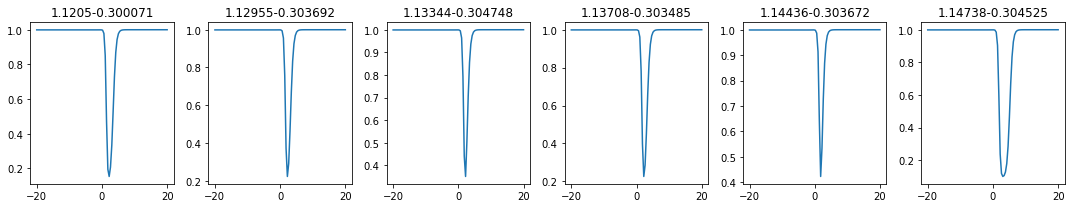

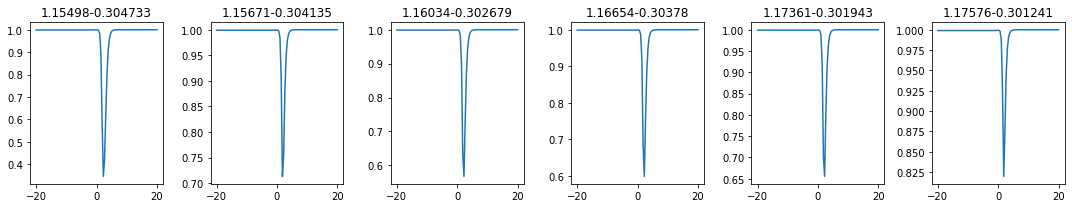

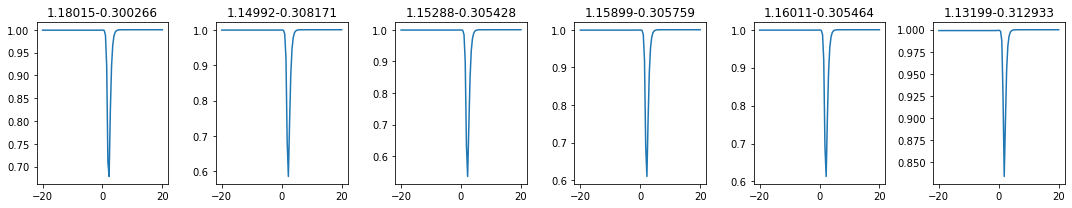

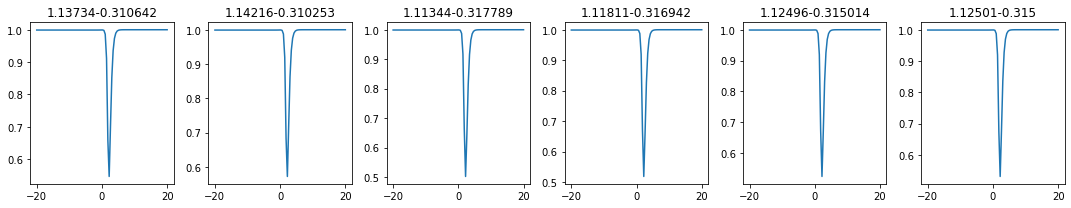

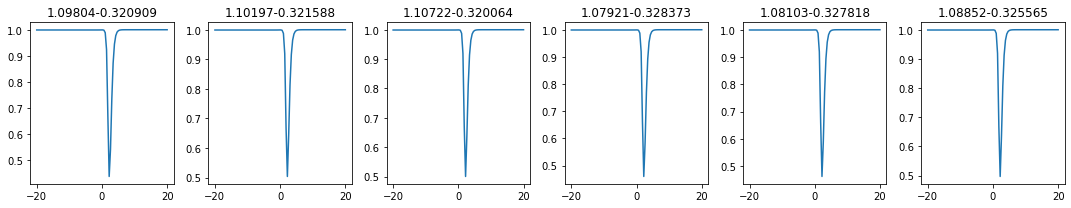

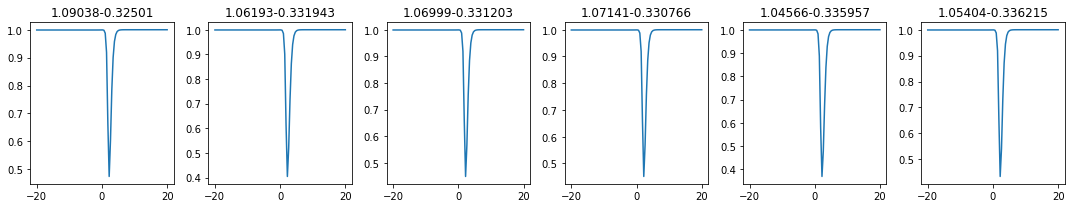

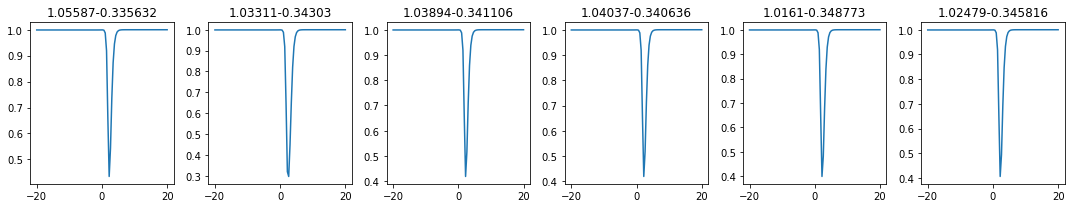

74


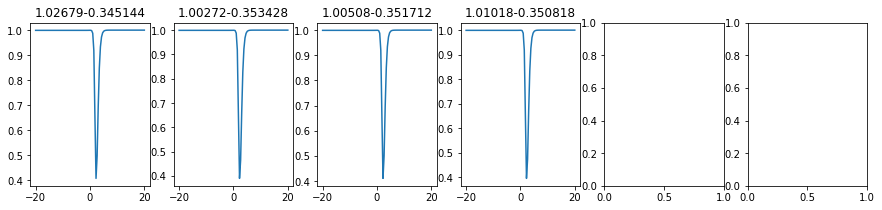

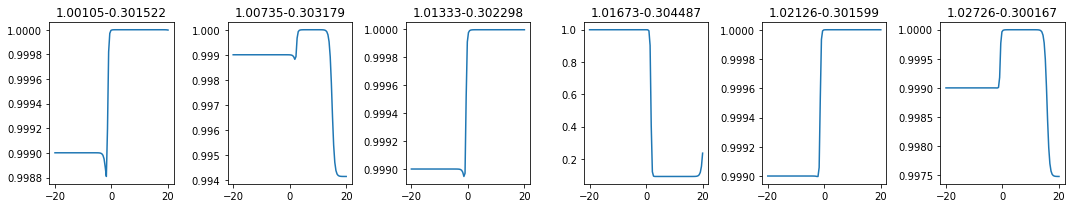

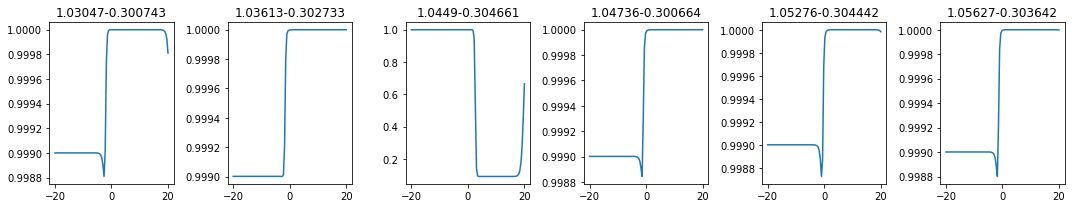

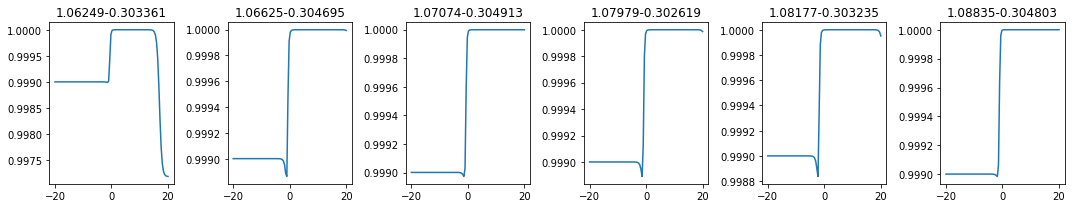

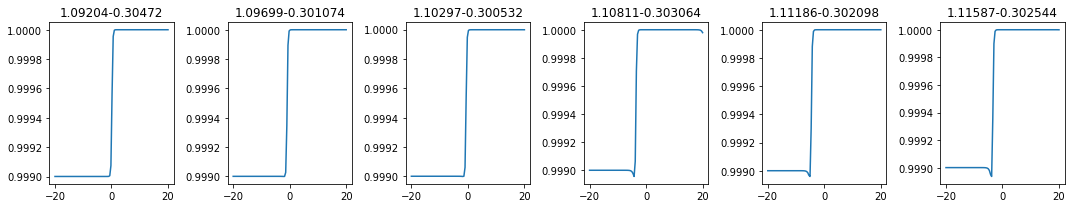

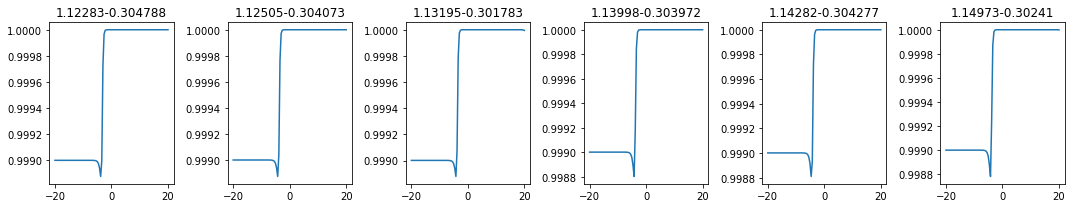

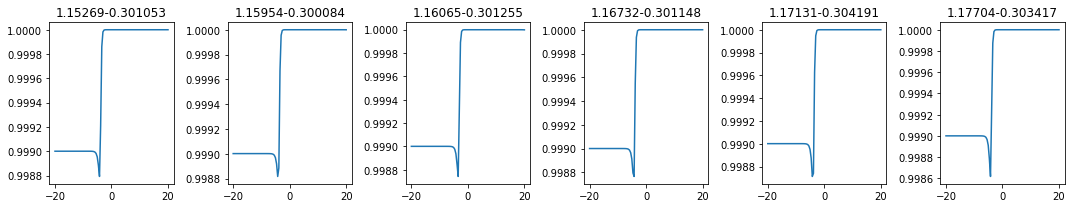

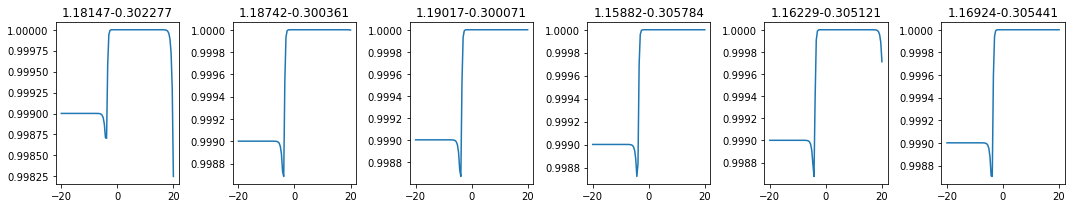

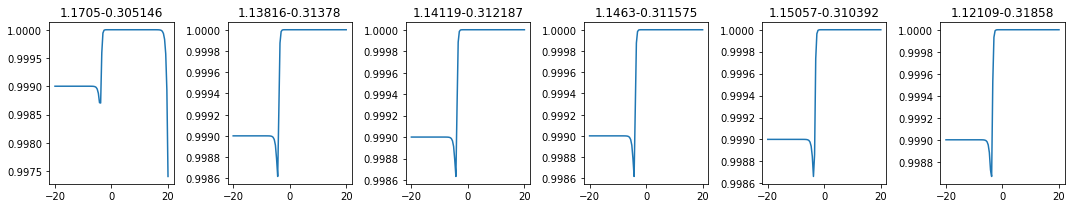

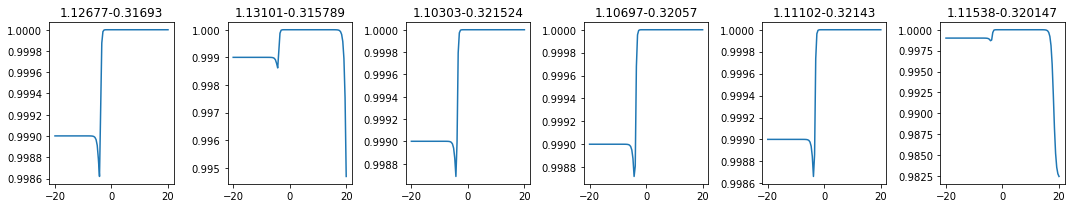

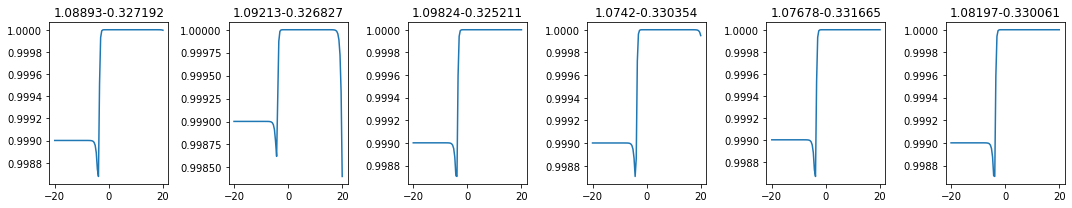

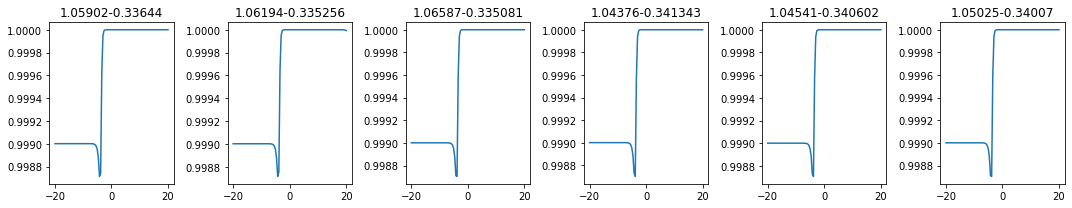

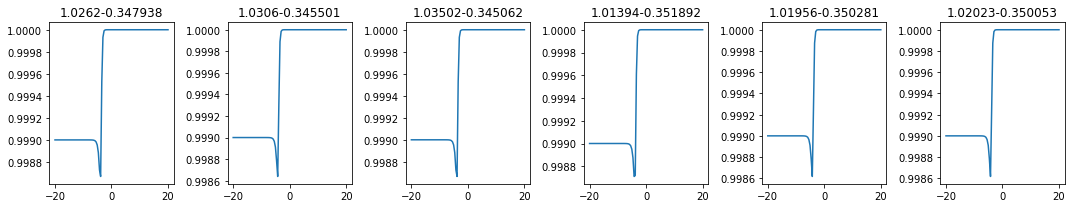

74


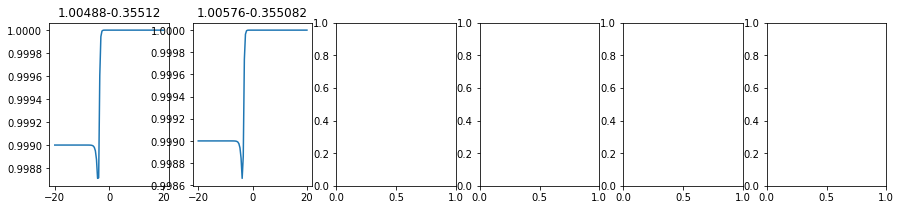

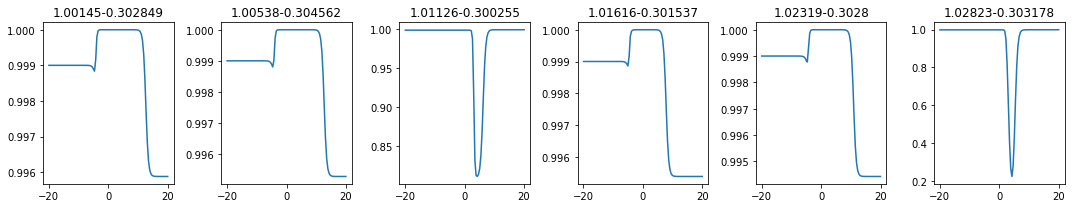

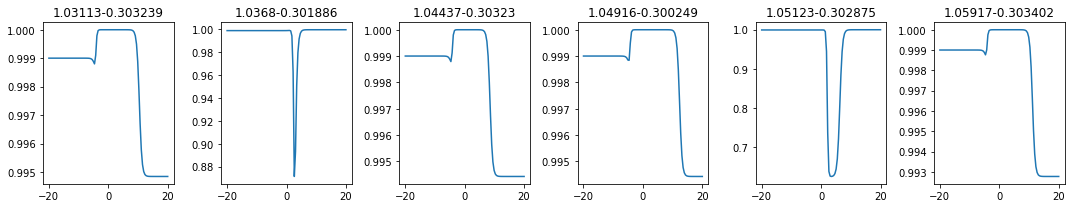

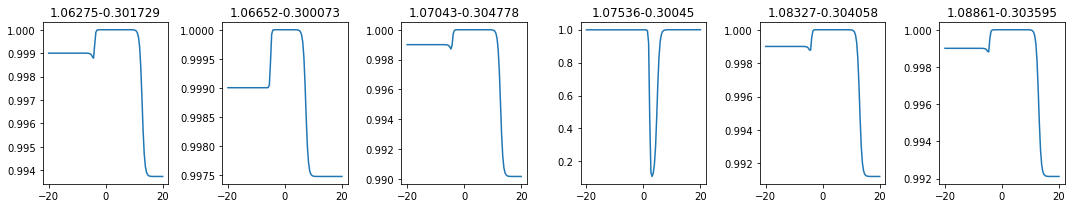

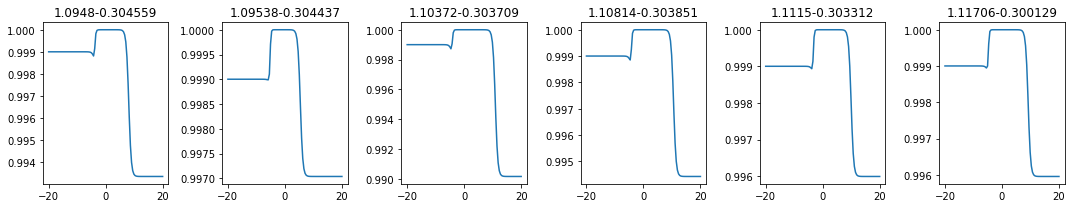

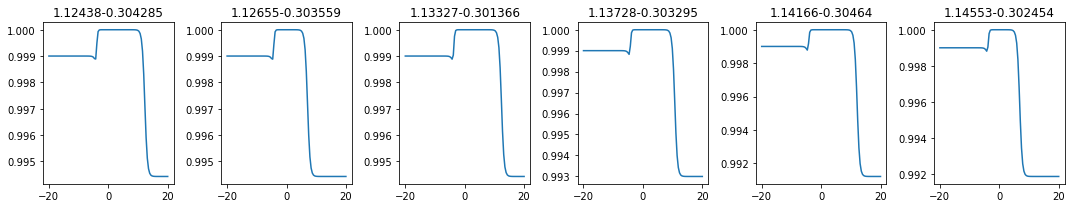

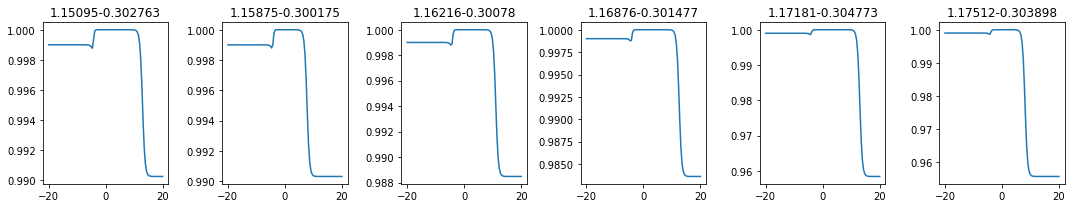

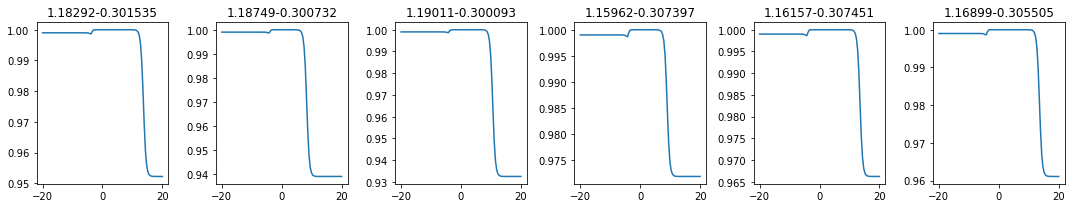

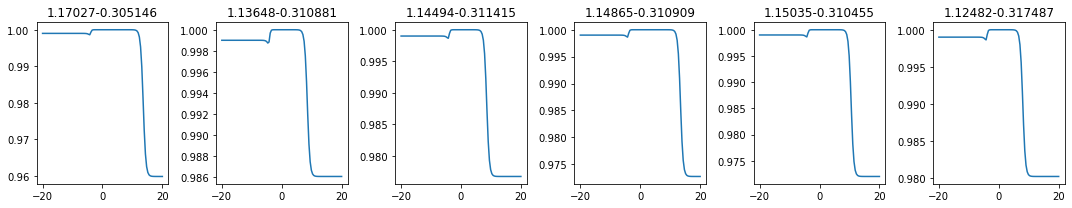

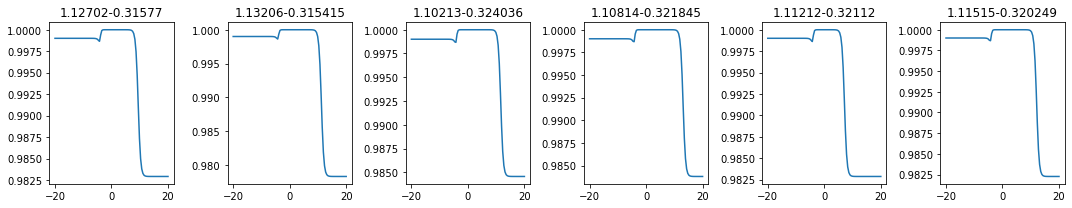

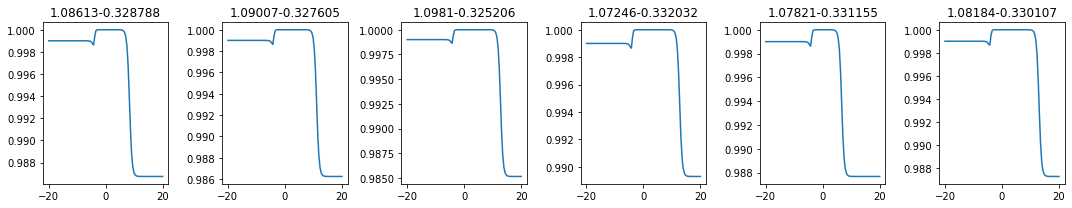

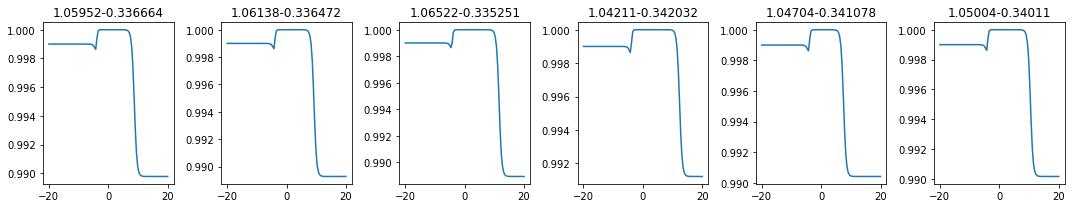

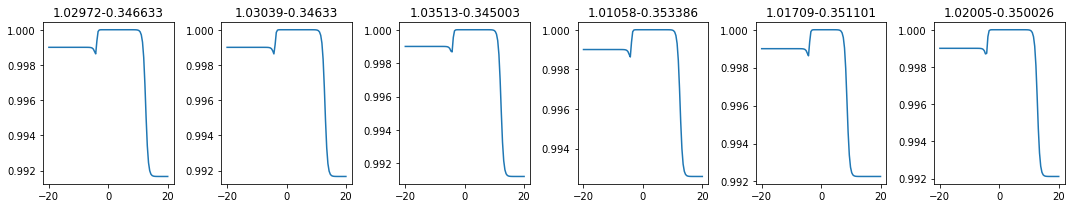

74


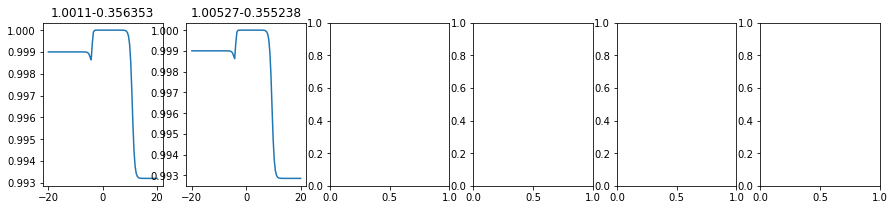

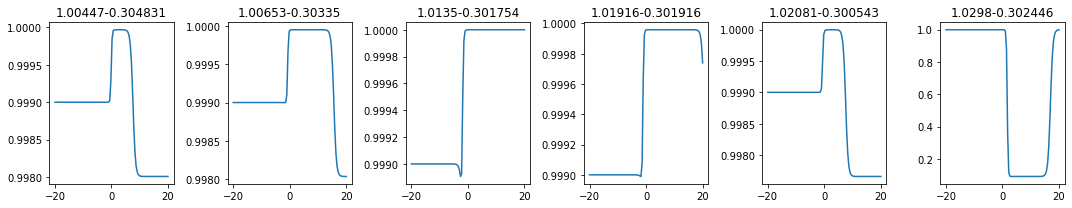

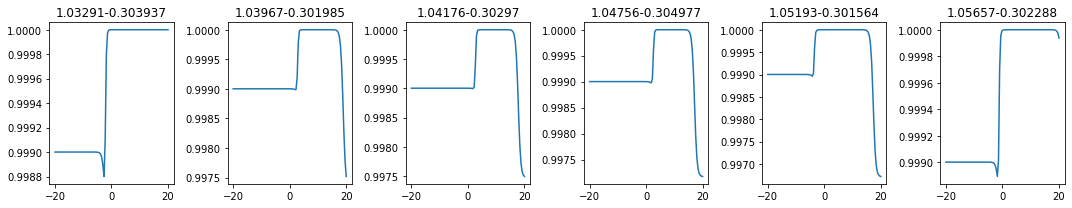

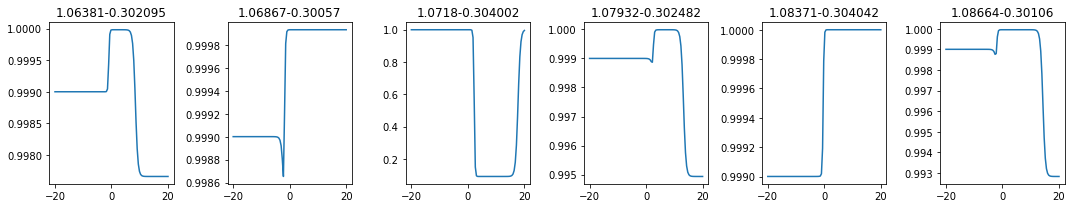

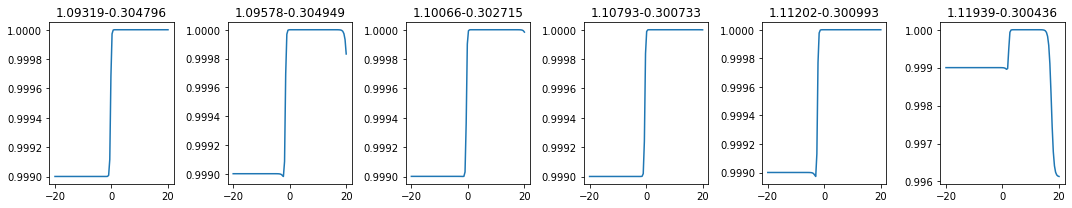

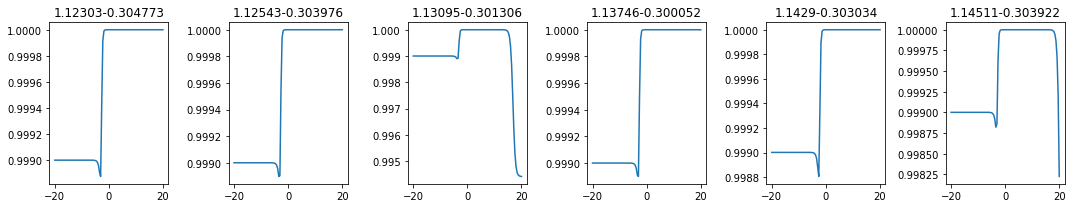

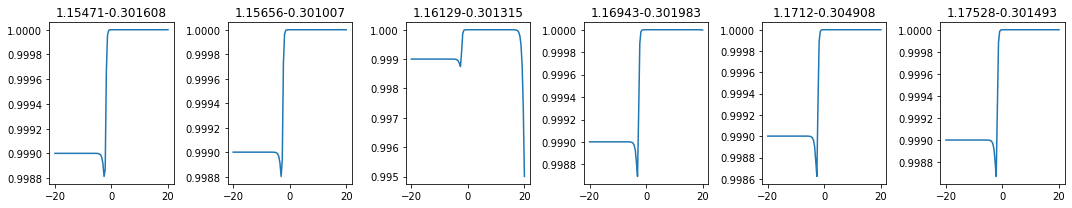

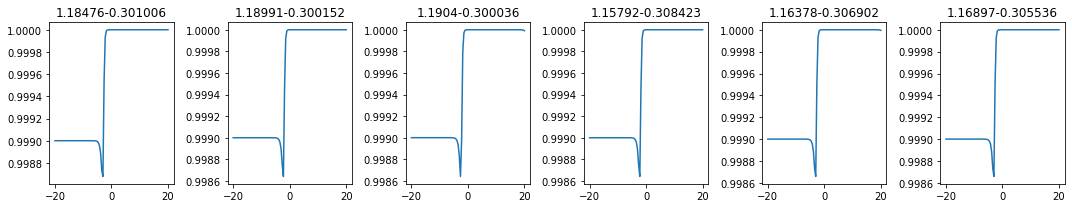

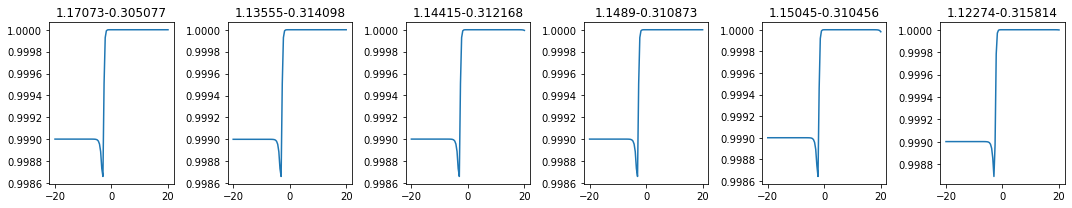

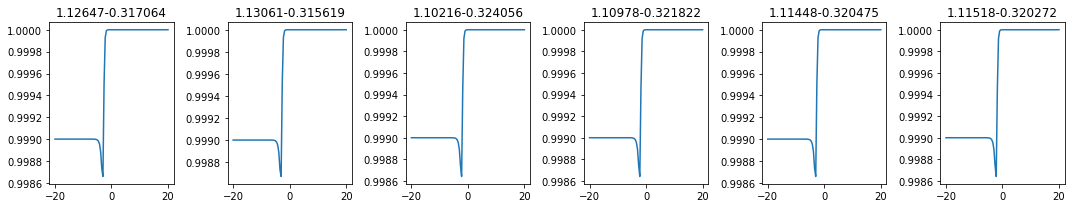

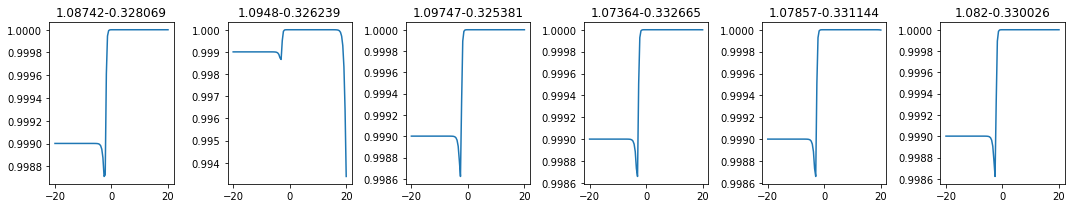

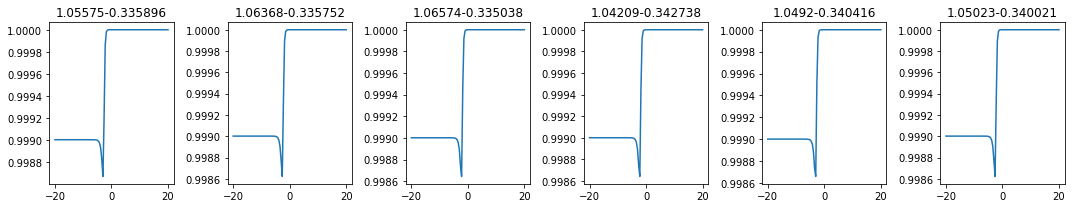

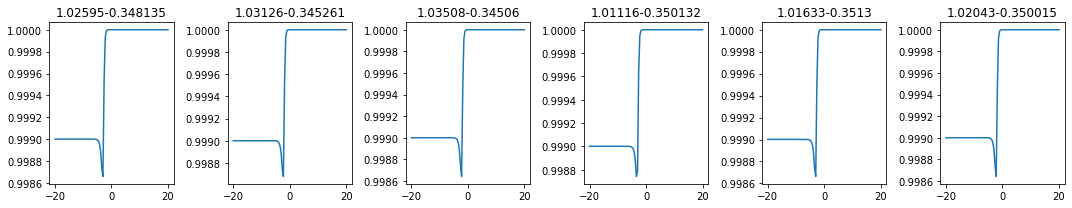

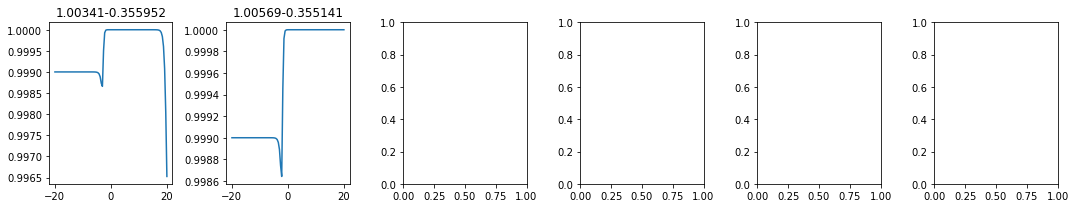

In [28]:
checkedfiles1=[x for x in os.listdir(checkf) if ".out" in x and "checked" in x]#all parameter sets tested with max derivative not at 0 and coincident result with mathematica

idxs=[3, 7, 11, 15, 19, 23, 27, 31, 35, 39, 43, 47, 51, 55, 59, 63]
             
              
              
              

othervars=np.array([1000]) #P
xvals=np.logspace(-20,20,100)
for f in checkedfiles1:
    #print(f)
    num=int(f.split("_")[2])
    #print(f,num)
    if num in idxs:
        data=pd.read_csv(os.path.join(checkf,f),sep=",|;",engine="python") #sep and engine are used to indicate that there are 2 separators
        subdf=data[data["pos"]>1]
        print(len(subdf))
        for i in range(len(subdf)):
            row=subdf.iloc[i]
            pos=row[0]
            stp=row[1]
            values=row[2:].copy()
            
            instance.fill_num_den(values,othervars)
            #instance.interfaceps(minx0=False,maxx1=False,absder=False) #this will normalise the GRF
            out=[instance.interfaceGRF(x) for x in xvals]
            if i==0 or i%6==0:
                if i>0:
                    plt.tight_layout()
                    plt.show()
                fig,axes=plt.subplots(1,6,figsize=(15,3))
            ax=axes[i%6]
            ax.plot(np.log10(xvals),out)
            ax.set_title(str(pos)+"-"+str(stp))
plt.tight_layout()
plt.show()
            
    

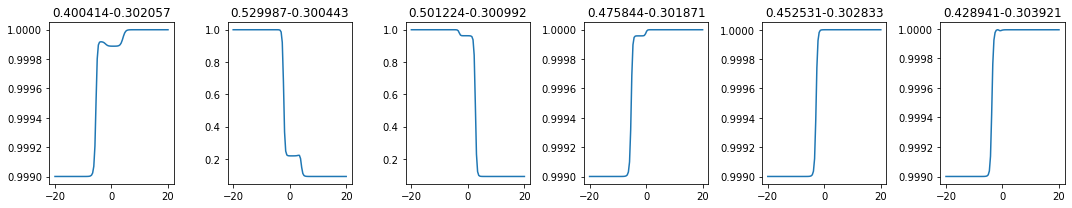

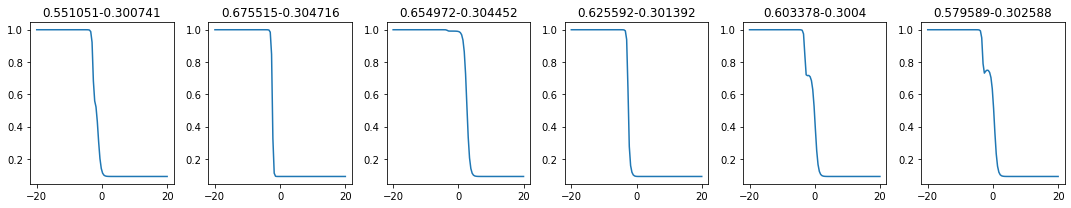

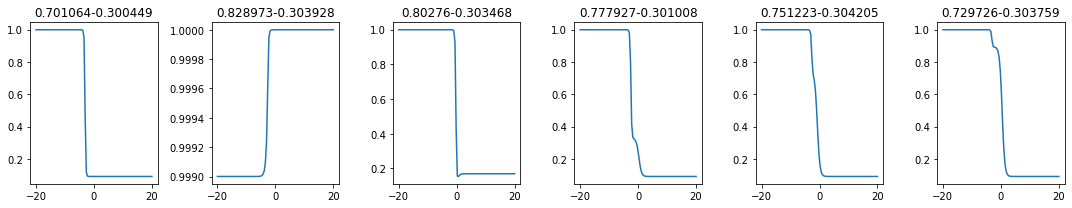

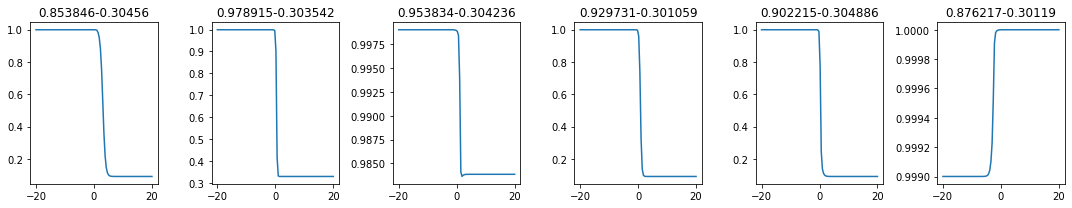

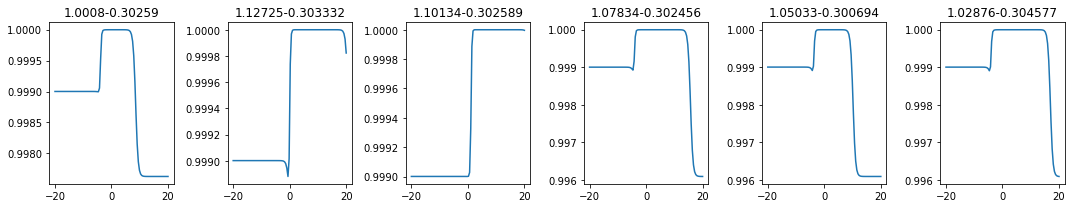

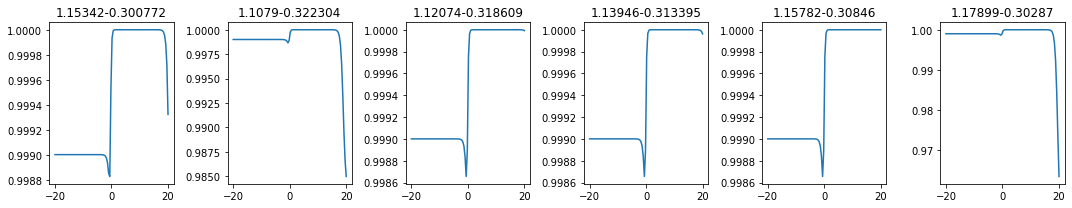

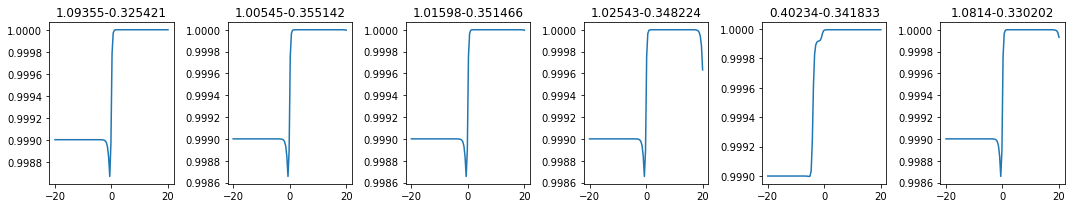

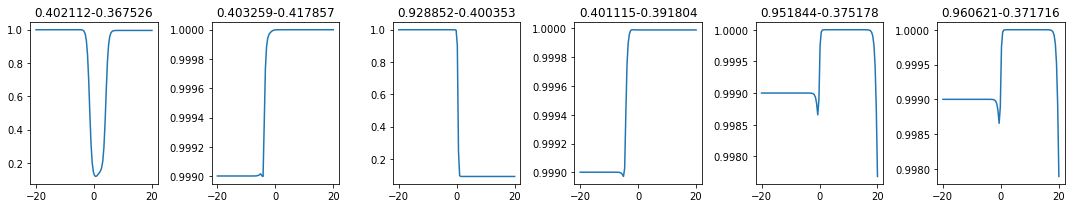

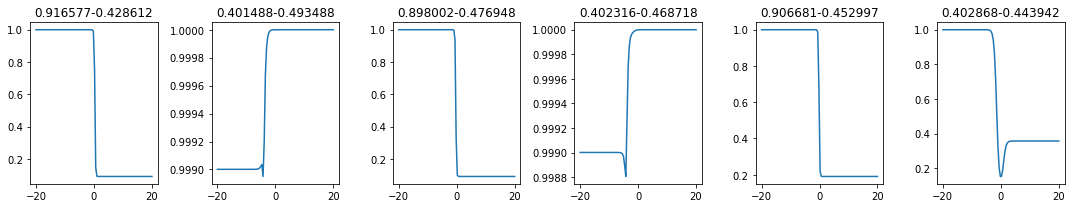

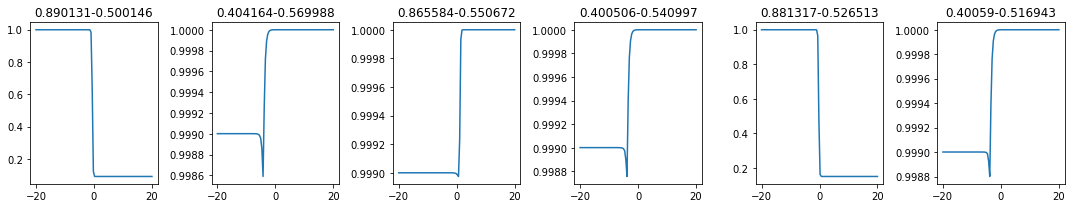

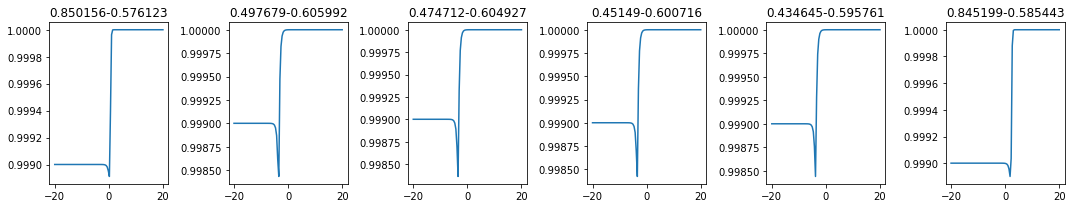

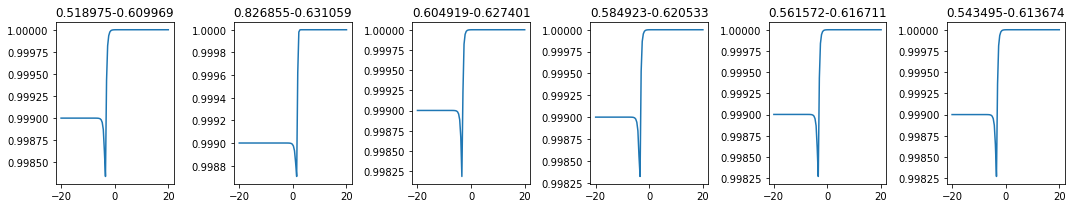

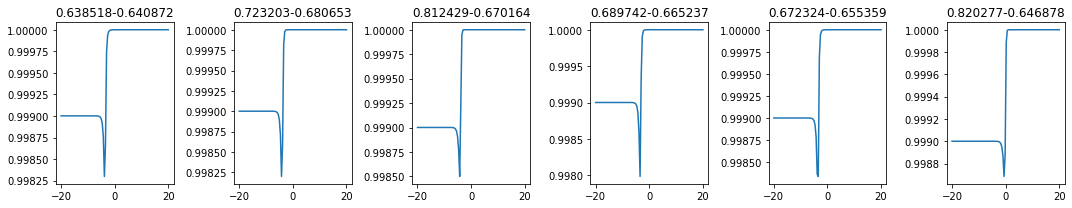

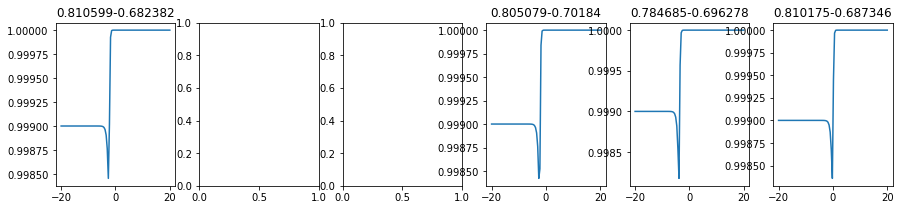

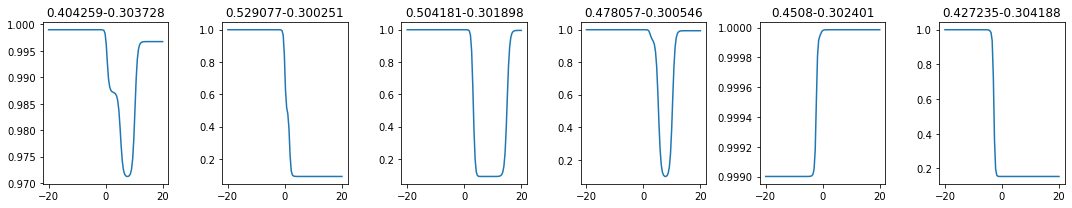

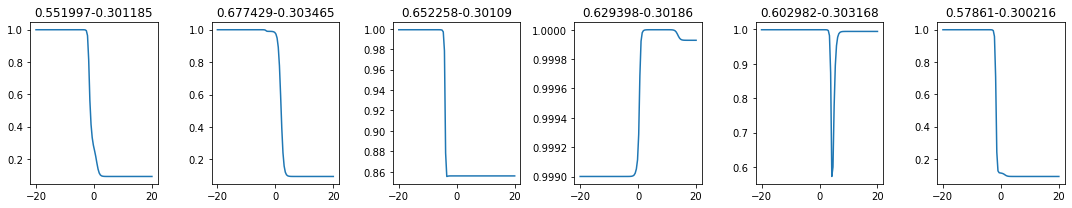

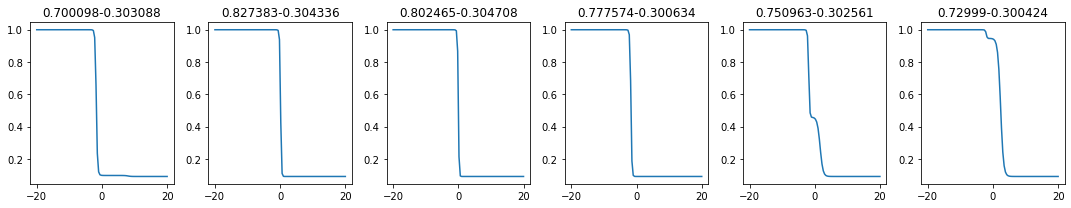

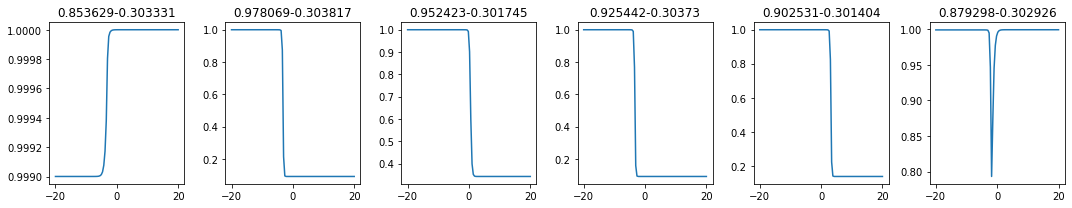

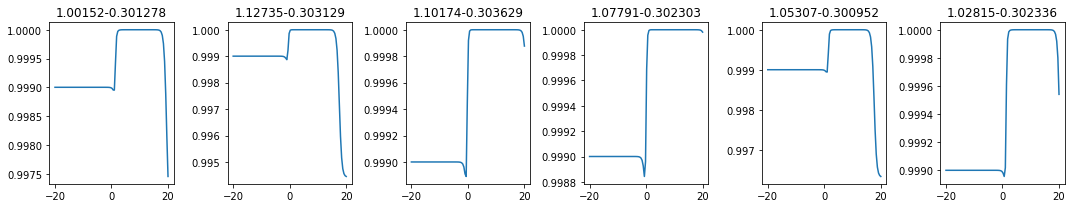

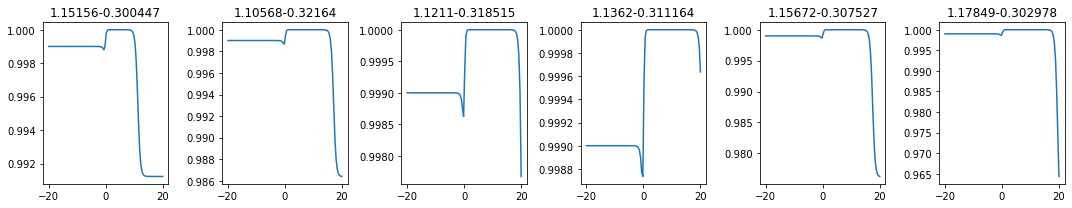

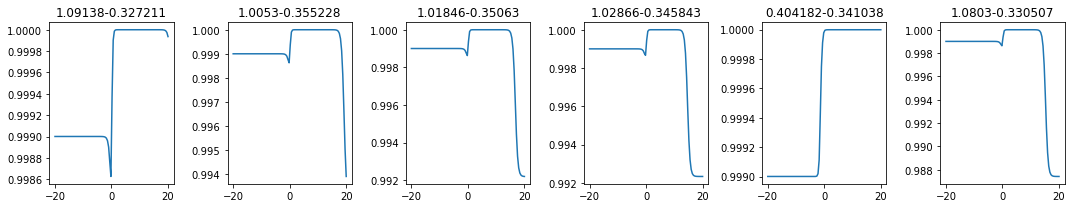

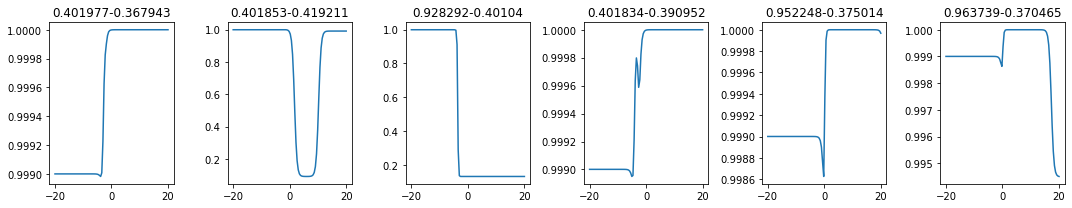

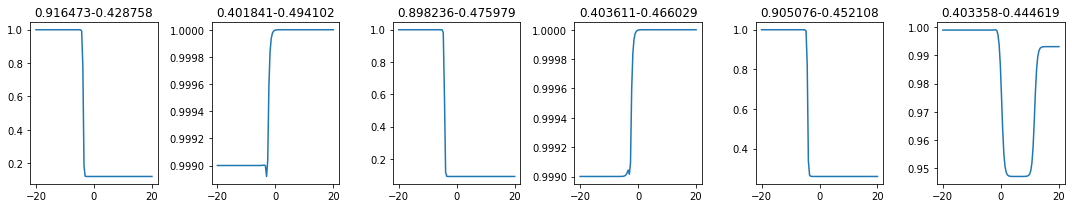

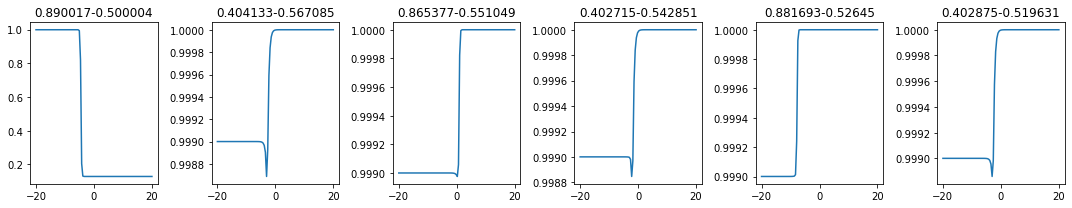

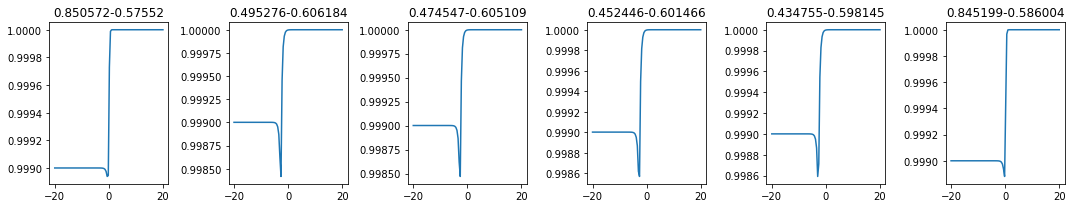

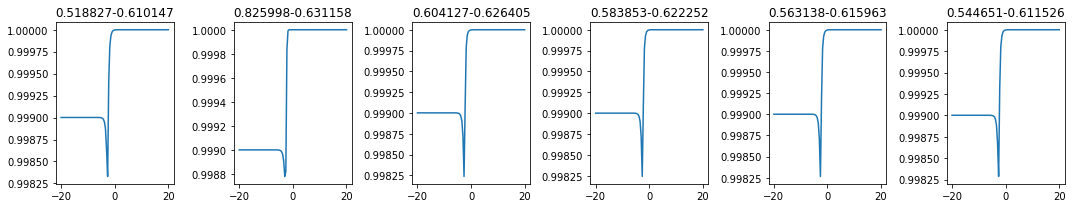

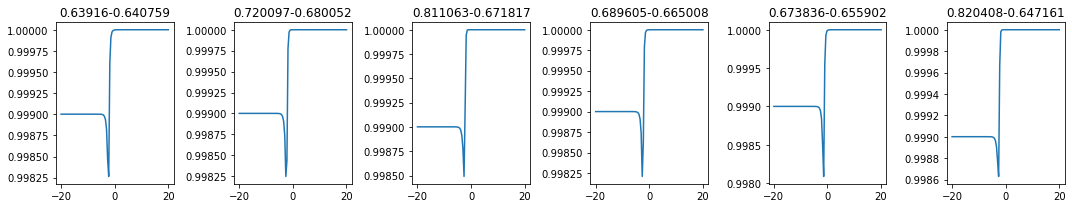

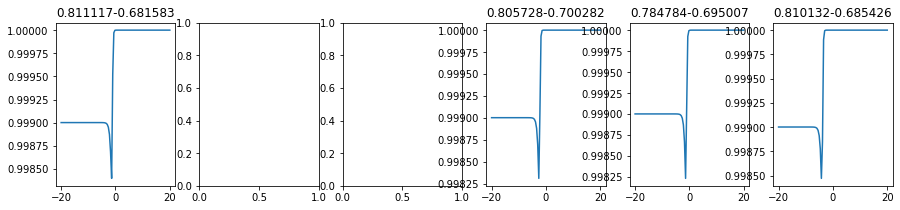

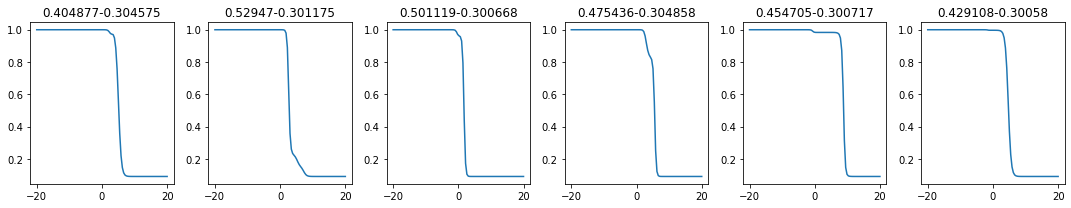

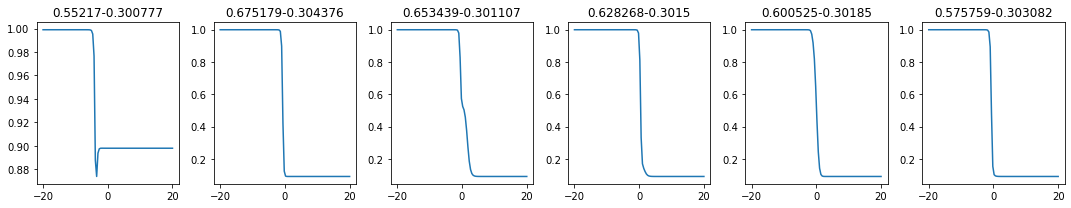

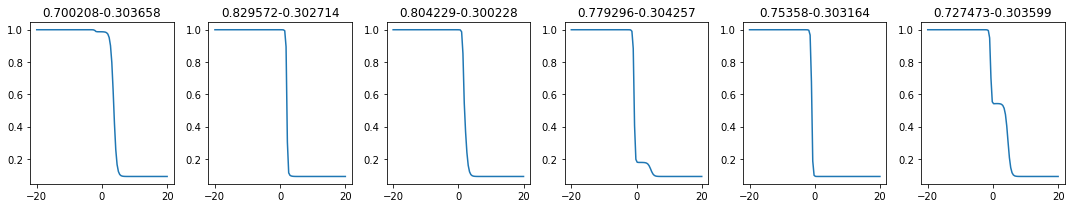

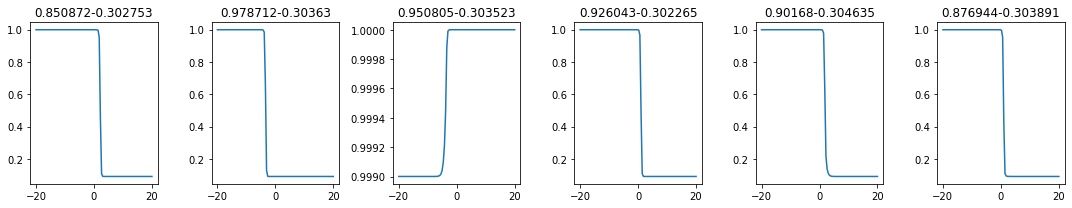

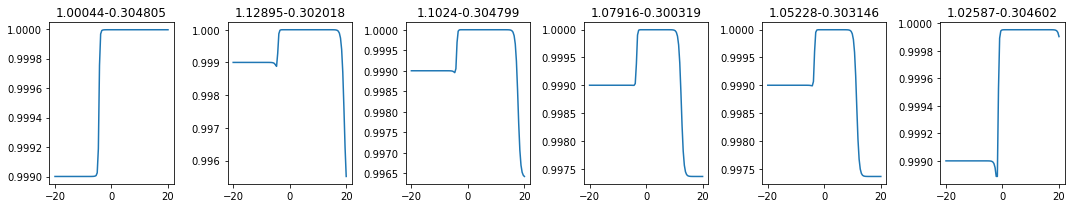

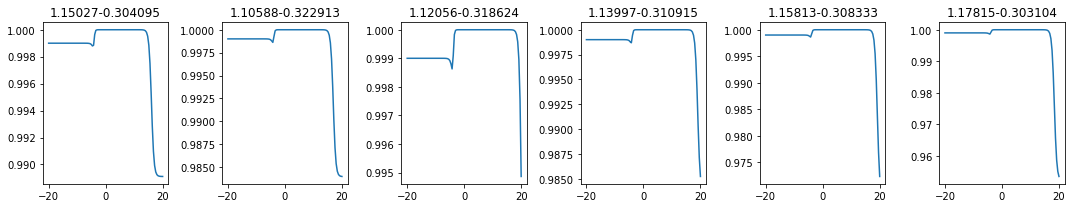

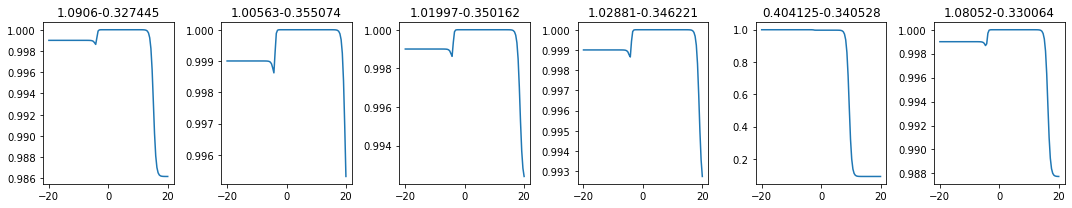

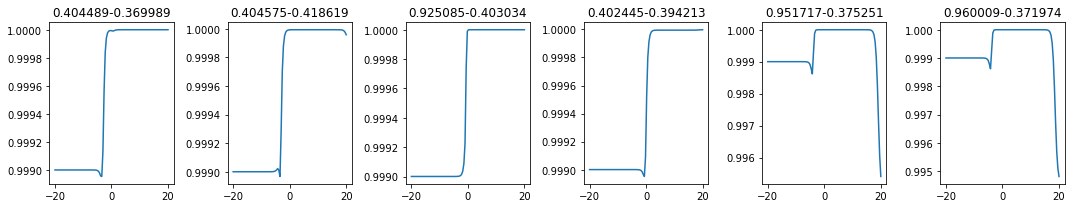

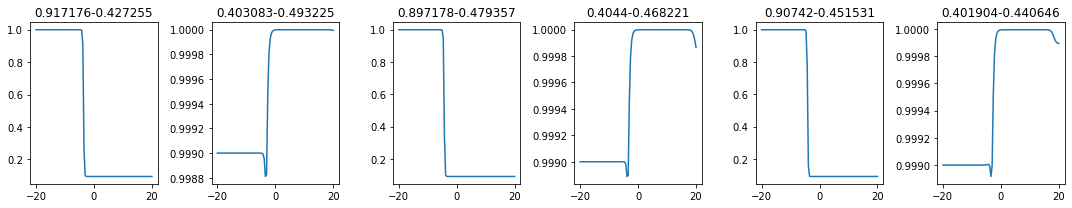

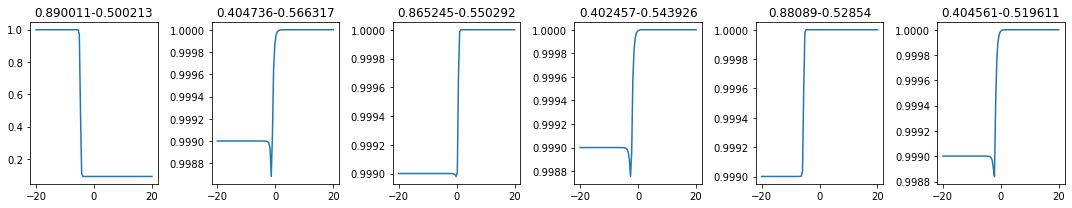

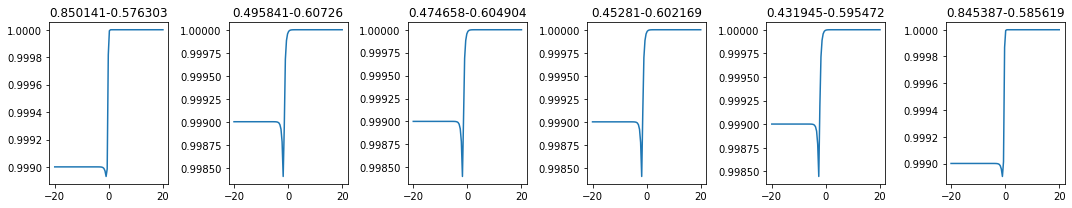

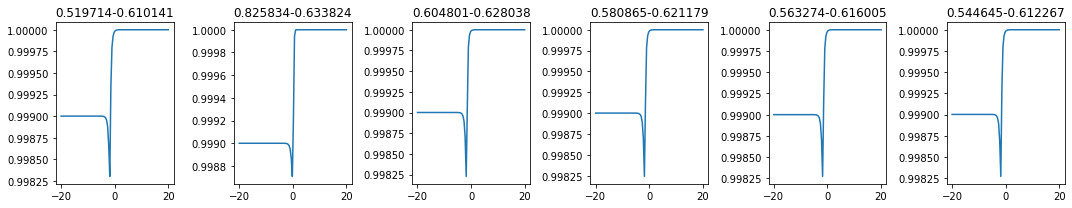

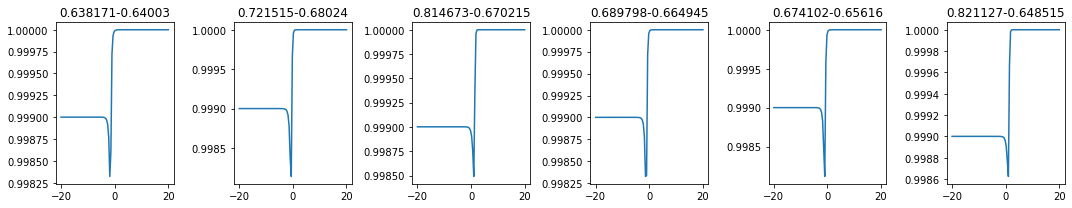

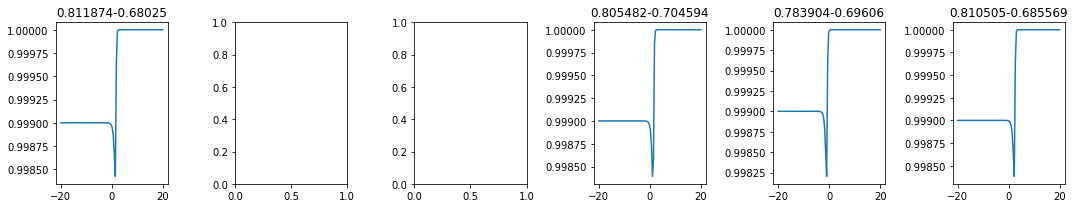

In [31]:
#plot all for a few
checkedfiles1=[x for x in os.listdir(checkf) if ".out" in x and "checked" in x]#all parameter sets tested with max derivative not at 0 and coincident result with mathematica

idxs=[3, 7, 11, 15, 19, 23, 27, 31, 35, 39, 43, 47, 51, 55, 59, 63]
             
              
              

n=0

othervars=np.array([1000]) #P
xvals=np.logspace(-20,20,100)
for f in checkedfiles1:
    #print(f)
    num=int(f.split("_")[2])
    #print(f,num)
    if num in idxs:
        n+=1
        if n>3:
            break
        data=pd.read_csv(os.path.join(checkf,f),sep=",|;",engine="python") #sep and engine are used to indicate that there are 2 separators
        #subdf=data[data["pos"]>1]
        #print(len(subdf))
        for i in range(len(data))[::5]:
            row=data.iloc[i]
            pos=row[0]
            stp=row[1]
            values=row[2:].copy()
            
            instance.fill_num_den(values,othervars)
            #instance.interfaceps(minx0=False,maxx1=False,absder=False) #this will normalise the GRF
            out=[instance.interfaceGRF(x) for x in xvals]
            if i==0 or i%6==0:
                if i>0:
                    plt.tight_layout()
                    plt.show()
                fig,axes=plt.subplots(1,6,figsize=(15,3))
            ax=axes[i%6]
            ax.plot(np.log10(xvals),out)
            ax.set_title(str(pos)+"-"+str(stp))
plt.tight_layout()
plt.show()
            
    